(prob-spaces)=
# Probability spaces

## What is probability?

We often make probabilistic statements in our everyday conversation, such as, "I think there's a one-in-four chance that it will rain tomorrow," or, "I have a 75% chance of failing the final exam in my class." Such statements attempt to quantify our degree of belief in an event occurring, and as such they are _subjective_ assessments. Indeed, _my_ assessment of the chance of rain might very well be different from the person sitting next to me---and if that other person happens to be a meteorologist, then _their_ assessment of the probability is surely more accurate than mine. So, a single event---whether it rains tomorrow or not---evidently has multiple probabilities assigned to it, and these probabilities vary depending on whom you ask.

But these subjective probabilities may also change over time as new information arrives. If, for example, I initially believe that I have a 75% chance of failing my final exam, but then I surprise myself with a grade of 95% on the midterm, then I will likely decrease my assessment of the probability that I fail the final exam from 75% to a figure much smaller.

> The interpretation that conceptualizes probabilities as measurements of _degrees of belief_ is called the _subjective_ or _Bayesian interpretation_ of probability.

If probabilities are inherently subjective, then the 'mathematical theory of probability' seems to be a contradiction in terms. After all, mathematics is supposed to be the most logically rigorous of all the sciences, so how could probability and mathematics ever be brought together?

```{margin}
If you're interested in different interpretations of probability, you might find the [Wikipedia article](https://en.wikipedia.org/wiki/Probability_interpretations#) interesting.
```

This question is a difficult one, and we will uncover answers in due time. But there are other interpretations of probability---ones that have much more apparent and obvious connections to mathematics---with which we will begin our course.

To illustrate, suppose that you roll a fair six-sided die:

```{image} ../img/die.svg
:width: 70%
:align: center
```
&nbsp;

The question is simple: What is the probability $P(4)$ that you roll a four? Most people, without hesitation, would offer up the answer

```{math}
P(4) = \frac{1}{6}.
```

But _why_ this particular value? Perhaps this:

> "Well, since the die is fair and symmetric, there's an equal chance of rolling any number. And since there are six possible numbers that we could roll, the probability of rolling any one particular number is one in six."

The interpretation of probability invoked in this explanation is sometimes called the _classical interpretation_; its characteristic qualities are appeals to "symmetry" and decompositions of events into "equally likely outcomes."

In this die rolling scenario, notice that the subjective interpretation of probability is essentially useless. Why attempt to justify the value $1/6$ for $P(4)$ with some fuzzy, subjective argument when the precise value $P(4) = 1/6$ is **so** obvious?!

As obvious and satisfying as this answer may be, there is yet _another_ way that we might justify it. This second justification depends not on physical properties of the die like symmetry, but instead relies on observed _long-run relative frequencies_. Here's the idea: Suppose that we roll the die many times over and over, and that we record the result of each roll. From our tally of rolls, we then compute the following ratio:

$$
\frac{\text{number of $4$s rolled}}{\text{total number of rolls}}.
$$

The plain number of $4$s rolled is just called the *frequency*; but when you divide that frequency by the total number of rolls, you are computing a _relative frequency_ since the frequency of $4$s turns into a number measured _relative_ to the total number of rolls.

If the total number of rolls is large, what might you expect the relative frequency to tend toward? To answer this, let's have a computer do the rolling for us! Here are the results:

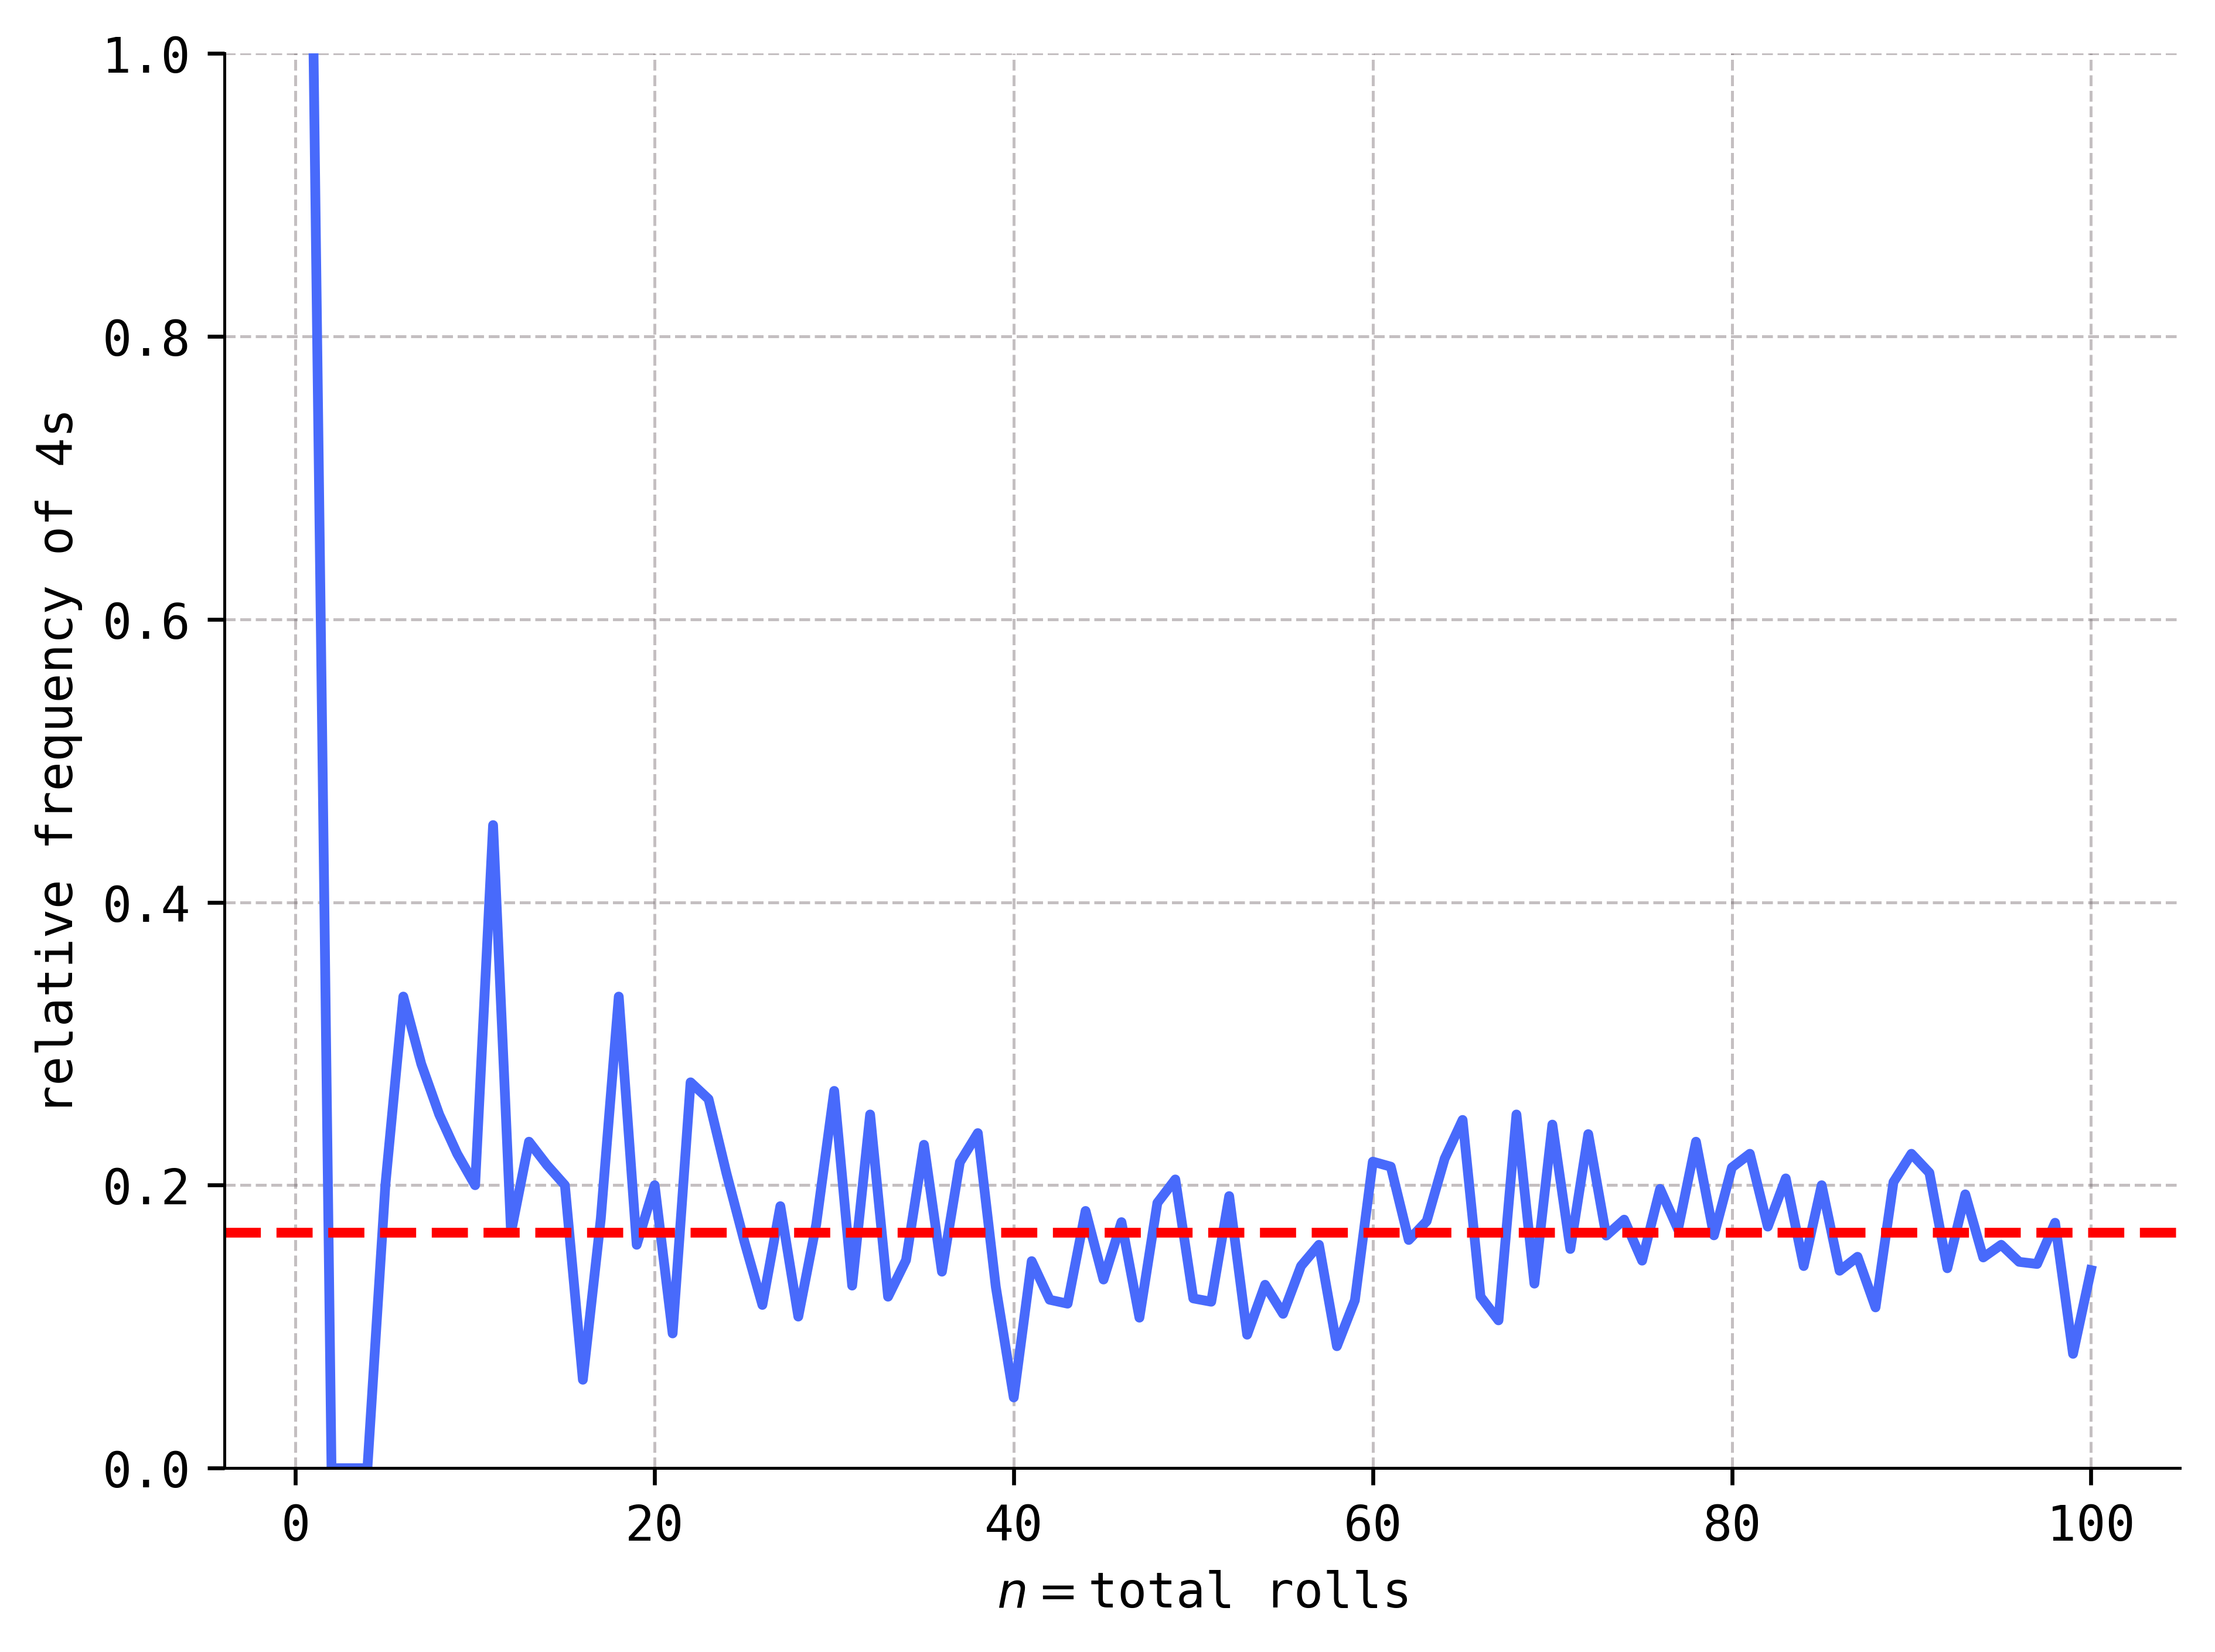

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint

# set custom style for plots
plt.style.use('../aux-files/custom_style_light.mplstyle')

# make sure this comes last in the imports!
# change the output resolution and size of figures
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 600

# end import section

max_roll = 100
frequencies = []

np.random.seed(42)

for n in range(1, max_roll+1):
    roll = randint(1, 7).rvs(size=n)
    frequency = np.count_nonzero(roll == 4) / n
    frequencies.append(frequency)

plt.plot(range(1, max_roll+1), frequencies)
plt.xlabel(r'$n=$total rolls')
plt.ylabel('relative frequency of 4s')
plt.axhline(y=1/6, color='red', linestyle='--')
plt.ylim(0, 1)
plt.tight_layout()

Along the horizontal axis you see the values of $n$, where $n$ is the total number of rolls. Along the other axis, you see the values of the relative frequency of $4$s. For example, when the computer rolled the die $n=20$ times, it appears that the relative frequency is almost exactly $0.2 = 20\%$. This means that we saw four $4$s out of $20$ total rolls. But do you notice that as the number of rolls $n$ increases, the relative frequency of $4$s appears to stabilize along the red dashed line? Let's have the computer go even further, rolling the die up to $n=1000$ times:

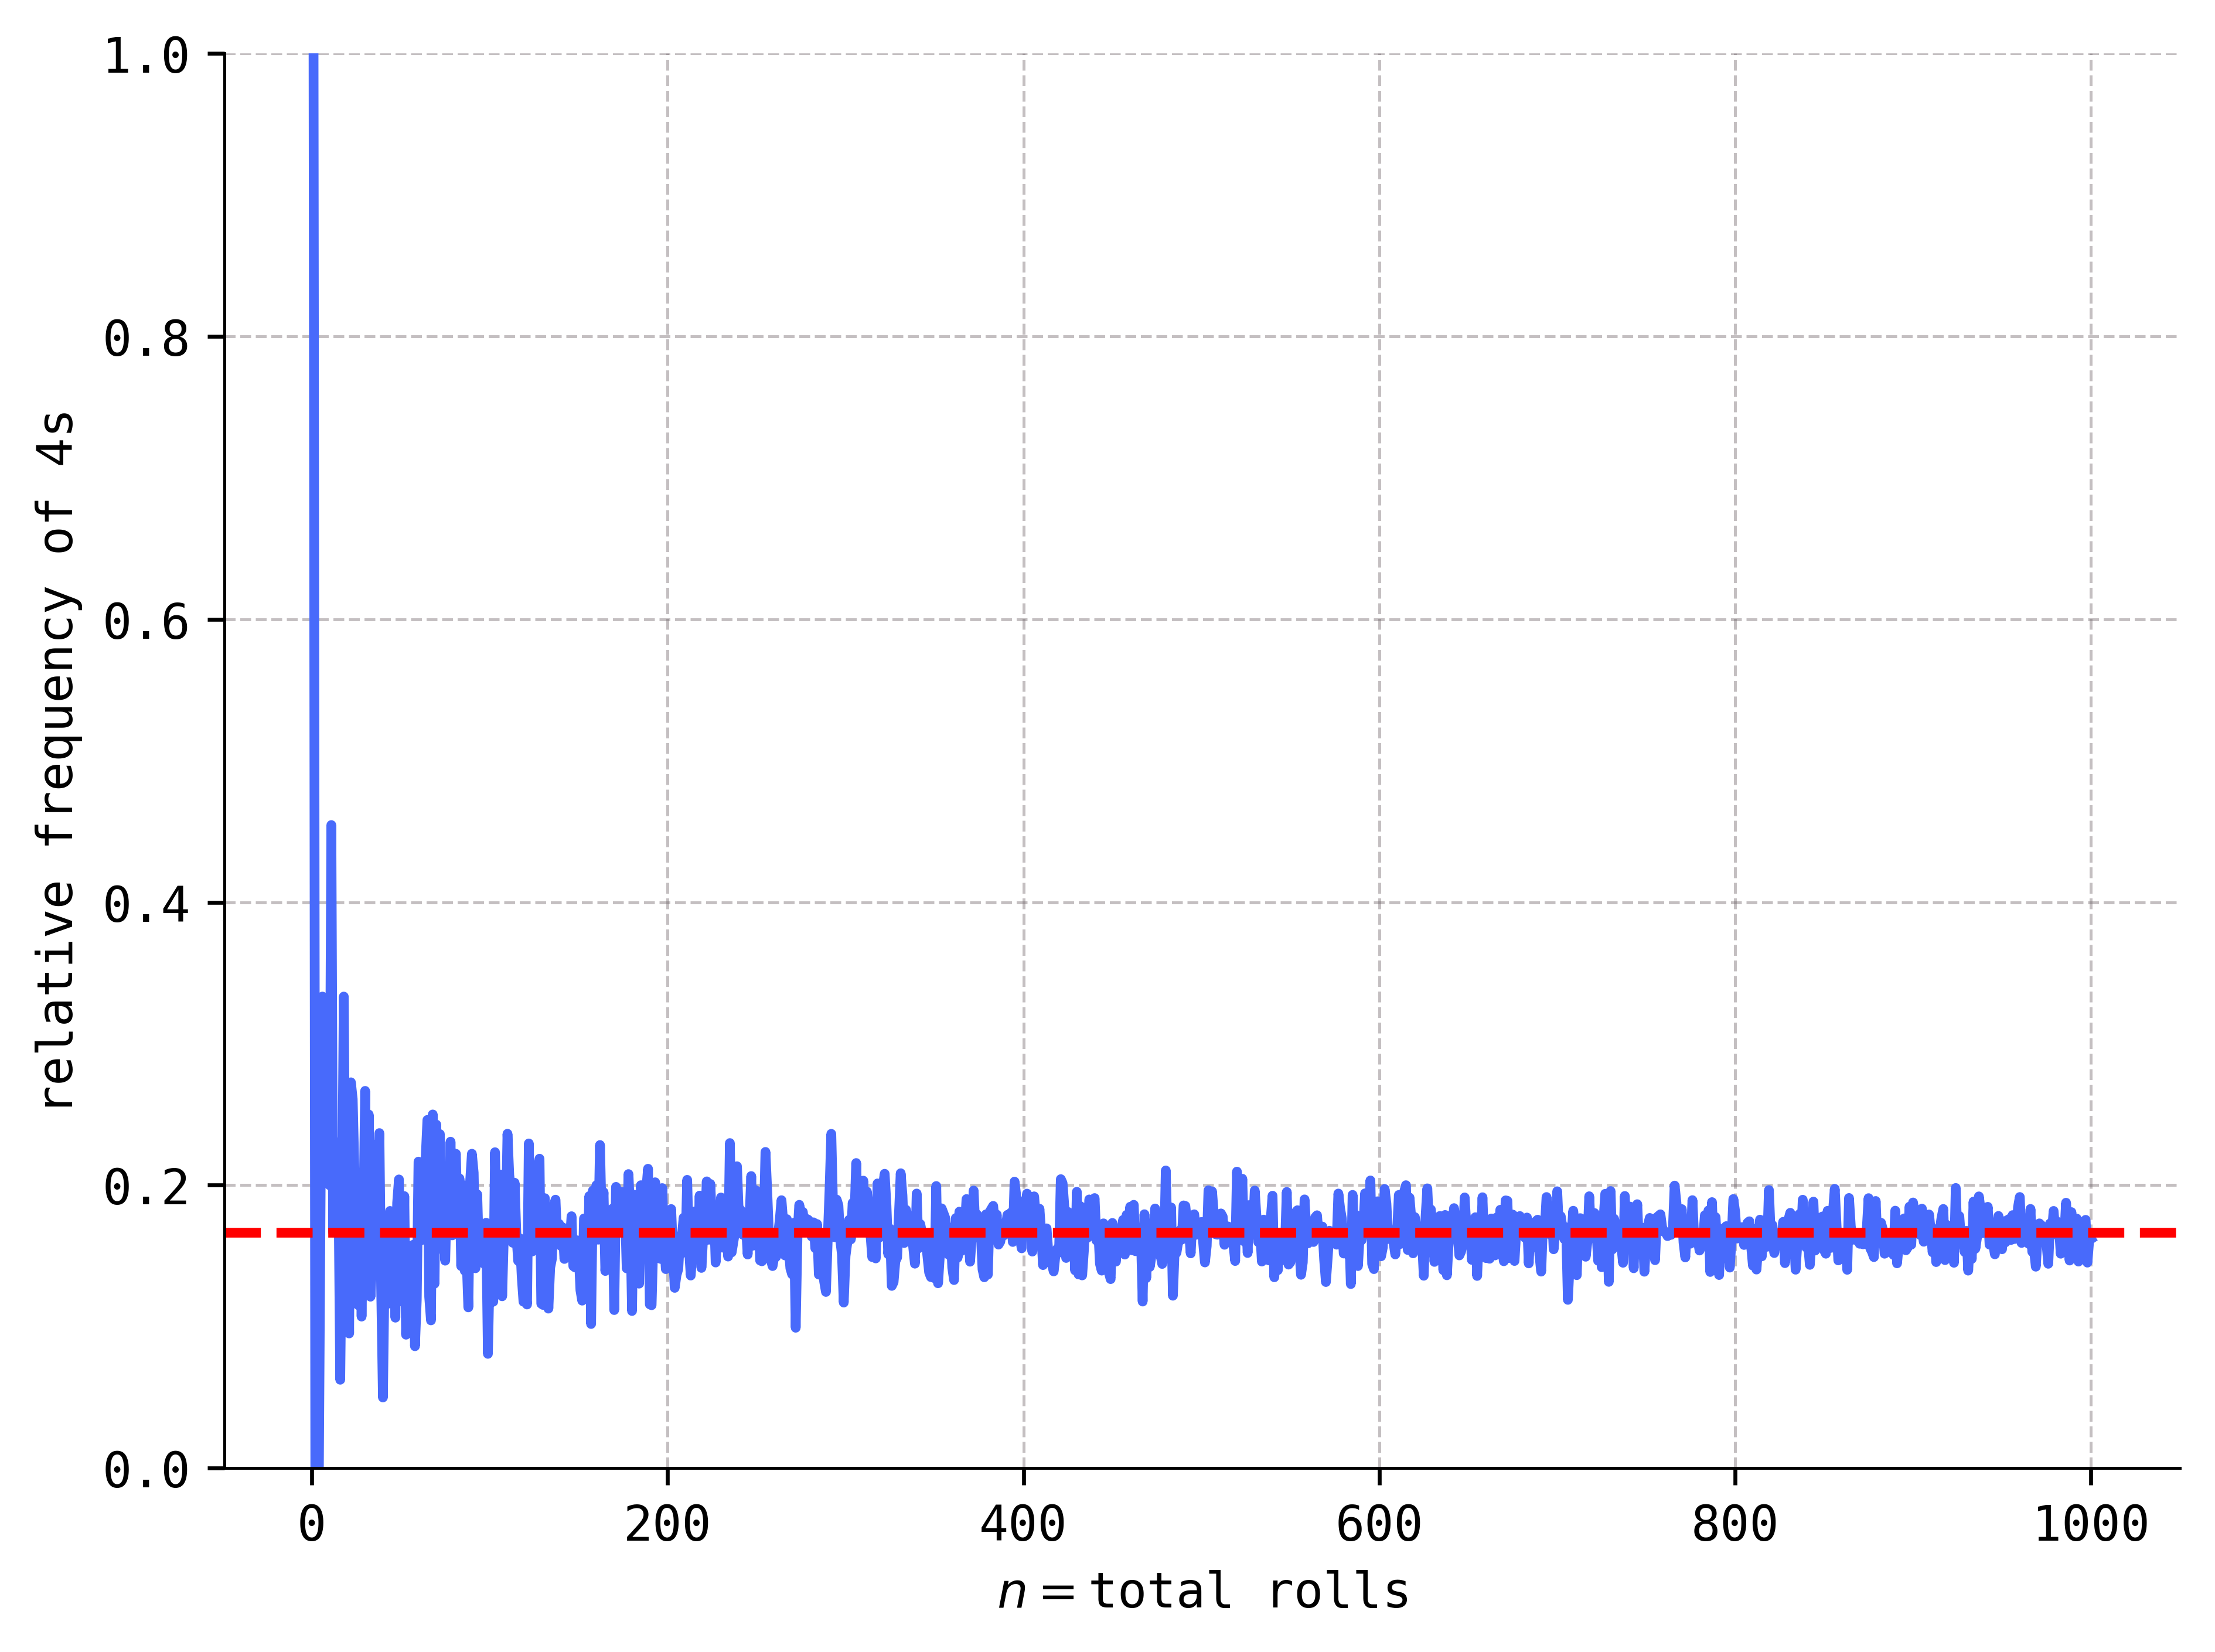

In [2]:
max_roll = 1000
frequencies = []

np.random.seed(42)

for n in range(1, max_roll+1):
    roll = randint(1, 7).rvs(size=n)
    frequency = np.count_nonzero(roll == 4) / n
    frequencies.append(frequency)

plt.plot(range(1, max_roll+1), frequencies)
plt.xlabel(r'$n=$total rolls')
plt.ylabel('relative frequency of 4s')
plt.axhline(y=1/6, color='red', linestyle='--')
plt.ylim(0, 1)
plt.tight_layout()

Now we can _really_ see that the relative frequency of $4$s is approaching the red dashed line. But this line just happens to be at a value of $1/6 = 0.1\bar{6}$!

This demonstration suggests that if we wanted a justification for the value $1/6$ for $P(4)$ that does not rely upon symmetries of the die, we might explain this value as the long-run relative frequency of the number of $4$s rolled.

This leads to a _third_ interpretation of probability:

> The interpretation that conceptualizes probabilities as long-run relative frequencies is called the _frequentist interpretation_ of probability.

The subjective and frequentist interpretations of probability are often portrayed as opposites of each other: Where one interpretation fails, the other seems to succeed.

The shortcomings and inadequacies of the frequentist interpretation are quite obvious. Indeed, the values that it assigns to probabilities are the limits of infinite sequences of events. But no such _infinite_ sequences exist in the real world. Even more than that, for some events, it's not even clear how we would generate _two_ identical repetitions! For example, if I attempted to justify on a frequentist basis a value of one-in-four for the probability that it will rain tomorrow, I would need to imagine tomorrow repeating itself over and over. But this is clearly absurd!

Despite its shortcomings, in this course, we will primarily work under the frequentist interpretation, if only because that's the one that adapts itself most directly to computer simulation (as you saw above). But the subjective interpretation will reappear later when we study Bayesian statistics. Beyond this course, my advice is to learn a little about each of the various interpretations of probability, but don't become so ideologically rigid that you _universally_ advocate for one over another.










## A first look at the axiomatic framework

So, as you can see, interpreting exactly what probability _means_ can be a messy affair, with some interpretations working well in some scenarios, while failing miserably in others. However, it is possible to develop an abstract mathematical theory of probability that does _not_ require any sort of real-world interpretation. This theory is based on a framework of three simple _axioms_ which codify the properties of probability that we should _all_ agree on, regardless of whatever real-world interpretation of probability we may favor. This theory provides a type of 'calculus' of probability, by which I mean that it provides a system for calculating precise probabilities. It doesn't solve the problem of _interpretation_, however.

To begin, let's first agree that all probabilities should be represented by numbers between $0$ and $1$:

```{prf:axiom} Probability
:label: prob1-axiom

Probabilities are represented by real numbers between $0$ and $1$, inclusive.
```

It is also natural to assume that the probability that _some_ outcome occurs (_something_ happens!) should be $1$:

```{prf:axiom} Probability
:label: prob2-axiom

The probability that _some_ outcome occurs is $1$.
```

To motivate the third and final axiom for probability, let's return to our die-rolling scenario described above.

I think all of us would agree that the probability of rolling an odd number is $1/2$, since precisely half of the numbers are odd. In symbols, we would write:

$$
P(\text{odd}) = \frac{1}{2}.
$$

A frequentist would confirm this by rolling the die many times and tracking the long-run relative frequency:

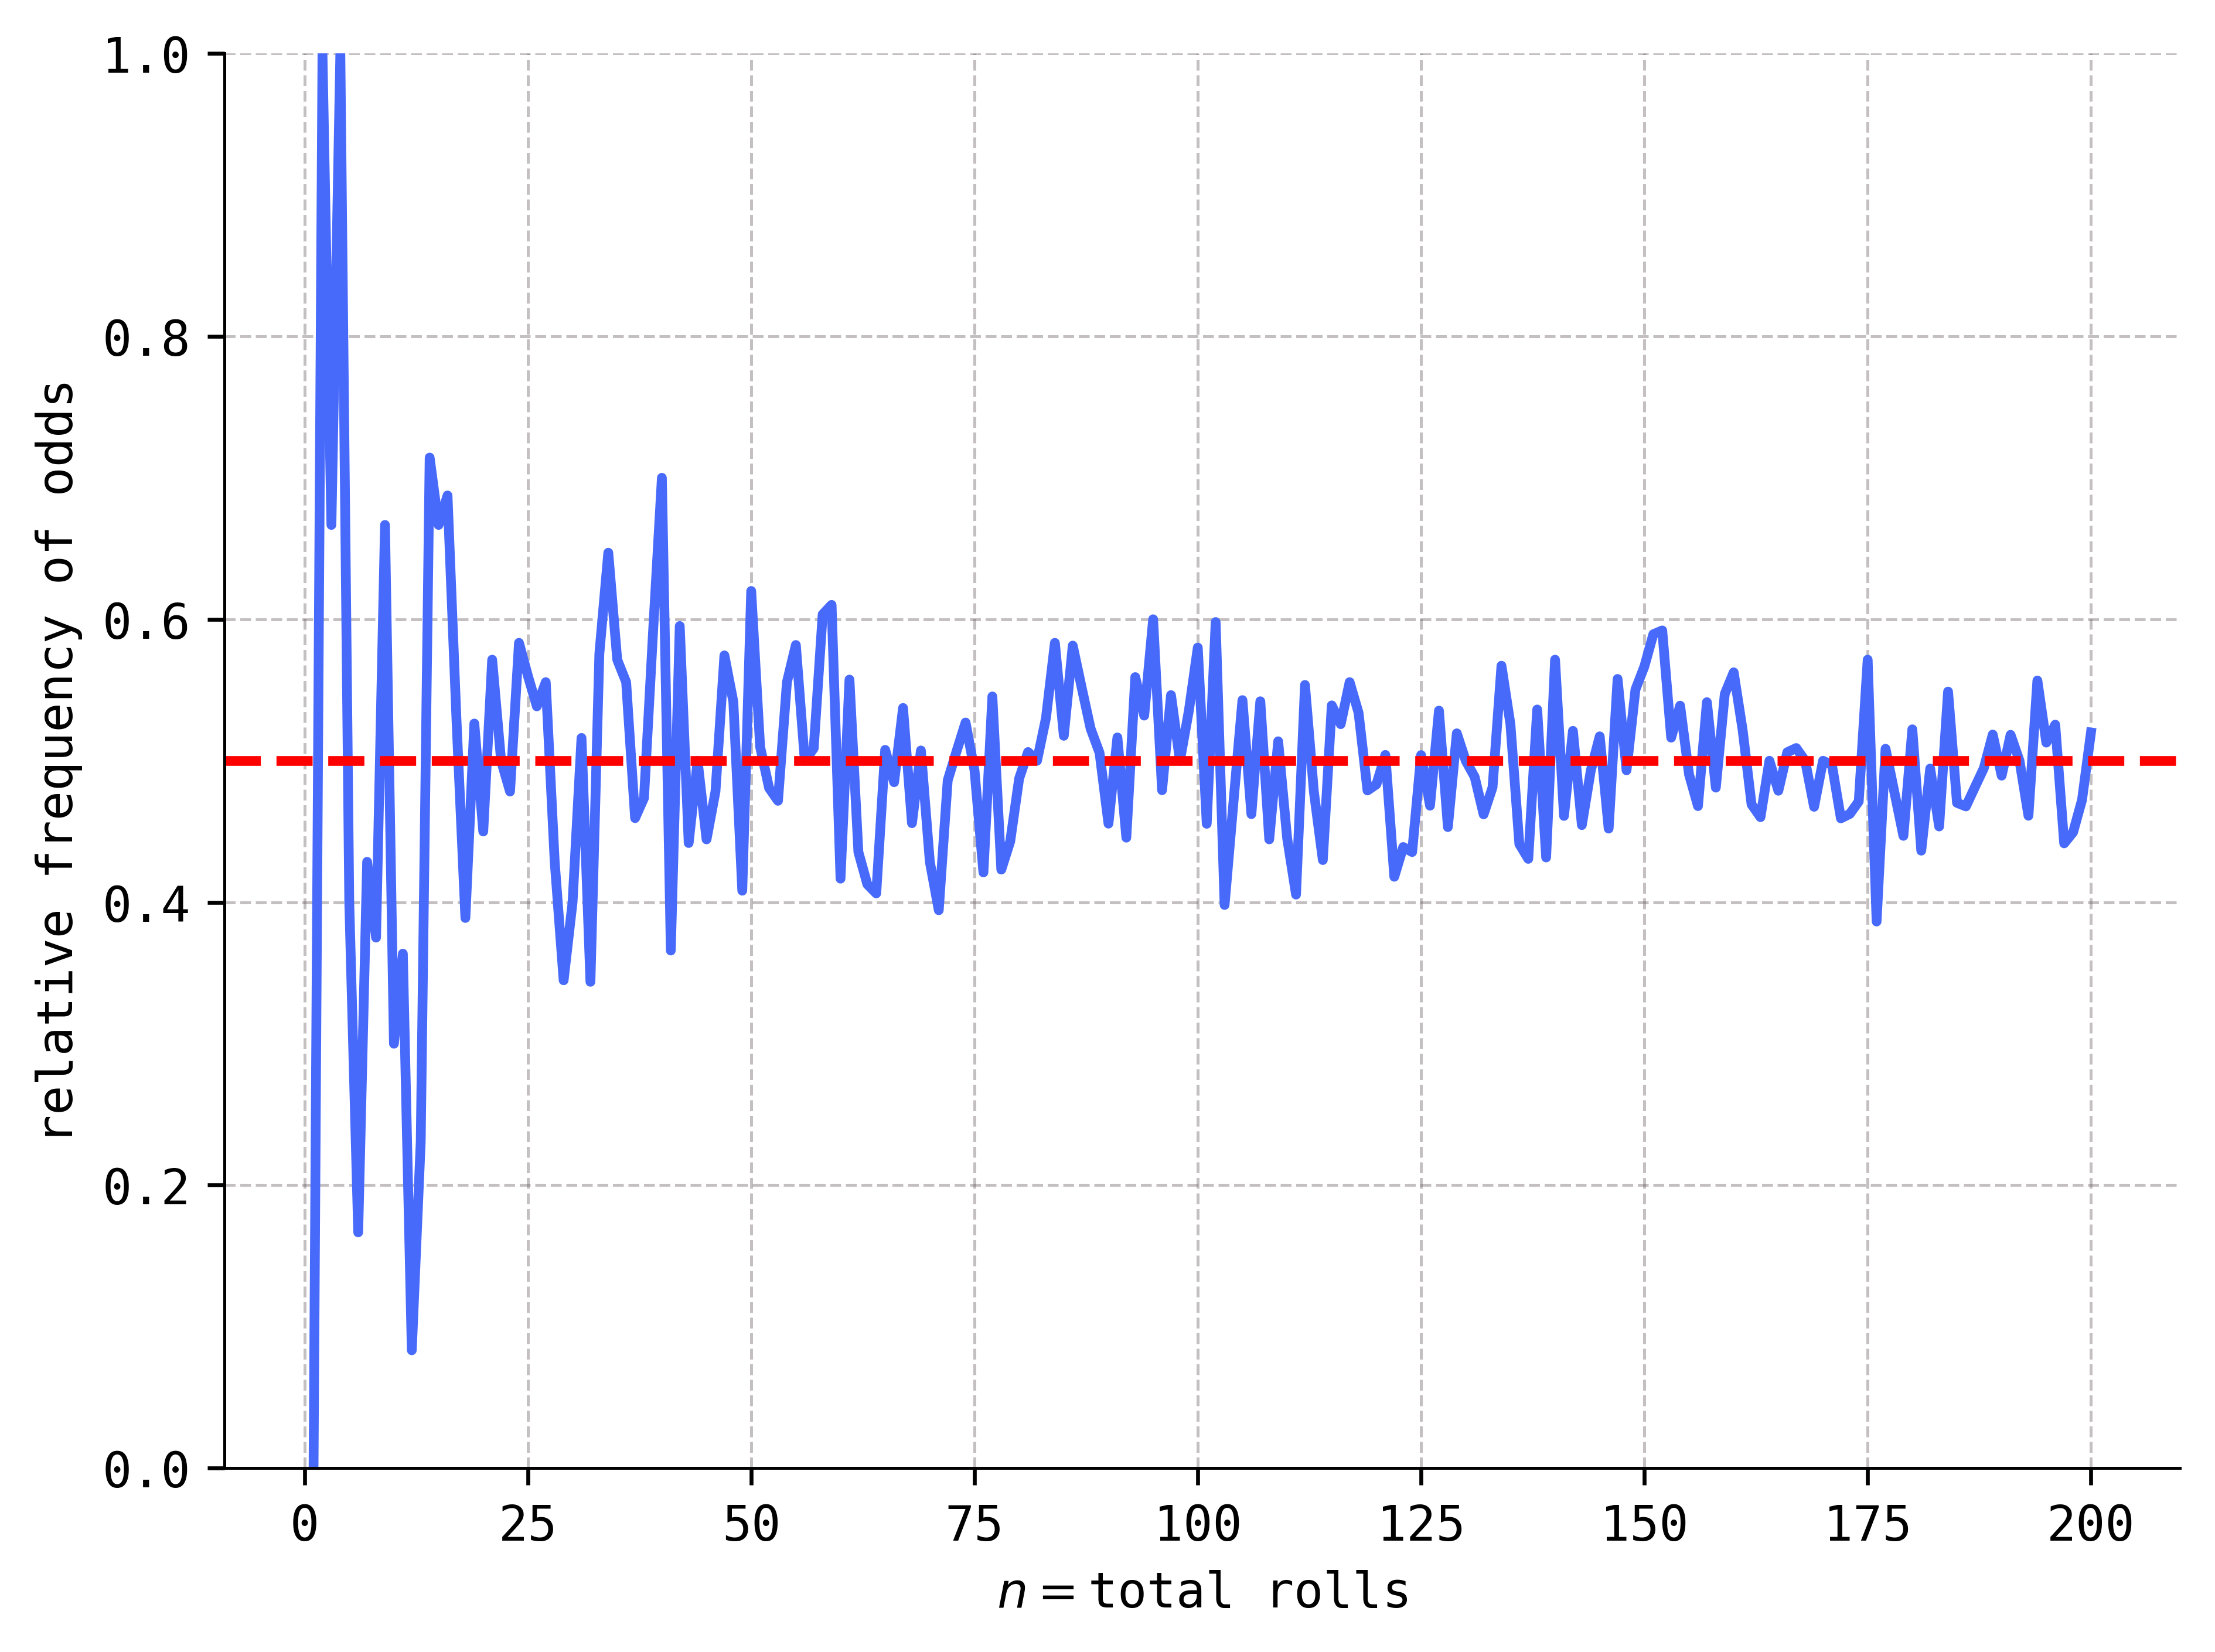

In [3]:
max_roll = 200
frequencies = []

np.random.seed(42)

for n in range(1, max_roll+1):
    roll = randint(1, 7).rvs(size=n)
    frequency = np.count_nonzero(roll % 2) / n
    frequencies.append(frequency)

plt.plot(range(1, max_roll+1), frequencies)
plt.xlabel(r'$n=$total rolls')
plt.ylabel('relative frequency of odds')
plt.axhline(y=1/2, color='red', linestyle='--')
plt.ylim(0, 1)
plt.tight_layout()

Sure enough, it appears that the relative frequency of rolling an odd is approaching the value $1/2 = 0.5$.

But the question I want to consider now is: What is the probability of rolling a $4$ _or_ an odd? In symbols:

$$
P(\text{$4$ or odd}) =\ ?
$$

To answer this question, let's have a look at three different long-run relative frequencies:

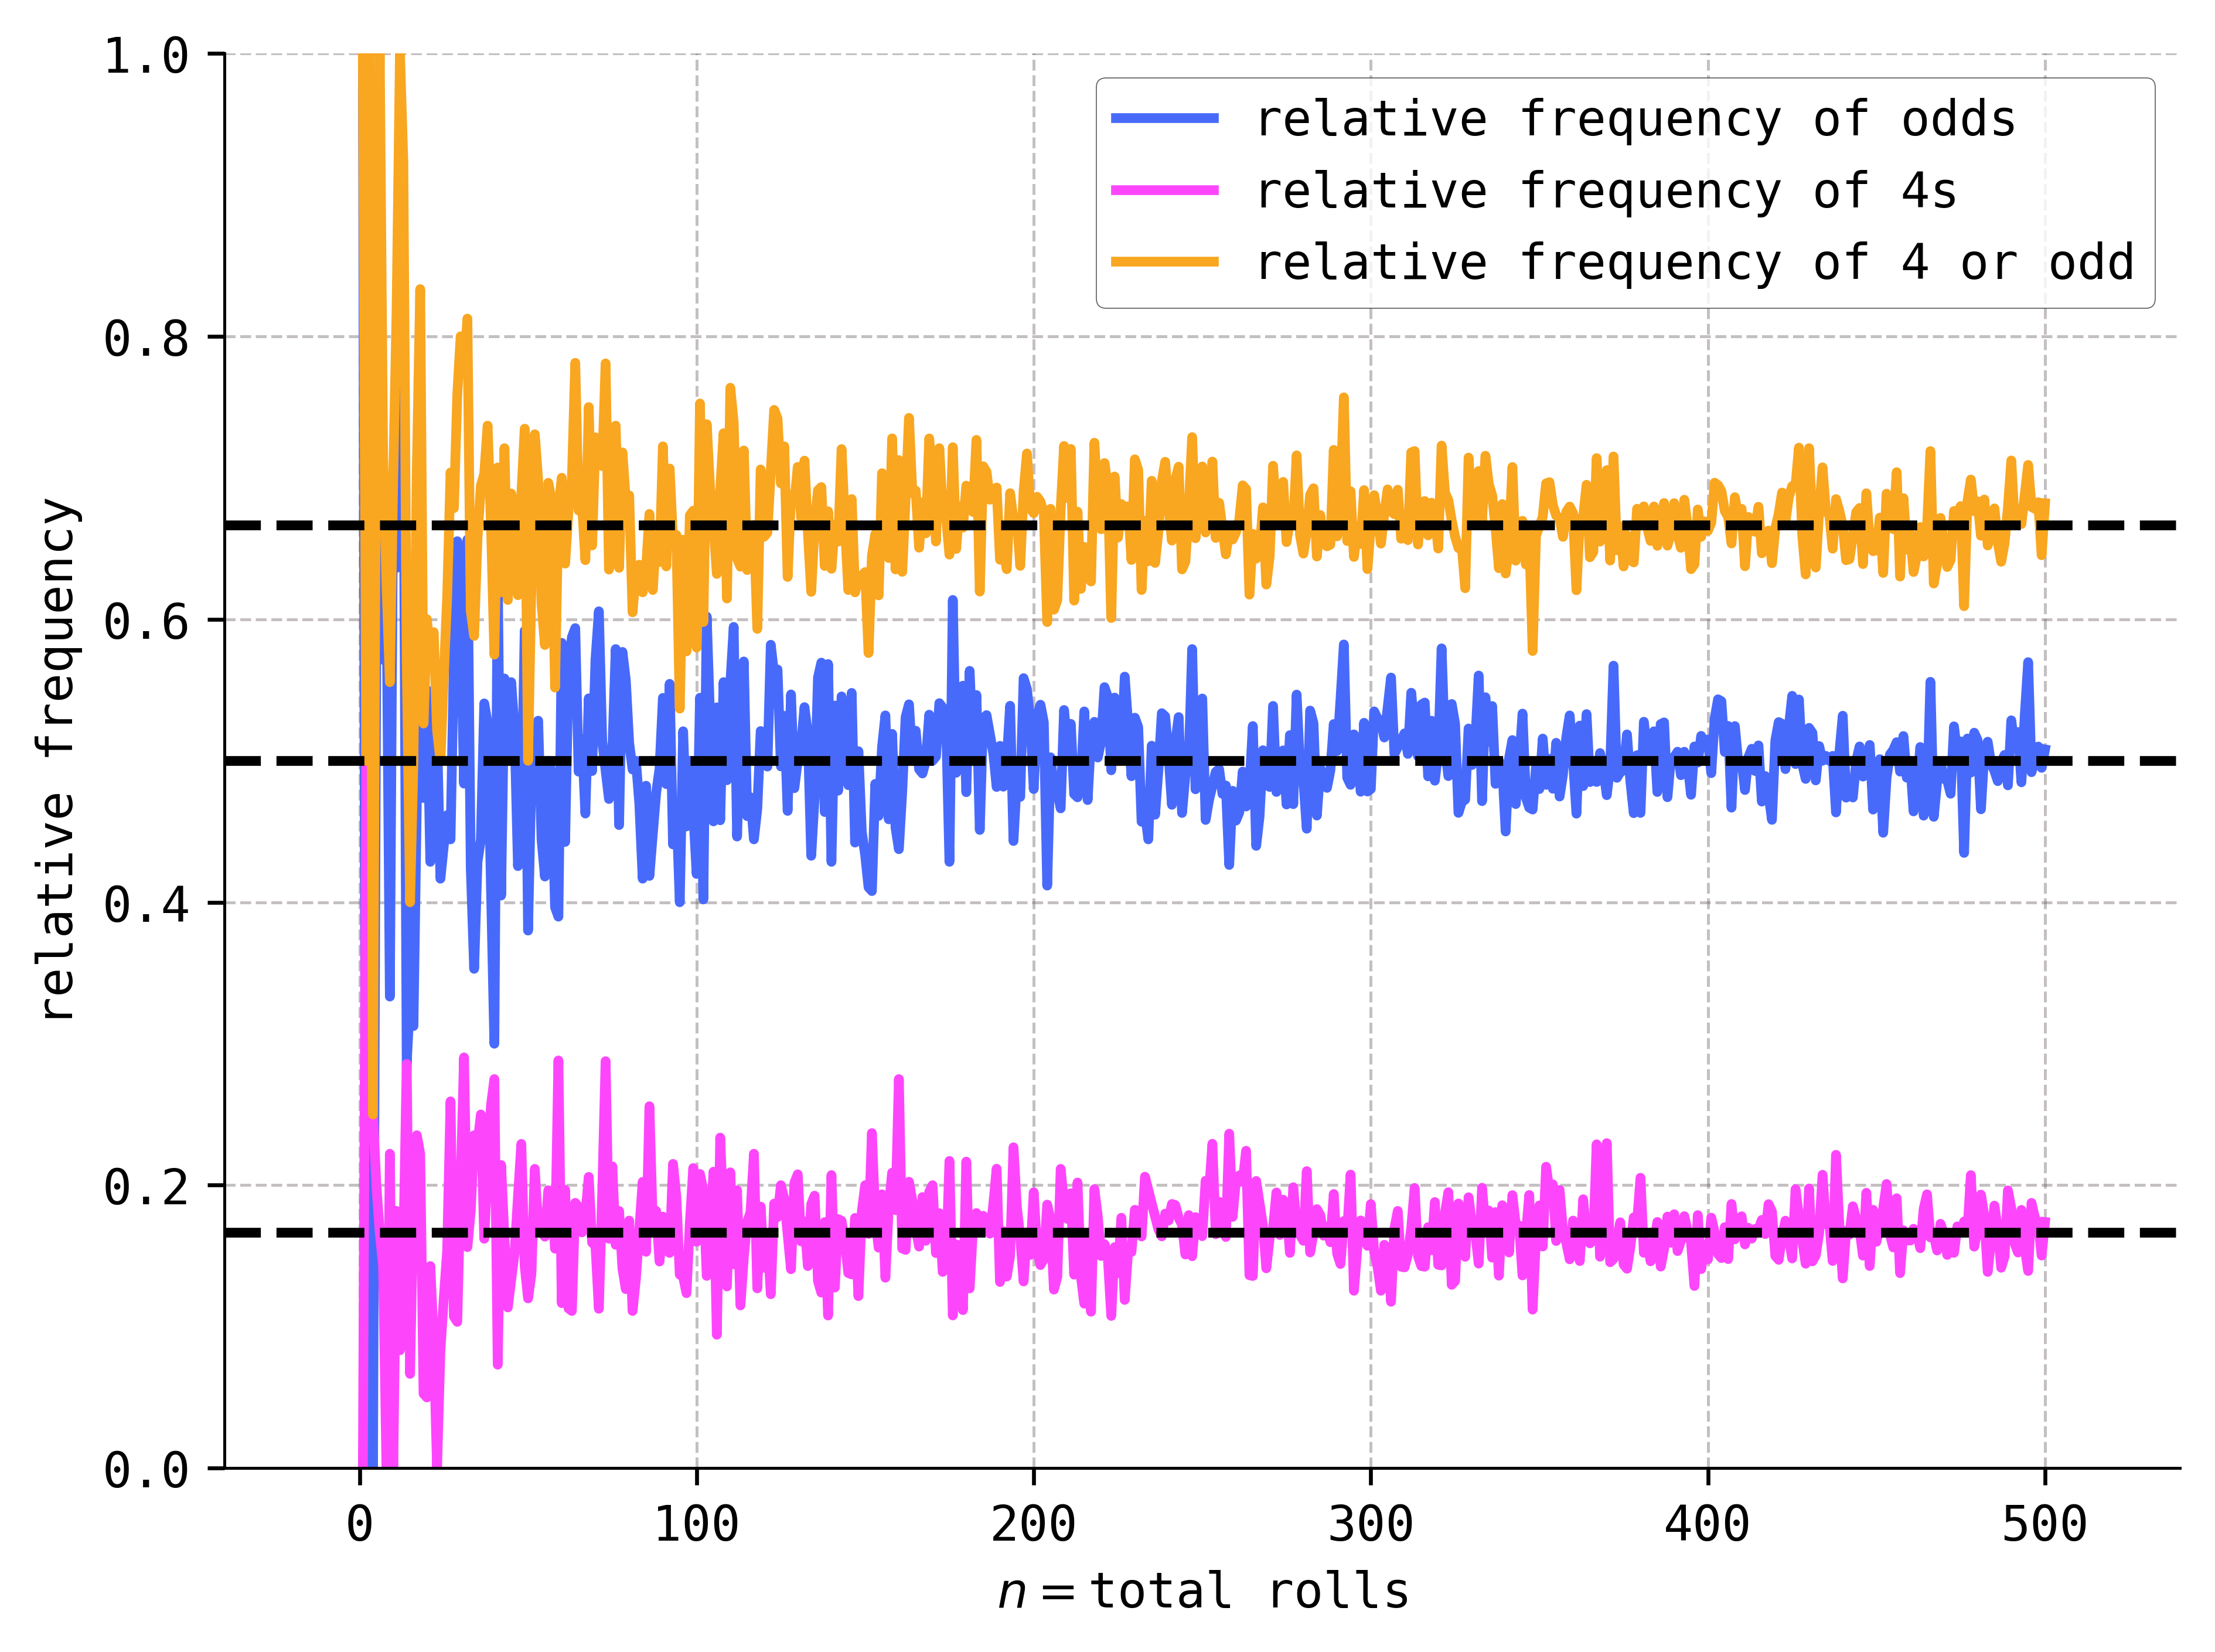

In [4]:
from cycler import cycler
cycler = cycler(color=['#486afb', '#FD46FC', '#F9A620'])
plt.rc('axes', prop_cycle=cycler)

max_roll = 500
frequencies_evens = []
frequencies_fours = []
frequencies_evens_or_fours = []

np.random.seed(42)

for n in range(1, max_roll+1):
    roll = randint(1, 7).rvs(size=n)
    frequency = np.count_nonzero((roll+1) % 2) / n
    frequencies_evens.append(frequency)
    frequency = np.count_nonzero(roll == 5) / n
    frequencies_fours.append(frequency)
    frequency = np.count_nonzero(((roll+1) % 2) | (roll == 5)) / n
    frequencies_evens_or_fours.append(frequency)

plt.plot(range(1, max_roll+1), frequencies_evens, label='relative frequency of odds')
plt.plot(range(1, max_roll+1), frequencies_fours, label='relative frequency of 4s')
plt.plot(range(1, max_roll+1), frequencies_evens_or_fours, label='relative frequency of 4 or odd')
plt.xlabel(r'$n=$total rolls')
plt.ylabel('relative frequency')
plt.axhline(y=1/2, color='black', linestyle='--')
plt.axhline(y=1/6, color='black', linestyle='--')
plt.axhline(y=1/2+1/6, color='black', linestyle='--')
plt.ylim(0, 1)
plt.xlim(-40, 540)
plt.legend()
plt.tight_layout()

You can see that the relative frequency of 4s approaches $1/6=0.1\bar{6}$, as we already knew, and also that the relative frequency of odds approaches $1/2=0.5$. But notice that the relative frequency of the event "4 _or_ odd" appears to approach a number between 0.6 and 0.7, perhaps a bit closer to 0.7 than 0.6.

But wait a minute! We know

$$
P(4) = \frac{1}{6} \quad \text{and} \quad P(\text{odd}) = \frac{1}{2},
$$

right? Notice that

$$
\frac{1}{6}+ \frac{1}{2} = \frac{2}{3} = 0.\bar{6},
$$

so it _appears_ that we have

$$
P(\text{$4$ or odd}) = P(4) + P(\text{odd}).
$$

This equation suggests that the probability of one event happening, _or another_, is simply the sum of the two individual probabilities. But, crucially, the two events cannot have any outcomes in common, for otherwise this rule does not work. For example, the probability of rolling a 4 _or_ an even number is just $1/2$, because the event of rolling a $4$ is _included_ in the event of rolling an even.

Now, I hope all of this makes the third and final axiom seem quite natural:

```{prf:axiom} Probability
:label: prob3-axiom

The probability of one or the other of two _disjoint_ events occurring is the sum of the individual probabilities.
```

Here, the word _disjoint_ simply means that there is no single outcome that is included in both events. Think of the examples above, of rolling a 4, rolling an odd, and rolling an even. The two events

$$
\{\text{roll a $4$}\}, \quad \{\text{roll an odd}\},
$$

are disjoint, while the events

$$
\{\text{roll a $4$}\}, \quad \{\text{roll an even}\},
$$

are _not_ disjoint, because the first event is entirely contained in the second.

And there we have it! As I will begin to show you in this chapter and throughout the rest of this course, these three axioms of probability may be used to develop a very sophisticated and powerful mathematical theory for computing probabilities. But as I mentioned at the beginning of this section, this _axiomatic framework_ does not solve the problem of *interpreting* probabilities, of course. When one applies the theory to real-world scenarios, the difficult question of exactly what probability *means* still remains to be argued over.






(set-theory)=
## A crash course in set theory

The first task that we set out for ourselves is to recast the three (informally stated) axioms of probability into the language of set theory. Thus, it will be useful to conduct a quick review of the highlights of the theory, for those who might have had no prior exposure or for those who simply need a refresher.

First:

```{prf:definition}
A *set* is a set.
```

Yes, you read that right. This is a laughably circular definition, but my point is simply that a _set_---for our purposes, at our level---is just a set of objects as you would understand in everyday life. There's nothing deep here; don't overthink it.

Now, let's go through the fundamental operations in set theory:

---

**Set notation.** Sets are usually represented with capital letters, and the members of a set are enclosed in curly braces. For example,
    
$$
A = \{1, 2, 3\}
$$

is the set containing the numbers $1$, $2$, and $3$, while

$$
B = \{ \text{June}, \text{July}, \text{August}\}
$$

is the set containing the three summer months. The things inside a set are called _elements_ or _points_ of the set, and the symbol "$\in$" is used to indicate that something is *in* a set. For example, I would write

$$
1 \in A \quad \text{and} \quad \text{June} \in B
$$

to indicate that the number $1$ is in the set $A$ and the month June is in the set $B$, while I would write

$$
4 \notin A \quad \text{and} \quad \text{March} \notin B
$$

to indicate that $A$ does _not_ contain $4$ and that $B$ does *not* contain March.

---

**Set-builder notation.** A convenient way to define the elements of a set is via something called _set-builder notation_. Here's an example:

$$
A = \{ x\in \mathbb{R} : x\geq 0\}.
$$

The colon "$:$" is pronounced "such that." So, in plain English, this set contains all real numbers $x\in \mathbb{R}$ such that $x\geq 0$. Thus, the set $A$ is nothing but the half-closed interval $[0,\infty)$. Set-builder notation is usually always written in this format:

$$
\{ \text{type of element} : \text{condition the element must satisfy}\}.
$$

For another example, consider the following set (remember that $\mathbb{Z}$ denotes the set of all integers):

$$
B = \{ n\in \mathbb{Z} : n = 2k \text{ for some $k\in \mathbb{Z}$}\}.
$$

In plain English, $B$ is the set of all integers $x\in \mathbb{Z}$ such that $n = 2k$ for some integer $k\in \mathbb{Z}$. But if $n$ is an integer multiple of $2$, it must be even. So $B$ is just the set of all even integers!

---

**Subsets.** Sometimes every element of a set $A$ might be an element in a bigger set $S$. When this happens, we write

$$
A \subset S
$$

and say that $A$ is a _subset_ of the set $S$. For example, we have

$$
\{1,2,3\} \subset \{1,2,3,4\},
$$

while

$$
\{1,2,3\} \not\subset \{1,2\},
$$

where the diagonal slash through the subset symbol $\subset$ means "**not** a subset." If we picture sets as blobs in Venn diagrams, then to say that $A$ is a subset of $S$ means that:

```{image} ../img/subset.svg
:width: 60%
:align: center
```
&nbsp;

However, if $A$ is _not_ a subset of $S$, then we would draw something like:

```{image} ../img/notsubset.svg
:width: 60%
:align: center
```
&nbsp;

---

**Unions.** If $A$ and $B$ are two sets, the set of elements that are in $A$ **or** $B$ is called the _union_ of $A$ and $B$ and is denoted $A\cup B$. In terms of a Venn diagram, we have:

```{image} ../img/union.svg
:width: 40%
:align: center
```
&nbsp;

For a specific example, suppose

$$
A = \{1,2,3\} \quad \text{and} \quad B = \{ 3, \text{June}, \text{July}\}.
$$

Then

$$
A \cup B = \{ 1,2,3, \text{June}, \text{July}\}.
$$

Notice that even though $3$ appears as an element in both $A$ and $B$, it only appears *once* in the union $A\cup B$. This is because sets _ignore repetition_.

---

**Intersections.** If $A$ and $B$ are two sets, the set of elements that are in $A$ **and** $B$ is called the _intersection_ of $A$ and $B$ and is denoted $A\cap B$. In terms of a Venn diagram, we have:

```{image} ../img/intersection.svg
:width: 30%
:align: center
```
&nbsp;

With the example sets

$$
A = \{1,2,3\} \quad \text{and} \quad B = \{ 3, \text{June}, \text{July}\}.
$$

from above, we would have

$$
A \cap B = \{ 3\}
$$

since $3$ is the only element that appears in both $A$ and $B$.

---

**The empty set.** We write $\emptyset$ to denote the empty set, the set with no elements. To see how this set is used, note that if

$$
A = \{1,2,3\} \quad \text{and} \quad B = \{ \text{June}, \text{July}, \text{August}\},
$$

then

$$
A \cap B = \emptyset.
$$

This equation simply says that the set of elements that are in $A$ and $B$ is empty, since there's no one element that is in both!

This leads us to make a definition of a term that we saw in the previous section:

```{prf:definition}

Two sets $A$ and $B$ are called *disjoint* if their intersection is empty, i.e., $A \cap B = \emptyset$.
```

---

**Complements.** Suppose that $A$ is a subset of a set $S$. Then the _complement_ of $A$ in $S$ is the set of elements that are in $S$, but not in $A$. It is denoted $S\smallsetminus A$. In terms of a Venn diagram:

```{image} ../img/complement.svg
:width: 40%
:align: center
```
&nbsp;

For a specific example, suppose that

$$
A = \{1,2,3 \} \quad \text{and} \quad S = \{1,2,3,4,5,6\}.
$$

Then

$$
S\smallsetminus A = \{ 4, 5, 6\}.
$$

In order to shorten notation, we will often write $A^c$ to stand for the complement $S\smallsetminus A$, where the superscript "$c$" stands for "complement."

---

**Functions.** A _function_ is a "machine" $f$ that takes elements of one set $D$ (called the _domain_) as inputs, and returns outputs contained in another set $C$ (called the _codomain_). This is represented symbolically by writing

$$
f:D \to C.
$$

Notice that this notation _only_ specifies the name of the function and its domain and codomain, but it does _not_ specify exactly _how_ the function manufactures outputs from inputs. For example, if I write

$$
f:\mathbb{R} \to \mathbb{R},
$$

then all you know is that the function $f$ takes real numbers as inputs and spits out real numbers as outputs. In order to nail down the function precisely, I would need to describe _how_ the function accomplishes this task. For example, I could write $f(x) = x^2$, which completely specifies the function.

---

**Cardinality.** The _cardinality_ of a set $A$ is simply the number of elements that it contains, and is represented by absolute value bars $|A|$. For example, if

$$
A = \{a, b,c\},
$$

then the cardinality of $A$ is $|A|=3$. Of course, some sets contain infinitely many elements, in which case the cardinality of the set is $\infty$.

That's it for the definitions! We'll get some further practice with these concepts as we work through the worksheets in class.

```{admonition} Problem Prompt
Now, I would suggest that you tackle problems 1 and 2 in worksheet.
```









## Probability spaces

With the notation and terminology of set theory in hand, we are now ready to assemble and package our three axioms of probability into a new mathematical object called a *probability space*.

But before we launch into the abstract definition, it will be worth reviewing what we're trying to accomplish. Basically, everything in this chapter revolves around the following question:

> **Q**: What *is* probability?

In the first section of this chapter, we saw the *frequentist interpretation* of probability, which, with the goal of making probability seem less subjective, conceives of probabilities as long-run relative frequencies. But there are problems with this interpretation, because to compute the long-run relative frequency of an event, you must imagine the event occurring over and over. But clearly this doesn't make sense in *all* situations and scenarios!

This suggests that the answer to the fundamental question "*What is probability?*" might be more difficult to come by than you might have first imagined. So, instead of getting lost in the philosophical weeds struggling to cook up a good answer, we essentially side-step the question:

> **Q**: What *is* probability? \
> \
> **A**: I don't know. But I **do** know that probabilities, no matter what they are, should follow a simple set of three rules, or axioms:
> 1. Probabilities are represented by real numbers between $0$ and $1$, inclusive.
> 2. The probability that _some_ outcome occurs is $1$.
> 3. The probability of one or the other of two _disjoint_ events occurring is the sum of the individual probabilities.

So, our goal in this section is to take these three axioms and turn them into precise mathematics written in the language of set theory.

To cut straight to the chase, the three axioms will be distilled and encoded in a mathematical gadget called a _probability measure_, which makes up one part of the following type of object:

```{margin} Looking beyond...

Technically, this definition of an _event_ is _almost_ correct. There's actually something that needs to be [added](https://en.wikipedia.org/wiki/%CE%A3-algebra) in the case of a "non-discrete" probability space that restricts which subsets are allowed to be _events_. But we don't worry about that stuff at this level.
```

```{prf:definition}

A _probability space_ consists of three things:

1. A set $S$ called the _sample space_.
    
    * A sample space $S$ often consists of all possible outcomes of a process or experiment, or it is the population under study (as defined back in {prf:ref}`population-def`).
    
    * The elements of $S$ are called _sample points_ or _outcomes_.

2. A collection of subsets of $S$, called _events_.

    * So, an event in a sample space is nothing but a subset of the sample space.
    
    * An event containing just one sample point is called a _simple event_. All other events are called _compound events_.

3. A _probability measure_ $P$.

    * Briefly, a probability measure is a function that assigns probabilities to events. (The precise definition is given in {prf:ref}`prob-measure-def` below.)
```

This is the picture that I have in mind when I think of probability spaces:

```{image} ../img/probSpaceSum.svg
:width: 80%
:align: center
```
&nbsp;

In the picture, we have a sample space $S$, along with two events $A$ and $B$. The event $A$ is a _compound event_ because it consists of multiple outcomes (or sample points), while the event $B$ is _simple_ because it consists of a single outcome (or sample point). We see the probability measure $P$ represented as a function which outputs the probabilities $P(A)$ and $P(B)$ of the events $A$ and $B$.

As I mentioned, a sample space $S$ often consists of _all_ outcomes of some process or experiment, or it is the population under study. Let's go through a few examples in:

```{admonition} Problem Prompt
Do problem 3 on the worksheet.
```

Even though all the sample spaces that we listed in our solution to this problem correspond to the outcomes of some real-world process, scenario, or experiment, an abstract sample space $S$ just has to be a _set_. It doesn't _actually_ have to correspond to anything real. Remember, we are working in the abstract, mathematical realm!

Let's go through some examples of events in:

```{admonition} Problem Prompt
Do problems 4-6 on the worksheet.
```

Before we move on to talk about the third ingredient in a probability space, let me add one important thing about events:

````{prf:theorem} Properties of Events

Let $S$ be a sample space.

1. If $A$ is an event, then so too is its complement $S\smallsetminus A$.

2. The entire sample space itself is always an event, and so is the empty set $\emptyset$.

3. If $A$ and $B$ are events, then so too is the union $A\cup B$ and intersection $A\cap B$.

4. In fact, if $A_1,A_2,A_3,\ldots$ is an infinite sequence of events, then the infinite union
  
    ```{math}
    A_1 \cup A_2 \cup A_3 \cup \cdots
    ```
  
    and the infinite intersection

    ```{math}
    A_1 \cap A_2 \cap A_3 \cap \cdots
    ```

    are also events.
````

These properties are essentially here for logical consistency and won't play a giant role in our course. In deeper treatments of probability theory they become much more important, and they are connected with the technicality I mentioned above regarding what subsets are allowed to be _events_ in a "non-discrete" probability space.

Onward to the third (and final!) ingredient of a probability space!

```{prf:definition}
:label: prob-measure-def

Let $S$ be a sample space. A _probability measure_ $P$ (also called a _probability distribution_) is a function that to each event $A$ in $S$ assigns a number $P(A)$, called the _probability of $A$_, subject to the following axioms:

1. $P(A) \geq 0$ for all events $A$.

2. $P(S)=1$.

3. If $A_1,A_2,A_3,\ldots$ is a sequence of pairwise disjoint events in $S$, then
    
    $$
    P(A_1 \cup A_2 \cup A_3 \cup \cdots) = \sum_{i=1}^\infty P(A_i).
    $$
```

Now, even though it might not be clear at first glance, these defining axioms of a probability measure are actually the embryonic set-theoretic forms of our three probability axioms! It takes a bit of work to coax our axioms out of them, but trust me, they're there.

In fact, not only do our three probability axioms flow from them, but a few other nice properties of probability too:

```{prf:theorem} Properties of Probability Measures

Let $P$ be a probability measure on a sample space $S$.

1. If $A$ is an event, then $P(A)\leq 1$.

2. If $A$ and $B$ are events and $A\subset B$, then $P(A) \leq P(B)$.

3. If $A$ is an event, then $P(A^c) = 1-P(A)$.

4. If $A$ and $B$ are disjoint events, then $P(A\cup B) = P(A) + P(B)$.

5. We have $P(\emptyset)=0$.
```

It takes a good amount of work to _prove_ that these properties all follow from the three defining axioms of a probability measure. The proofs are contained in your textbook, if you'd like to have a look. (Better yet, prove them on your own.)

Notice, in particular, that the first property above combined with the first axiom of a probability measure together show that all probabilities are between $0$ and $1$, which was our first axiom of probabilities. The second axiom of a probability measure (the one that states $P(S)=1$) says precisely that the probability that _some_ outcome occurs is $1$, because $S$ consists of _all_ outcomes. Finally, the third axiom for probability is exactly the fourth property listed in the box above.

Ok. Before moving on, let's recap.

The first thing to make sure you understand is that a probability measure $P$ is nothing but a function which takes events as inputs and spits out probabilities:

```{image} ../img/probmeasure.svg
:width: 60%
:align: center
```
&nbsp;

Using our notation for functions, I might even write this as:

$$
P: \{\text{all events}\} \to [0,1].
$$

Notice the domain of $P$ is the set of all events, while the codomain is the closed interval of all real numbers between $0$ and $1$.

You also need to remember that a _probability space_ is actually a package that consists of three things:

1. A sample space $S$.

2. A collection of events.

3. A probability measure $P$.

If you're missing even one of these ingredients, then you do *not* have a probability space.

```{warning} 
Having said this, I will often refer to the sample space $S$ as if it *were* the probability space, even though this is technically incorrect. This will help shorten the language and cut down on verbosity, and it should not cause any great confusion.
```

Finally, let me note that it is possible for the _same_ set $S$ to serve as the sample spaces for two _different_ probability spaces if the probability measures are different. We will see this occur below when we talk about _continuous probability measures_.










(big-pic-1)=
## The big picture: How do we use probability spaces and distributions?


As we go through this class, you should imagine that you are filling up your toolkit with various special types of probability spaces and distributions. Then, when you're confronted with some real-world scenario that you'd like to model, you reach into your toolkit and find the correct probability distribution which fits the scenario. The challenge, of course, is to figure out exactly _which_ one works the best!

```{image} ../img/whichone.svg
:width: 65%
:align: center
```
&nbsp;

This is really hard, so do not despair if it's difficult at first! Professional statisticians and applied mathematicians spend a huge part of their professional lives struggling with this question!









(discrete-prob)=
## Discrete and uniform probability measures

So, let's begin filling up our probabilistic toolkit!

The first types of probability measures that we shall study are the _discrete_ ones. To define them, first we need a definition:

```{prf:definition}
Let $S$ be any set and $p:S\to \mathbb{R}$ a function.

1. The _support_ of $p$ is the set of all points $s\in S$ where $p(s)$ is nonzero, i.e., it is the set
      
      $$ \{s\in S : p(s) \neq 0\}.$$ (supp-eqn)

2. The function $p$ is said to have _discrete_ support if its support {eq}`supp-eqn` is either finite or countably infinite.
```

But wait a minute! What does "countably infinite" mean?

```{prf:definition} sort of

A set $A$ is *countably infinite* if, given an infinite amount of time, I could count the elements of $A$ one at a time, counting one element per second.
```

Of course, this isn't really a precise mathematical definition, but I think it gets the idea across. It just means that the set $A$ is _countably infinite_ if its elements can be paired off one-by-one with the set of positive whole numbers

$$\{1,2,3,\ldots\}.$$

For example, I could count an infinite sequence of bananas, so this sequence would be considered countably infinite:

```{image} ../img/bananas.svg
:width: 65%
:align: center
```
&nbsp;

On the other hand, any interval of real numbers, including the entire real line $\mathbb{R}$ itself, is **un**countably infinite. For example, consider the interval $[0,1]$:

```{image} ../img/uncountable.svg
:width: 65%
:align: center
```
&nbsp;

Indeed, if we are counting the numbers in $[0,1]$ from left to right, we would be tempted to choose $0$ as the first number---but what would the second number be? And, even if you managed to think of a good candidate for the second number, you'd never be able to count all numbers in $[0,1]$, one at a time, one per second, _even if you had an infinite amount of time_. There are actually rigorous mathematical proofs of this!

We are now ready to define _discrete probability measures_:

```{prf:definition}
Let $P$ be a probability measure on a sample space $S$. We shall say $P$ is _discrete_ if every subset $A\subset S$ is an event and there is a function $p:S\to \mathbb{R}$ with discrete support such that

$$P(A) = \sum_{s\in A} p(s),$$(disc-eqn)

for all events $A$. In this case, the function $p$ is called the _probability mass function_ (PMF) of the probability measure $P$ (or sometimes just the _probability function_), and $S$ is called a _discrete probability space_ (when equipped with $P$).
```

Intuitively, a probability measure is discrete if the probability is "concentrated" on a discrete set of sample points, and isn't smeared out continuously over the entire probability space. (The words _discrete_ and _continuous_ are often treated as opposites in mathematics.)

The formula {eq}`disc-eqn` might initially look confusing, but it's actually quite simple. It just means this:

* If you want to compute the probability $P(A)$ of an event $A$, simply find all sample points $s\in A$, compute $p(s)$ for each of these $s\in A$, and then add them all up.

If the support of $p$ is finite, then you will only be adding finitely many values $p(s)$. On the other hand, if the support of $p$ is countably infinite, then the sum {eq}`disc-eqn` turns into an infinite series! We will see examples of this in:

```{admonition} Problem Prompt
Do problems 7 and 8 on the worksheet.
```

Now, I want to state some properties of probability functions:

```{prf:theorem} Properties of Probability Mass Functions
Let $p(s)$ be the probability mass function of a discrete probability measure $P$. Then:

1. $p(s) \geq 0$ for all $s\in S$, and

2. $\sum_{s\in S} p(s) =1$.
```

To see why (1) is true, suppose it were _not_ true, and that there exists a sample point $s\in S$ with $p(s)<0$. Then, the simple event $\\{s\\}$ would have _negative_ probability:

$$P(\{s\}) = p(s) <0.$$

But this cannot happen, and thus we must have $p(s) \geq 0$ for all $s\in S$. To see why (2) is true, observe that it follows immediately from {eq}`disc-eqn` and the fact $P(S)=1$.

You might be concerned that I did not mention explicitly that $p(s) \leq 1$ (for all $s\in S$). But this inequality is actually a _consequence_ of (1) and (2). Do you see why?

The two properties of probability functions identified above are very important, because they essentially characterize _all_ functions that can serve as probability functions for _some_ discrete probability measure. This is the content of the following important result that we will use over and over:

```{prf:theorem} Discrete Probability Construction Lemma

Let $S$ be a set and $p:S \to \mathbb{R}$ a function with discrete support. If

1. $p(s) \geq 0$ for all $s\in S$, and

2. $\sum_{s\in S} p(s) =1$,

then there is a unique discrete probability measure $P$ on $S$ such that

$$P(A) = \sum_{s\in A} p(s)$$

for all $A\subset S$.
```

The gist of this Construction Lemma is that, in order to construct a discrete probability measure on a set $S$, all we need to do is define an appropriate probability mass function.

To explain further, for simplicity let's consider the case of a _finite_ set $S$ consisting of just four points:

$$S = \{s_1,s_2,s_3,s_4\}.$$

Technically, according to the definition, if we wanted to define a (discrete) probability measure $P$ on $S$, we would need to specify the probability $P(A)$ for _all_ subsets $A\subset S$. But there are $2^4 = 16$ such subsets! Instead, according to the Discrete Probability Construction Lemma, in order to define $P$ uniquely, all we need to do is define the probability function $p(s)$ by specifying the four probabilities

$$p(s_1), p(s_2), p(s_3), p(s_4) \geq 0,$$

while making sure that they sum to $1$. For example, we could do it this way:

```{image} ../img/discrete.svg
:width: 65%
:align: center
```
&nbsp;

Not so bad, right? The Discrete Probability Construction Lemma might look intimidating, but it's really quite simple. And it's precisely this simplicity afforded by the Construction Lemma that makes discrete probability spaces so easy to work with, compared to more complicated probability spaces that we will encounter later.

There are _even simpler_ versions of discrete probability measures!

```{prf:definition}
Let $P$ be a discrete probability measure on a sample space $S$ with probability mass function $p(s)$. Then $P$ is called a _uniform probability measure_ if the support of $p(s)$ has finite cardinality $n>0$, and if

$$p(s) = \frac{1}{n}$$

for each $s$ in the support of $p$.
```

Continuing with our four-element set $S$ above, a uniform probability measure simply gives _identical_ probabilities to each point in the support of the probability function. If we suppose that each $s_k$ ($k=1,2,3,4$) is in the support of $p$, then each $s_k$ would receive probability $1/4$:

```{image} ../img/uniform.svg
:width: 65%
:align: center
```
&nbsp;


```{admonition} Problem Prompt
Do problems 9-11 on the worksheet.
```










(prob-histo)=
## Probability histograms

In the previous section, I drew little cartoon pictures to help us conceptualize discrete probability measures and spaces. But, at least when the sample space is the real line $S=\mathbb{R}$, it turns out that there is a much more useful way to visualize discrete probability measures using _probability histograms_.

To illustrate, let's take a simple example from the worksheet. On the real line $S=\mathbb{R}$, recall that we had a discrete probability measure $P$ with probability function

$$p(s) = \begin{cases} (0.25)(0.75)^{s-1} & : s=1,2,\ldots, \\ 0 & : \text{otherwise}.\end{cases}
$$

```{margin}
By the way, this is an example of something called a *geometric distribution* with parameter $p=0.25$, which we will discuss in more detail [later](examples).
```

In the real world, this abstract probability space models the probability of the number of flips of a coin it would take before you obtain heads, assuming that the probability of obtaining heads is $0.25$. 

Since the sample space is $\mathbb{R}$, we can imagine it as the horizontal axis in the coordinate plane $\mathbb{R}^2$. Then, above each $s$ in the support of $p(s)$, we draw a little vertical rectangle whose height is the probability $p(s)$. For example:

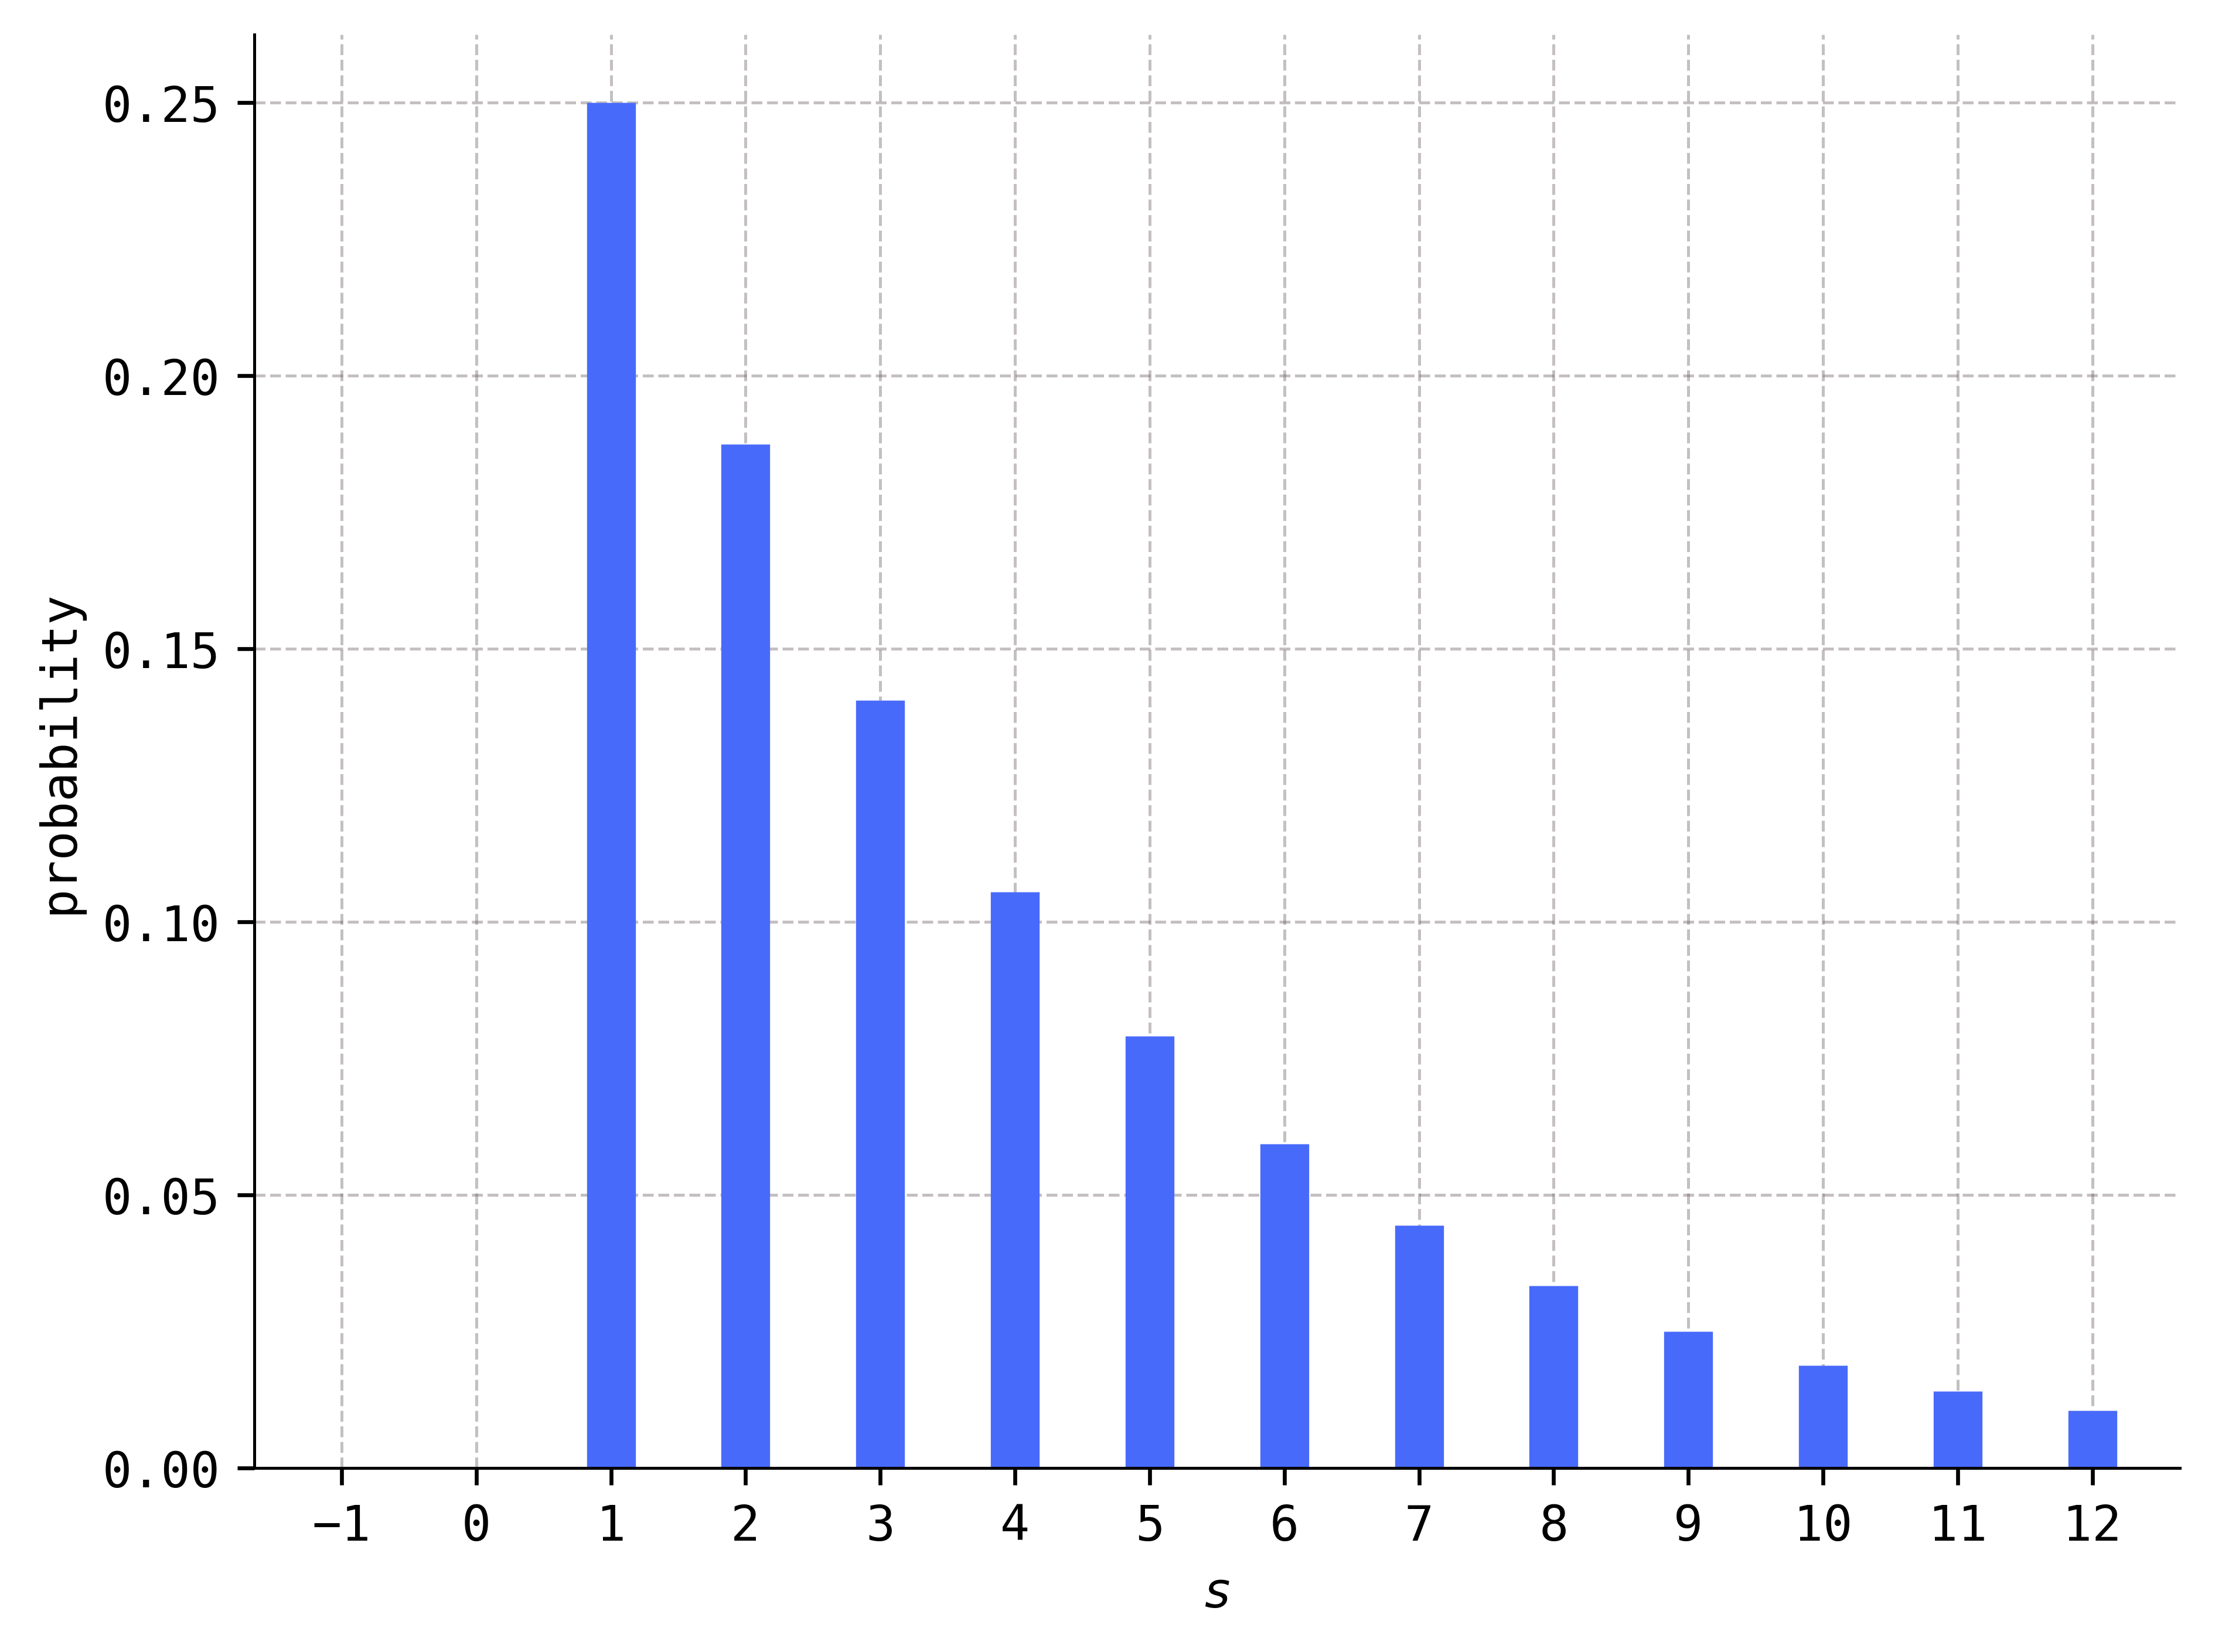

In [5]:
from scipy.stats import geom

def prob_hist(xvals, yvals, stemwidth=25, title='', xlabel='values',
              ylabel='probability', size=(-1, -1), vline='', hline='', ymax=''):
    
    _, stems, _ = plt.stem(xvals, yvals, basefmt=' ', markerfmt=' ')
    plt.setp(stems, 'linewidth', stemwidth)
    plt.gca().set_ylim(ymin=0)
    plt.gca().set_xticks(xvals)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if ymax != '':
        plt.gca().set_ylim(ymax=ymax)

    if size != (-1,-1):
        fig = plt.gcf()
        fig.set_size_inches(size)
    
    if vline != '':
        plt.axvline(x=vline, color='red', linestyle='--')

    if hline != '':
        plt.axhline(y=hline, color='red', linestyle='--')

    plt.tight_layout()

X = geom(0.25)
xvals = np.arange(-1, 13)
probs = X.pmf(xvals)

prob_hist(xvals, probs, stemwidth=10, xlabel=r'$s$')

So, since $p(1)=0.25$, you see that there is a rectangle of height $0.25$ above $s=1$. Notice that there are _no_ rectangles above $s=0$ or any negative integer $s$; or, more accurately, the rectangles above these integers have height $=0$. Make sure also to notice that none of the rectangles have heights bigger than $1$!

What does a _uniform_ probability measure on $\mathbb{R}$ look like? Very simple:

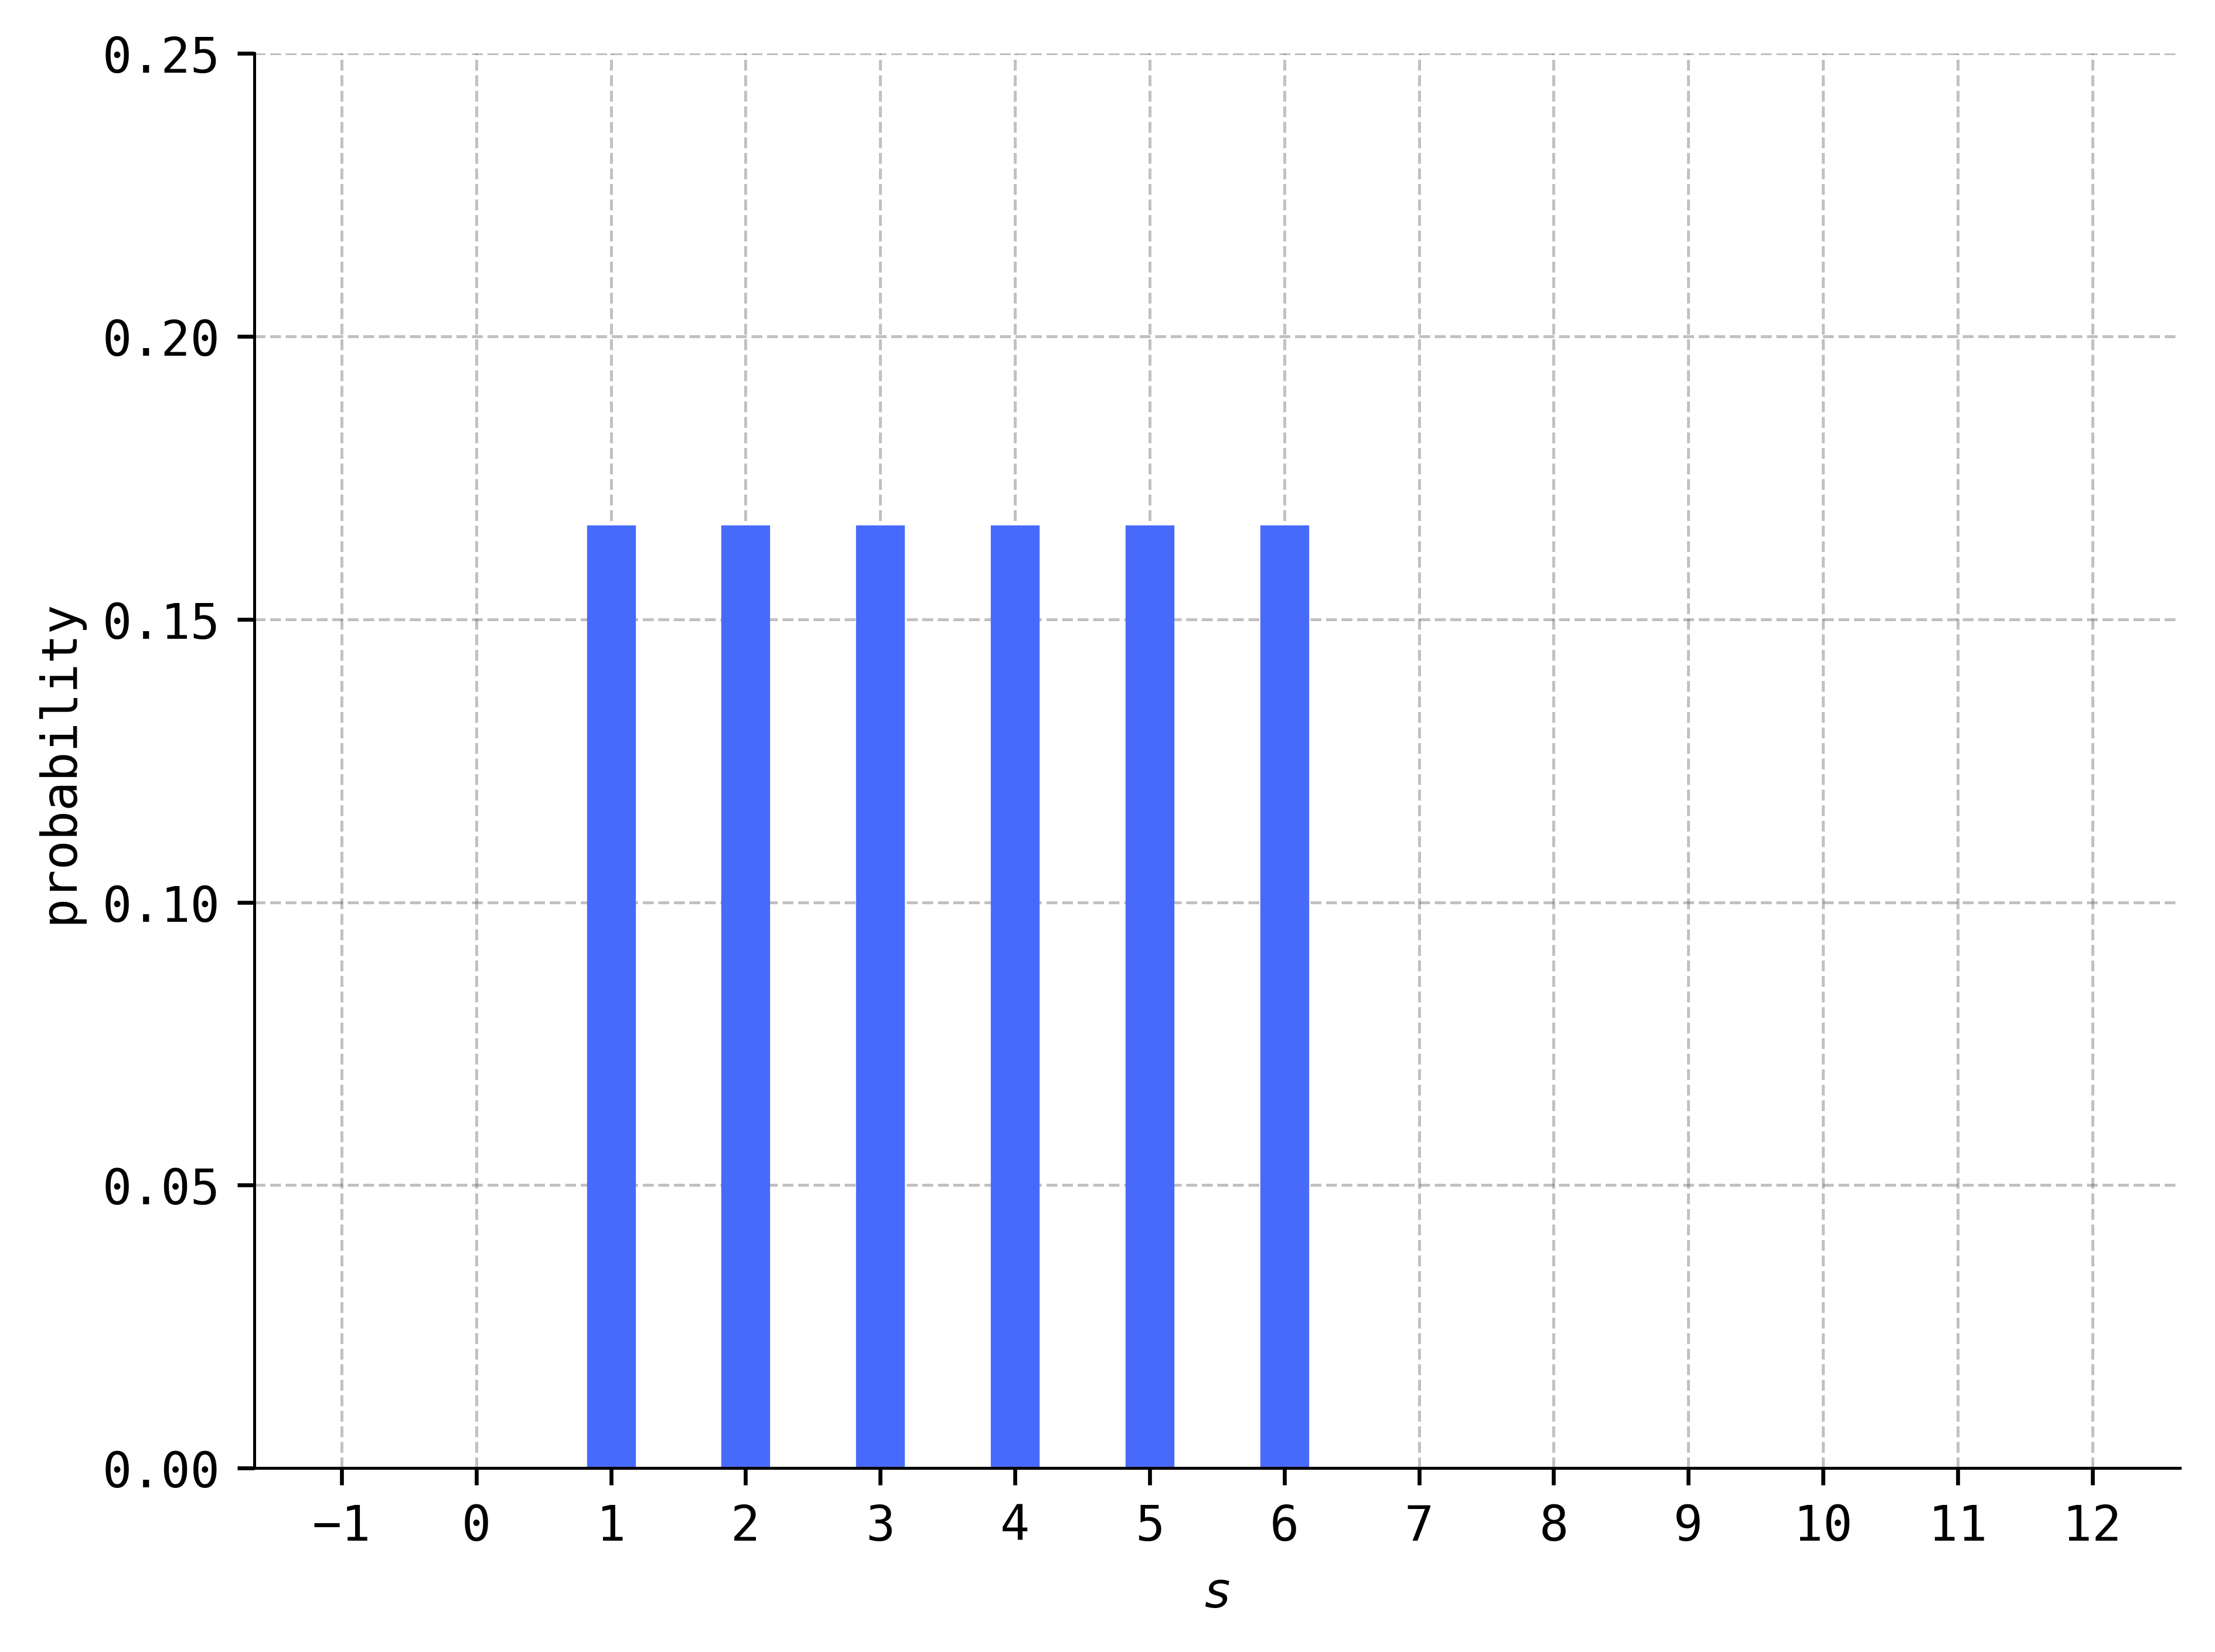

In [6]:
xvals = np.arange(-1, 13)
probs = [0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0]

prob_hist(xvals, probs, stemwidth=10, xlabel=r'$s$', ymax=0.25)

This is a histogram of the uniform probability measure on $\mathbb{R}$ with probability function $p(s)$ with

$$\text{support} = \{1,2,3,4,5,6\} \quad \text{and} \quad p(s) = \frac{1}{6}. $$

These probability histograms can really only be drawn when the sample space is $S=\mathbb{R}$. Obviously, if the sample space is something more exotic, like $\mathbb{R}^{35}$, probability histograms don't make sense.







(cont-prob)=
## Continuous probability measures

Discrete probability measures are the first important type of probability measure that we will study. But there is another type, the so-called _continuous probability measures_, that will also be of great interest to us.

To help motivate their definition, let's suppose that we have a discrete probability measure $P$ on the real line $S = \mathbb{R}$. Since $P$ is discrete, the intuition is that all the probability is "concentrated" on a discrete set of points along $\mathbb{R}$:

```{image} ../img/disccompare.svg
:width: 70%
:align: center
```
&nbsp;

Imagine now that we want to take the probability on these discrete points and "smear it out" over the entire real line:

```{image} ../img/contcompare.svg
:width: 70%
:align: center
```
&nbsp;

How might we do this?

Recall that the probability mass function $p(s)$ of a discrete probability measure must sum to $1$:

$$\sum_{s\in \mathbb{R}} p(s) =1.$$ (sum-eqn)

But if we attempt to "smear" the probability off the discrete support of $p(s)$ and onto a continuum, however, we run into the following mathematical fact:

> If the support of a function $p:\mathbb{R} \to [0,\infty)$ is **NOT** discrete, then it is **IMPOSSIBLE** for the equation {eq}`sum-eqn` to hold.


This [amazing fact](https://math.stackexchange.com/questions/20661/the-sum-of-an-uncountable-number-of-positive-numbers) is due to the fundamental difference between countably infinite sets and uncountably infinite sets. Essentially, if the support of $p(s)$ is uncountably infinite, then there are _so many_ numbers in the sum {eq}`sum-eqn` that it is impossible for them to add up to $1$ (or any other finite number), no matter how small they all are.

This fact puts us in a real pickle if we want to "smear out" the probability onto the entire real line $\mathbb{R}$. It says, basically, that we have to give up on the possibility of having a meaningful probability function $p(s)$!

It turns out the way forward is to also give up on talking about probability at individual points of $\mathbb{R}$ (these probabilities will all end up being $0$), and to only talk about probabilities _over intervals_. Accordingly, a _probability density function_, denoted $f(s)$, replaces the doomed probability mass function $p(s)$. Even though everything is unitless, you should imagine that $f(s)$ really is an honest density function:

$$\text{units of $f(s)$} = \frac{\text{probability}}{\text{length}}.$$

Then, the probability of an interval $[a,b]$ should be nothing but the length of the interval, $b-a$, times the density function. But there's a problem with this simple description, since the value of the density function $f(s)$ might vary as $s$ passes over $[a,b]$. To account for this variability, we use one of the lessons that we've internalized from calculus and compute probabilities by _integration_ against the density:

$$P\big( [a,b] \big) = \int_a^b f(s) \ \text{d} s.$$

Notice, in particular, that

$$P(\{a\}) = P\big([a,a]  \big) = \int_a^a f(s) \ \text{d} s = 0,$$

which shows---as I mentioned above---that the probability of an individual sample point is $0$.

This discussion leads us to:

```{prf:definition}
Let $P$ be a probability measure on $\mathbb{R}$. We shall say $P$ is *continuous* if there is a function $f:\mathbb{R} \to \mathbb{R}$ such that

$$P\big( A \big) = \int_A f(s) \ \text{d} s $$ (cont-eqn)

for all events $A\subset \mathbb{R}$. In this case, the function $f(s)$ is called the _probability density function_ (PDF) of the probability measure $P$, and $\mathbb{R}$ is called a _continuous probability space_ (when equipped with $P$).
```

Before we get to examples, I must make several _very_ important remarks and observations. Please take time to carefully read and understand them all!

If you review the definition of a discrete probability measure, then you'll notice that this new definition is very similar in spirit: Indeed, whereas a _discrete probability measure_ is defined in terms of the existence of a _probability mass function_ $p(s)$, a _continuous probability measure_ is defined in terms of the existence of a _probability density function_ $f(s)$. Really, the big differences between the two definitions are:

* Continuous probability measures can only live on $\mathbb{R}$.

* The sum $\sum_{s\in A}$ in a discrete probability measure is replaced with an integral $\int_A$ in a continuous probability measure.

In contrast to discrete probability measures, notice that I did _not_ mention which subsets of $\mathbb{R}$ are allowed to be _events_. This would lead to a _very_ technical discussion that is not at all enlightening at this stage. All you need to know is that any "reasonable" subset $A$ of $\mathbb{R}$ is allowed to be an event.

In order for the integral {eq}`cont-eqn` to even _exist_, we need to assume that the density function $f(s)$ is integrable (and have a few other properties, listed below). However, the density function $f(s)$ _itself_ does _not_ need to be continuous. When we say that a probability measure $P$ is continuous, we are referring to $P$ being continuous, not its density function $f(s)$.

Remember that a probability space consists of a sample space _and_ a choice of probability measure. Thus, the real line $\mathbb{R}$ can be a continuous probability space in multiple ways, simply by equipping it with different probability measures.

Finally, let me note that the probability mass function $p(s)$ of a discrete probability measure and the probability density function $f(s)$ of a continuous probability measure are very similar in some ways, but yet very different in others. For example:

* Discrete probability measures are computed by summing "against" the probability mass function $p(s)$. Likewise, continuous probability measures are computed by integrating "against" the probability density function $f(s)$.

* But as I mentioned at the beginning of this section, whereas the values of $p(s)$ are actual probabilities, the values of $f(s)$ are _not_ probabilities. For example, if I stick $s=2$ into the probability density function and obtain the number $0.5= f(2)$, this $0.5$ is _not_(!) the probability of the simple event $\{2\}$. (In fact, we saw above that the probability of any simple event in a continuous probability space is $0$.) Instead, the value $0.5$ is the probability _density_ at $s=2$.

In fact, it is possible for probability density functions to take on values bigger than $1$, which are illegal values for probabilities.

```{admonition} Problem Prompt
Do problems 12 and 13 on the worksheet.
```

It turns out that probability density functions have similar properties compared to probability mass functions:

```{prf:theorem} Properties of Probability Density Functions (univariate version)

Let $f(s)$ be the probability density function of a continuous probability measure $P$ on $\mathbb{R}$. Then:

1. $f(s) \geq 0 $ for all $s\in \mathbb{R}$, and

2. $\int_{\mathbb{R}} f(s) \ \text{d} s =1$.
```

Conversely, any function $f$ with these two properties defines a unique continuous probability measure:

```{prf:theorem} Continuous Probability Construction Lemma (univariate version)

Let $f:\mathbb{R} \to \mathbb{R}$ be a function such that

1. $f(s)\geq 0$ for all $s\in \mathbb{R}$, and

2. $\int_{\mathbb{R}} f(s) \ \text{d} s =1$.

Then there is a unique continuous probability measure $P$ on $\mathbb{R}$ such that

$$P\big( A \big) = \int_A f(s) \ \text{d} s$$

for all events $A \subseteq \mathbb{R}$.
```

We will not prove either of these previous two results---but perhaps you should try to prove them on your own!

```{admonition} Problem Prompt
Do problem 14 on the worksheet.
```







## Probability density graphs (univariate versions)

When we discussed _discrete_ probability measures on the sample space $\mathbb{R}$, we saw that probability histograms provide convenient ways to visualize probability. For _continuous_ probability measures, however, probability histograms no longer make sense (because the probability of every simple event is $0$). Instead, we use _probability density graphs_.

As an example, let's take the continuous probability measure on $\mathbb{R}$ with density

$$f(s) = \begin{cases} \frac{2}{9}s & : 0\leq s \leq 3, \\ 0 & : \text{otherwise.}\end{cases}$$ 

This was one of the densities that we studied in the worksheet problems. The associated _probability density graph_ is then nothing but the graph of $f(s)$:

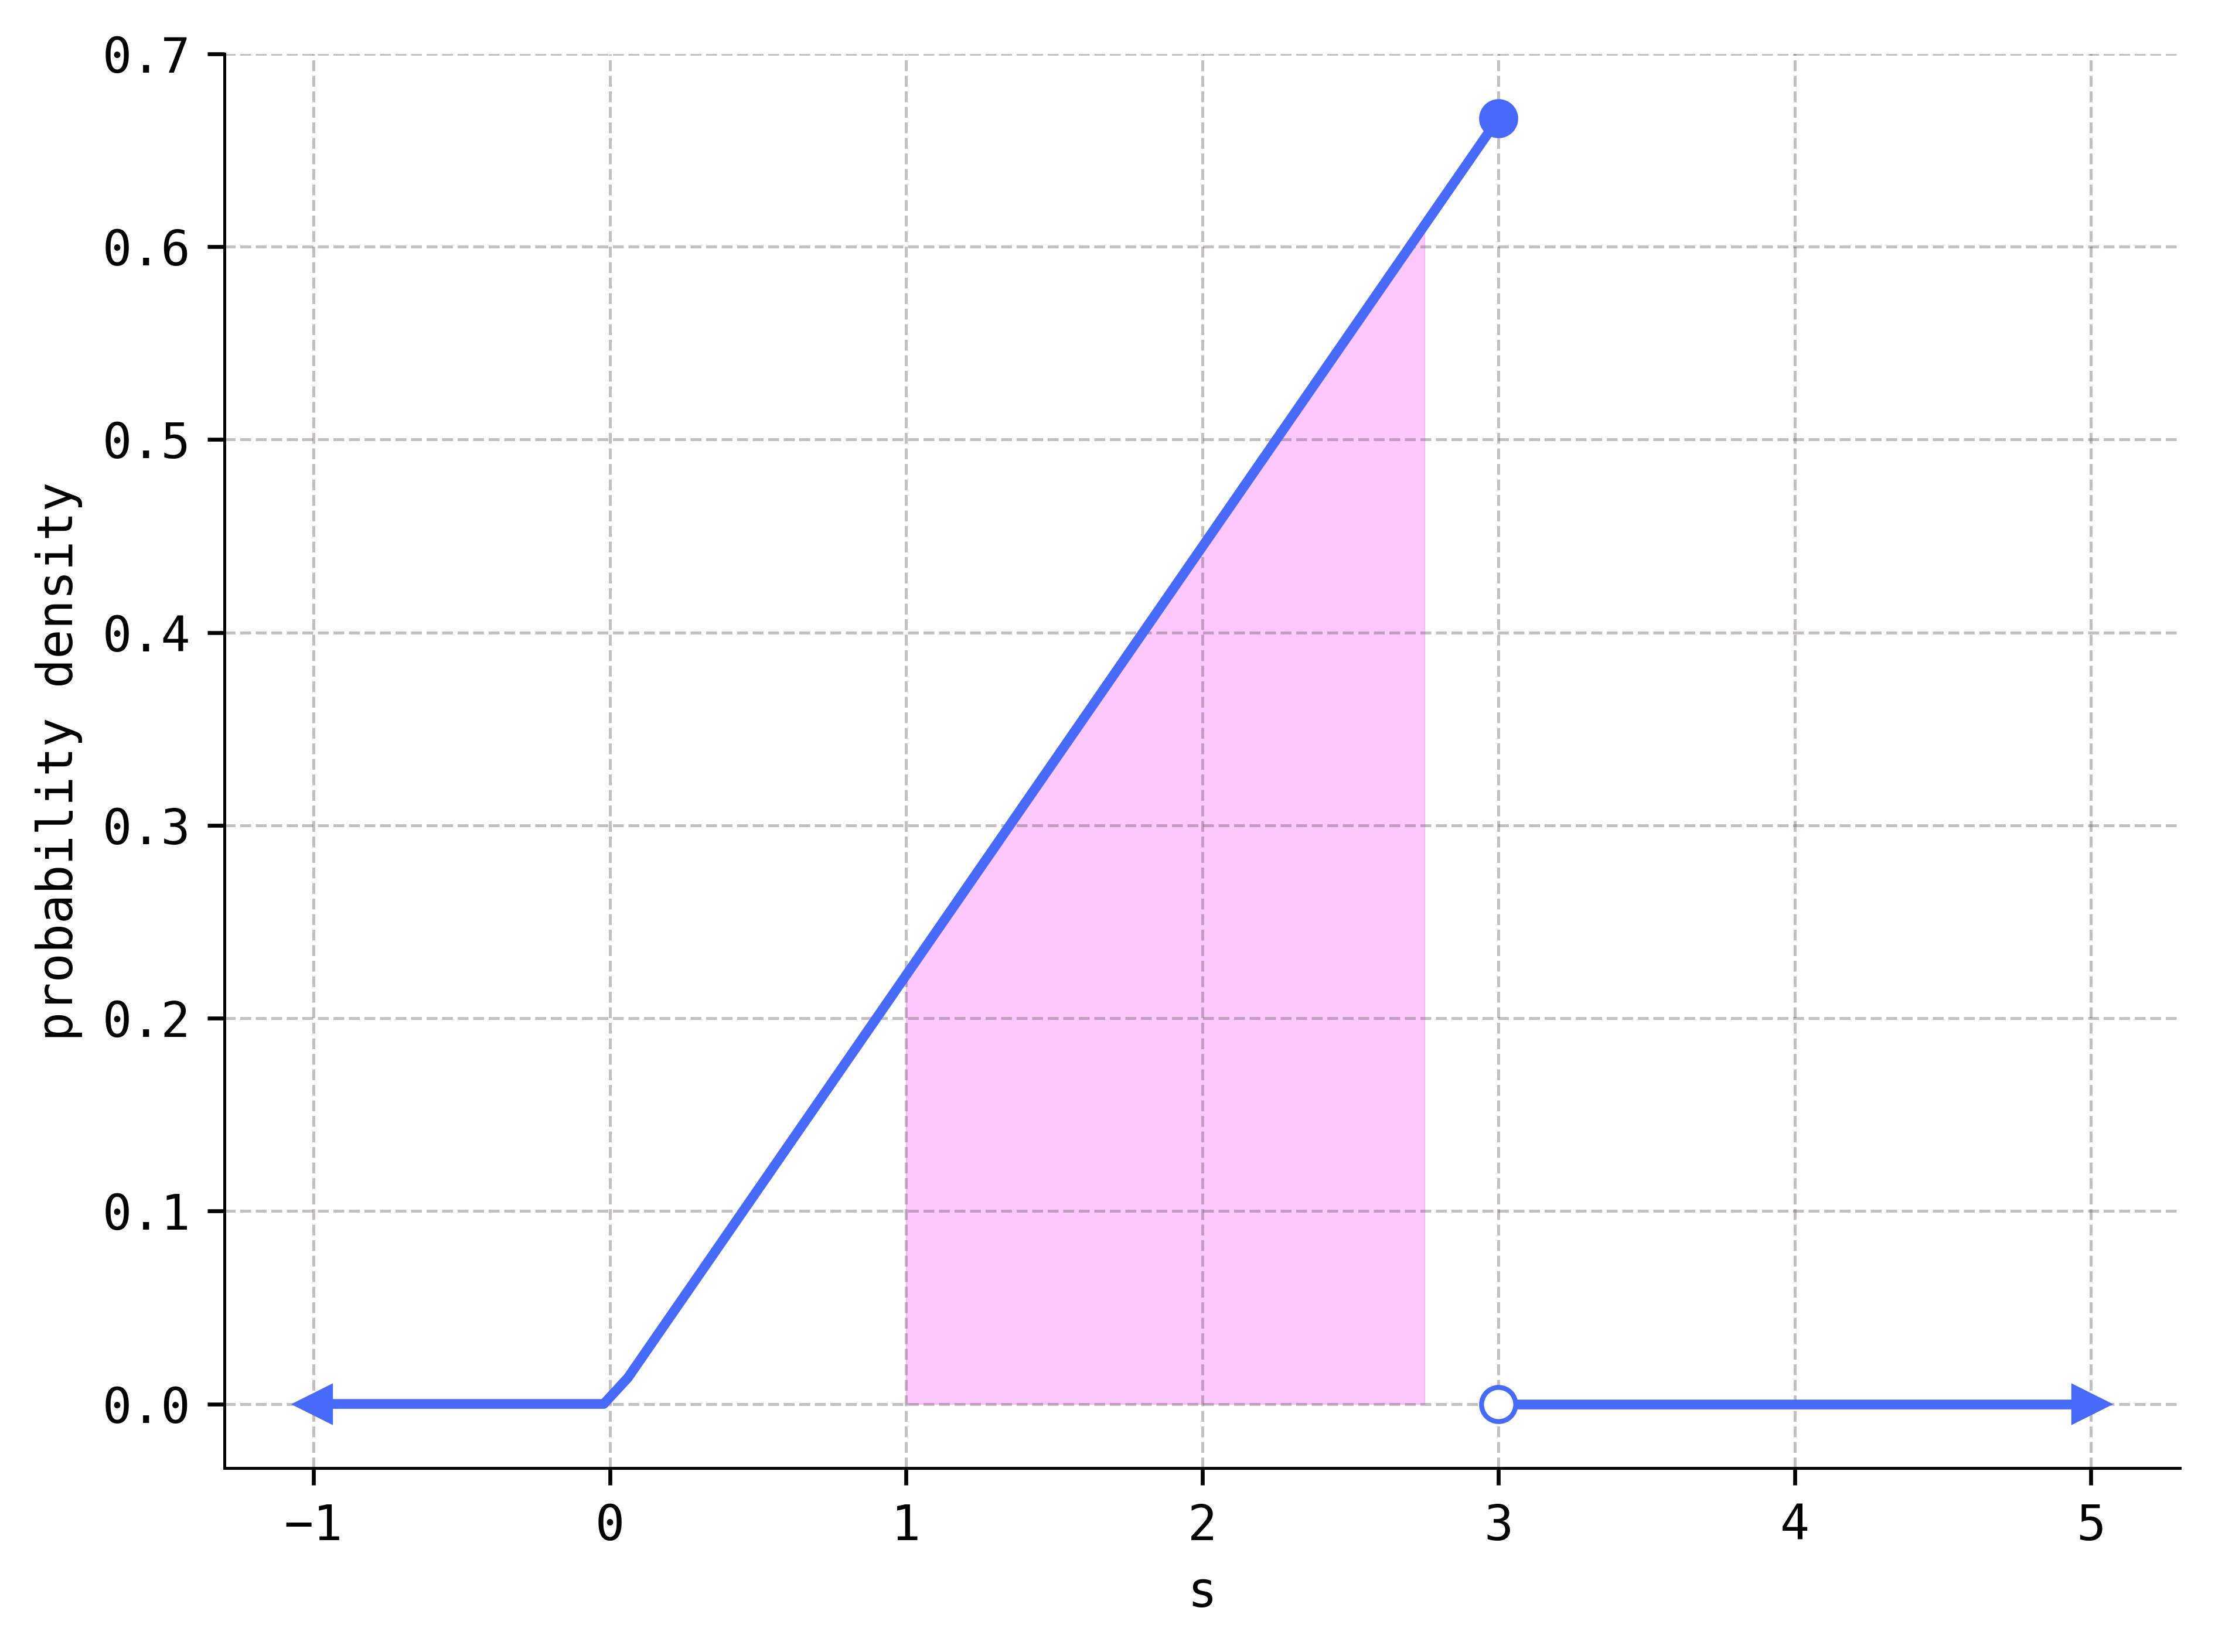

In [7]:
x_left = np.linspace(-1, 3, 50)
x_right = np.linspace(3.01, 5, 50)
x_fill = np.linspace(1, 2.75)

def f(s):
    if (0 <= s <= 3):
        return (2/9) * s
    else:
        return 0.0

f_vec = np.vectorize(f)    
y_left = f_vec(x_left)
y_right = f_vec(x_right)
y_fill = f_vec(x_fill)

plt.plot(x_left, y_left)
plt.plot(x_right, y_right, color='#486AFB')
plt.fill_between(x_fill, y_fill, color='#FD46FC', alpha=0.3)

plt.plot(3, (2/9) * 3, marker='o', color='#486AFB', markersize=7)
plt.plot(-1, 0, marker='<', color='#486AFB', markersize=7)
plt.plot(5, 0, marker='>', color='#486AFB', markersize=7)
plt.plot(3, 0, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')

plt.xlabel('s')
plt.ylabel('probability density')
plt.tight_layout()

Because $f(s)$ outputs probability _densities_, and not probabilities themselves, the probability of an event $A\subset \mathbb{R}$ is the area under the density curve and above $A$. For example, the shaded area in the graph above is the following probability:

$$P\big((1,2.75) \big) = \int_1^{2.75} f(s) \ \text{d} s \approx 0.73.$$

It is very important to remember:

```{warning}
The heights of the density curve are **not** probabilities!
```

I recommend repeating this over and over in your head, like a mantra.

As another example, consider the density:

$$f(s) = \begin{cases} \displaystyle\frac{1}{s^2} & : s\geq 1, \\ 0 & : \text{otherwise.}\end{cases}$$

This density is also from the worksheet problems. The probability density curve is:

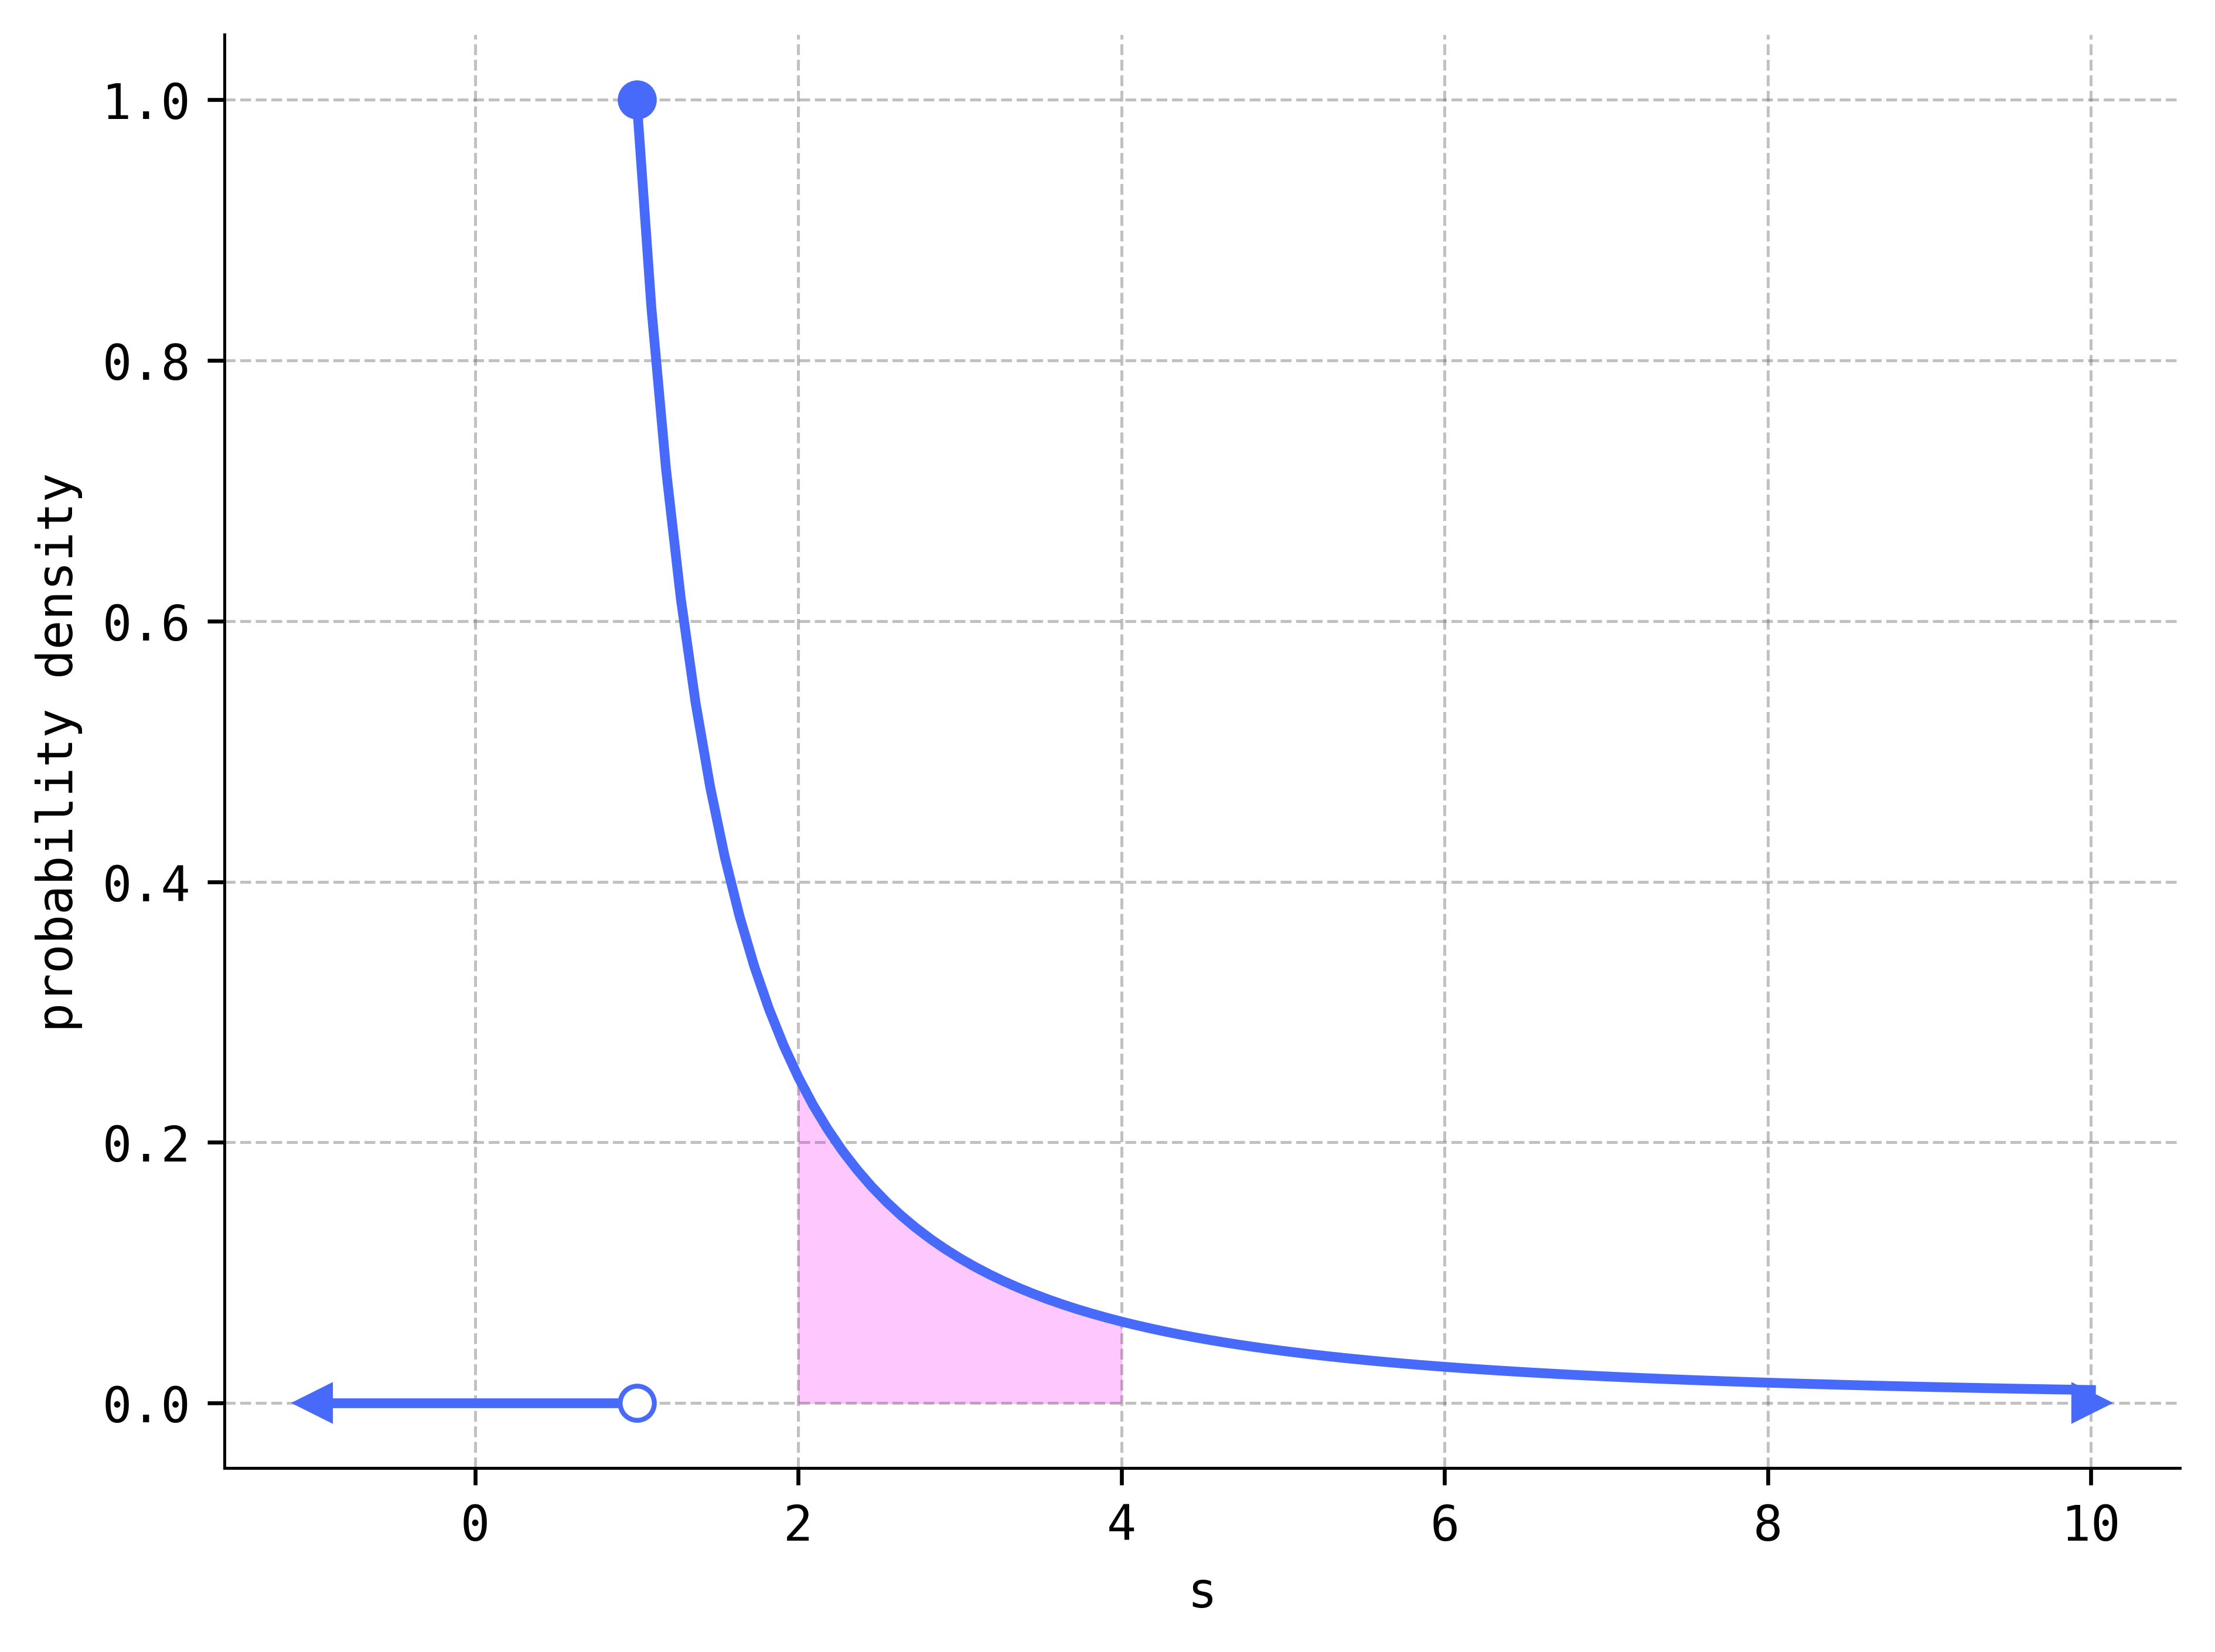

In [8]:
x_left = np.linspace(-1, 0.99, 50)
x_right = np.linspace(1, 10, 100)
x_fill = np.linspace(2, 4)

def f(s):
    if (s >= 1):
        return 1 / (s ** 2)
    else:
        return 0.0

f_vec = np.vectorize(f)    
y_left = f_vec(x_left)
y_right = f_vec(x_right)
y_fill = f_vec(x_fill)

plt.plot(x_left, y_left)
plt.plot(x_right, y_right, color='#486AFB')
plt.fill_between(x_fill, y_fill, color='#FD46FC', alpha=0.3)

plt.plot(-1, 0, marker='<', color='#486AFB', markersize=7)
plt.plot(10, 0, marker='>', color='#486AFB', markersize=7)
plt.plot(1, 1, marker='o', color='#486AFB', markersize=7)
plt.plot(1, 0, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')

plt.xlabel('s')
plt.ylabel('probability density')
plt.tight_layout()

The shaded area represents the following probability:

$$P\big( [2,4] \big) = \int_2^4 f(s) \ \text{d} s = \frac{1}{4}.$$











(dist-quant)=
## Distribution and quantile functions

We have seen that discrete probability measures have their probability mass functions, while continuous probability measures (on $\mathbb{R}$) have their probability density functions. In this section, we study a type of function called a _distribution function_ that may be associated with _any_ probability measure on $\mathbb{R}$, whether the measure is discrete, continuous, or neither.

````{prf:definition}

A _distribution function_ of a probability measure $P$ on $\mathbb{R}$ is the function $F:\mathbb{R} \to \mathbb{R}$ such that

$$F(s) = P \big( (-\infty,s]\big).$$

In particular:

1. If $P$ is discrete with probability mass function $p(s)$, then

    $$ F(s) = \sum_{t \leq s} p(t), $$ (yuy-eqn)

    where the sum ranges over all $t\in \mathbb{R}$ with $t \leq s$.

2. If $P$ is continuous with probability density function $f(s)$, then
    
    $$F(s) = \int_{-\infty}^s f(t) \ \text{d} t.$$

Distribution functions are also frequently called _cumulative distribution functions_ (CDFs).
````

Luckily, since distribution functions are real-valued functions on $\mathbb{R}$, we can draw their graphs to help understand them. Let's start with a simple example of the discrete probability measure $P$ on described by the following probability histogram:

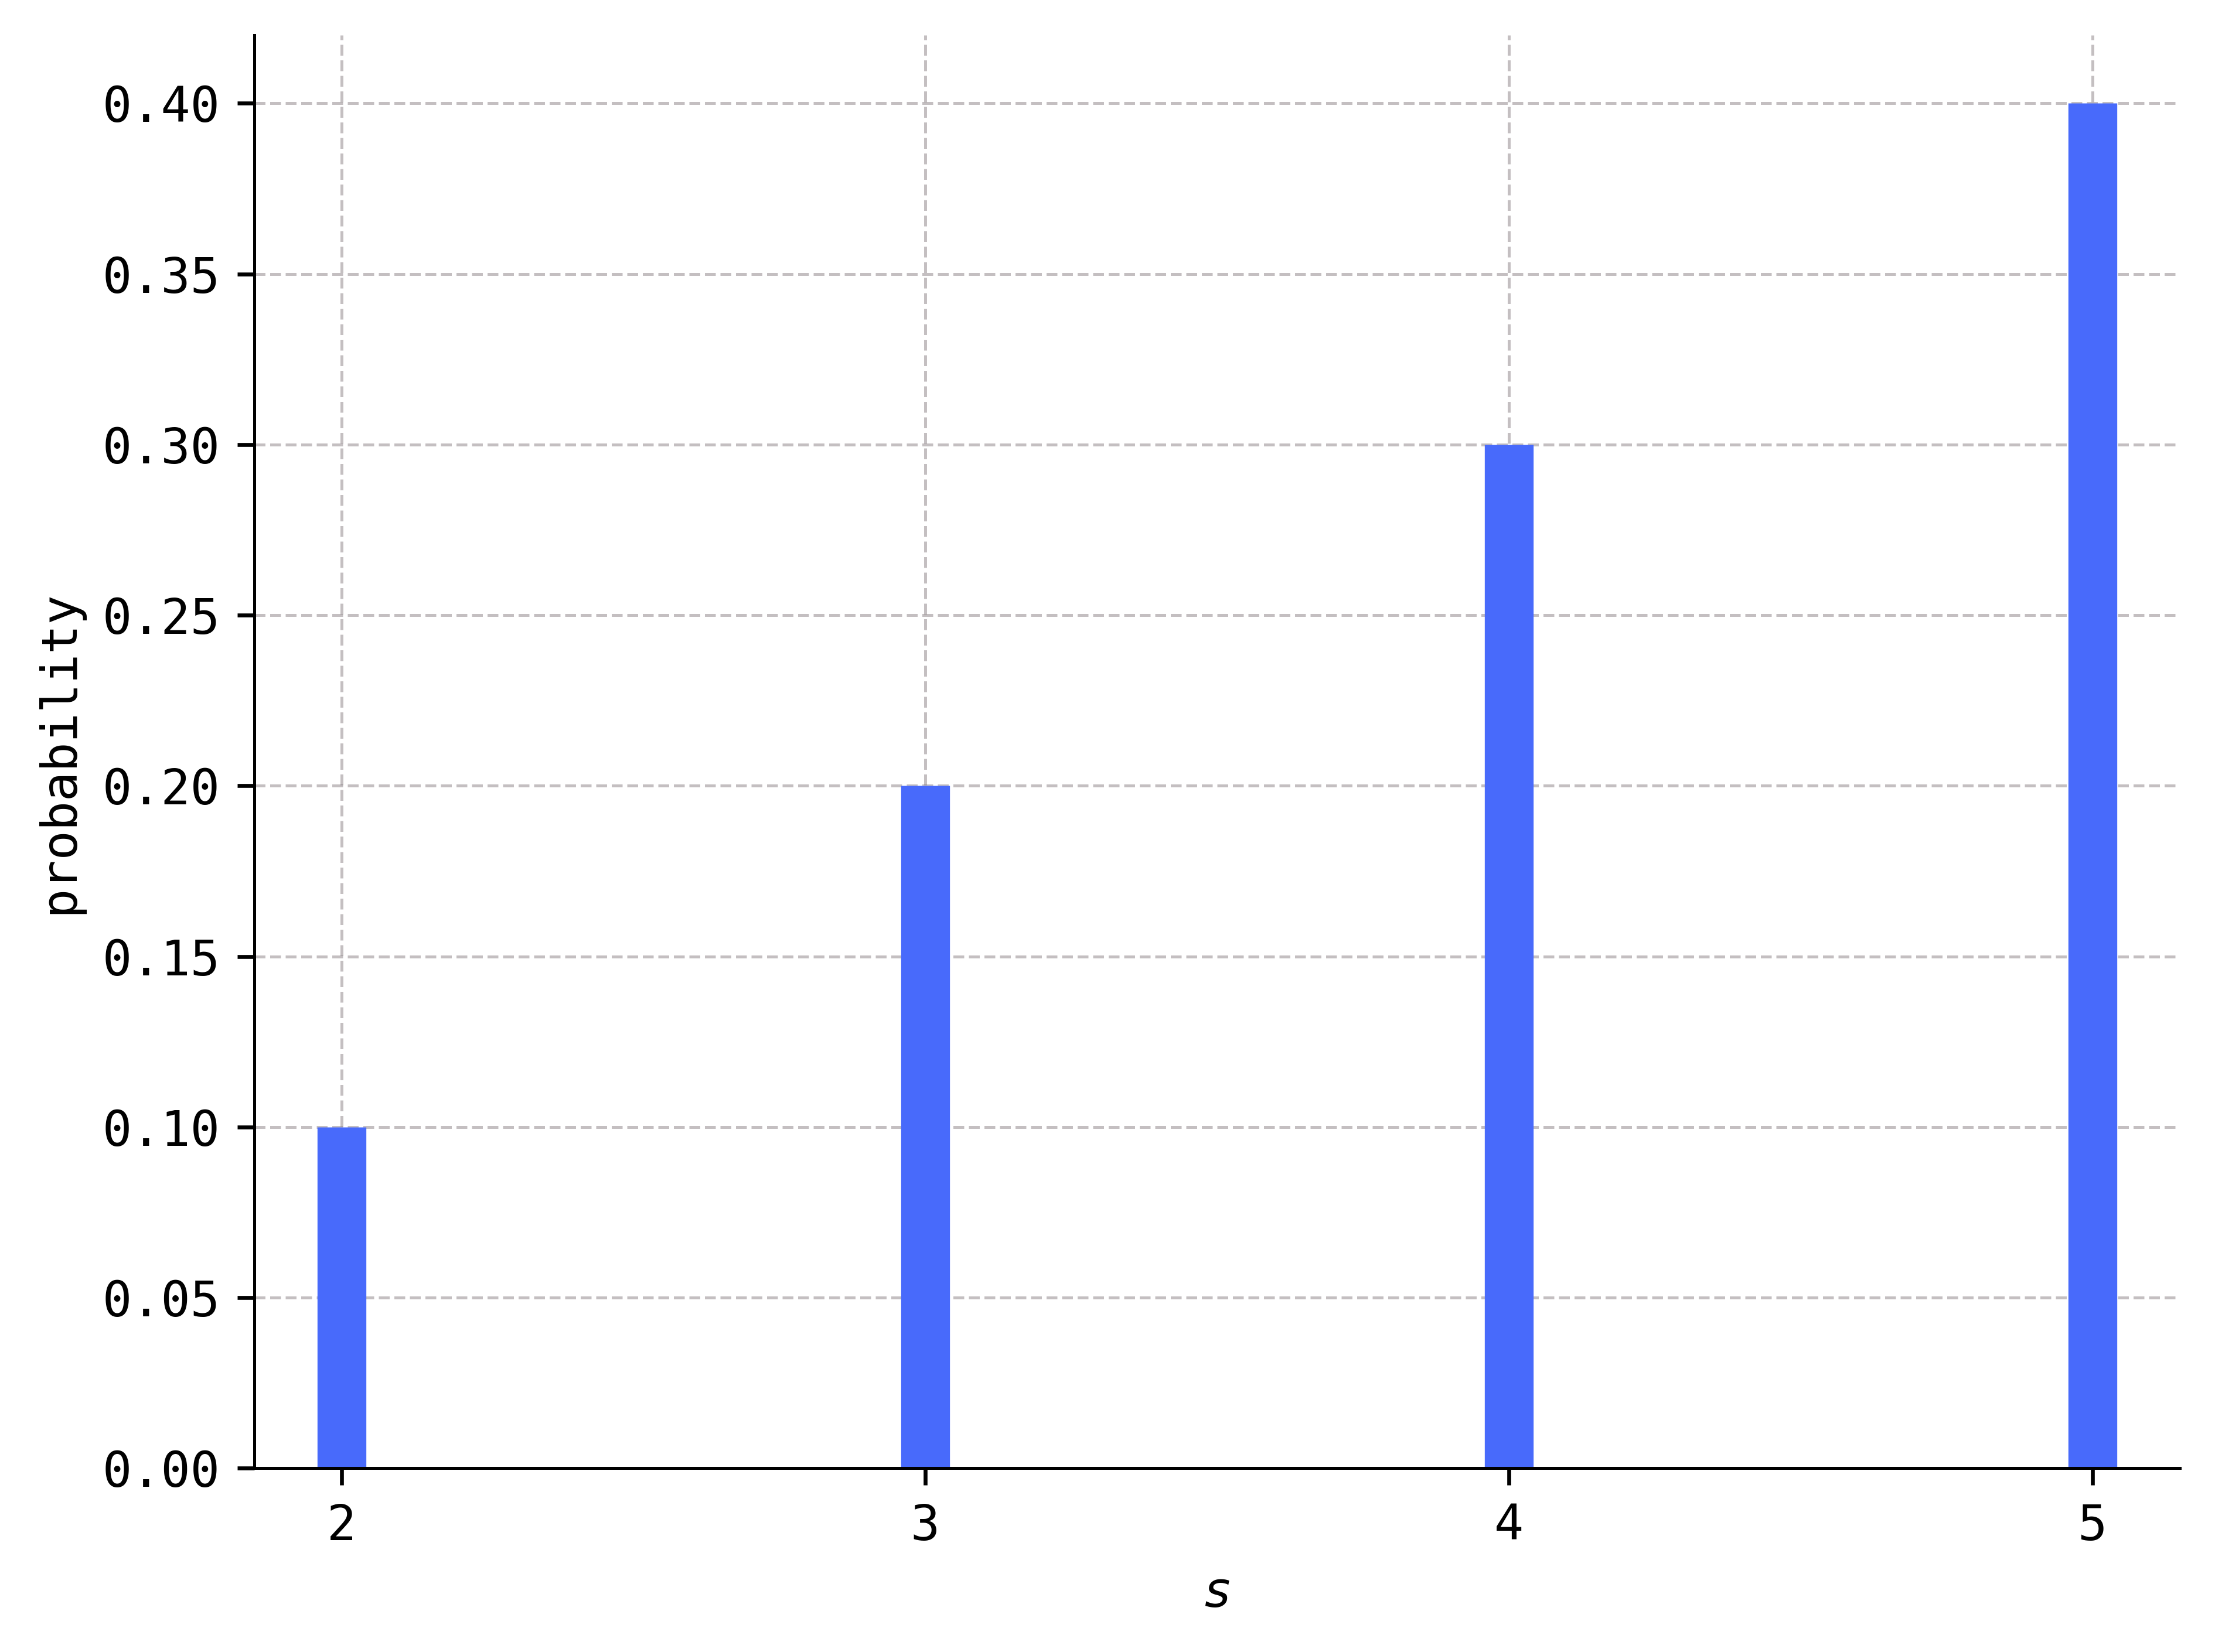

In [9]:
sums = np.arange(2, 6)
probs = np.array([1/10, 2/10, 3/10, 4/10])
prob_hist(sums, probs, stemwidth=10, xlabel=r'$s$')

Now, if $s$ is a number that is less than $2$, then $F(s)=0$, simply because there are no $t\in \mathbb{R}$ less than $2$ with $p(t)\neq 0$; thus, from {eq}`yuy-eqn`, we must have $F(s)=0$. However, we _do_ have

$$F(2) = \sum_{-\infty < t \leq 2} p(t) = p(2) = 0.1.$$

Likewise, we have $F(s) = 0.1$ for all $s$ with $2\leq s <3$, because there are no $t\in \mathbb{R}$ with $2<t<3$ and $p(t)\neq 0$. But, as soon as $s=3$, we pick up the term $p(3) = 0.2$ in the sum {eq}`yuy-eqn`, and we get

$$F(3) = \sum_{-\infty < t \leq 3} p(t) = p(2) + p(3) = 0.3.$$

Do you see how this game is played? If you continue on with this line of reasoning, you will eventually cook up the following expression for the distribution function:

$$F(s) = \begin{cases} 0 & : s < 2, \\ 0.1 & : 2 \leq s < 3, \\ 0.3 & : 3\leq s < 4, \\ 0.6 & : 4 \leq s < 5, \\ 1 & : 5 \leq s. \end{cases}$$

If we graph $F(s)$, we get a 'step function':

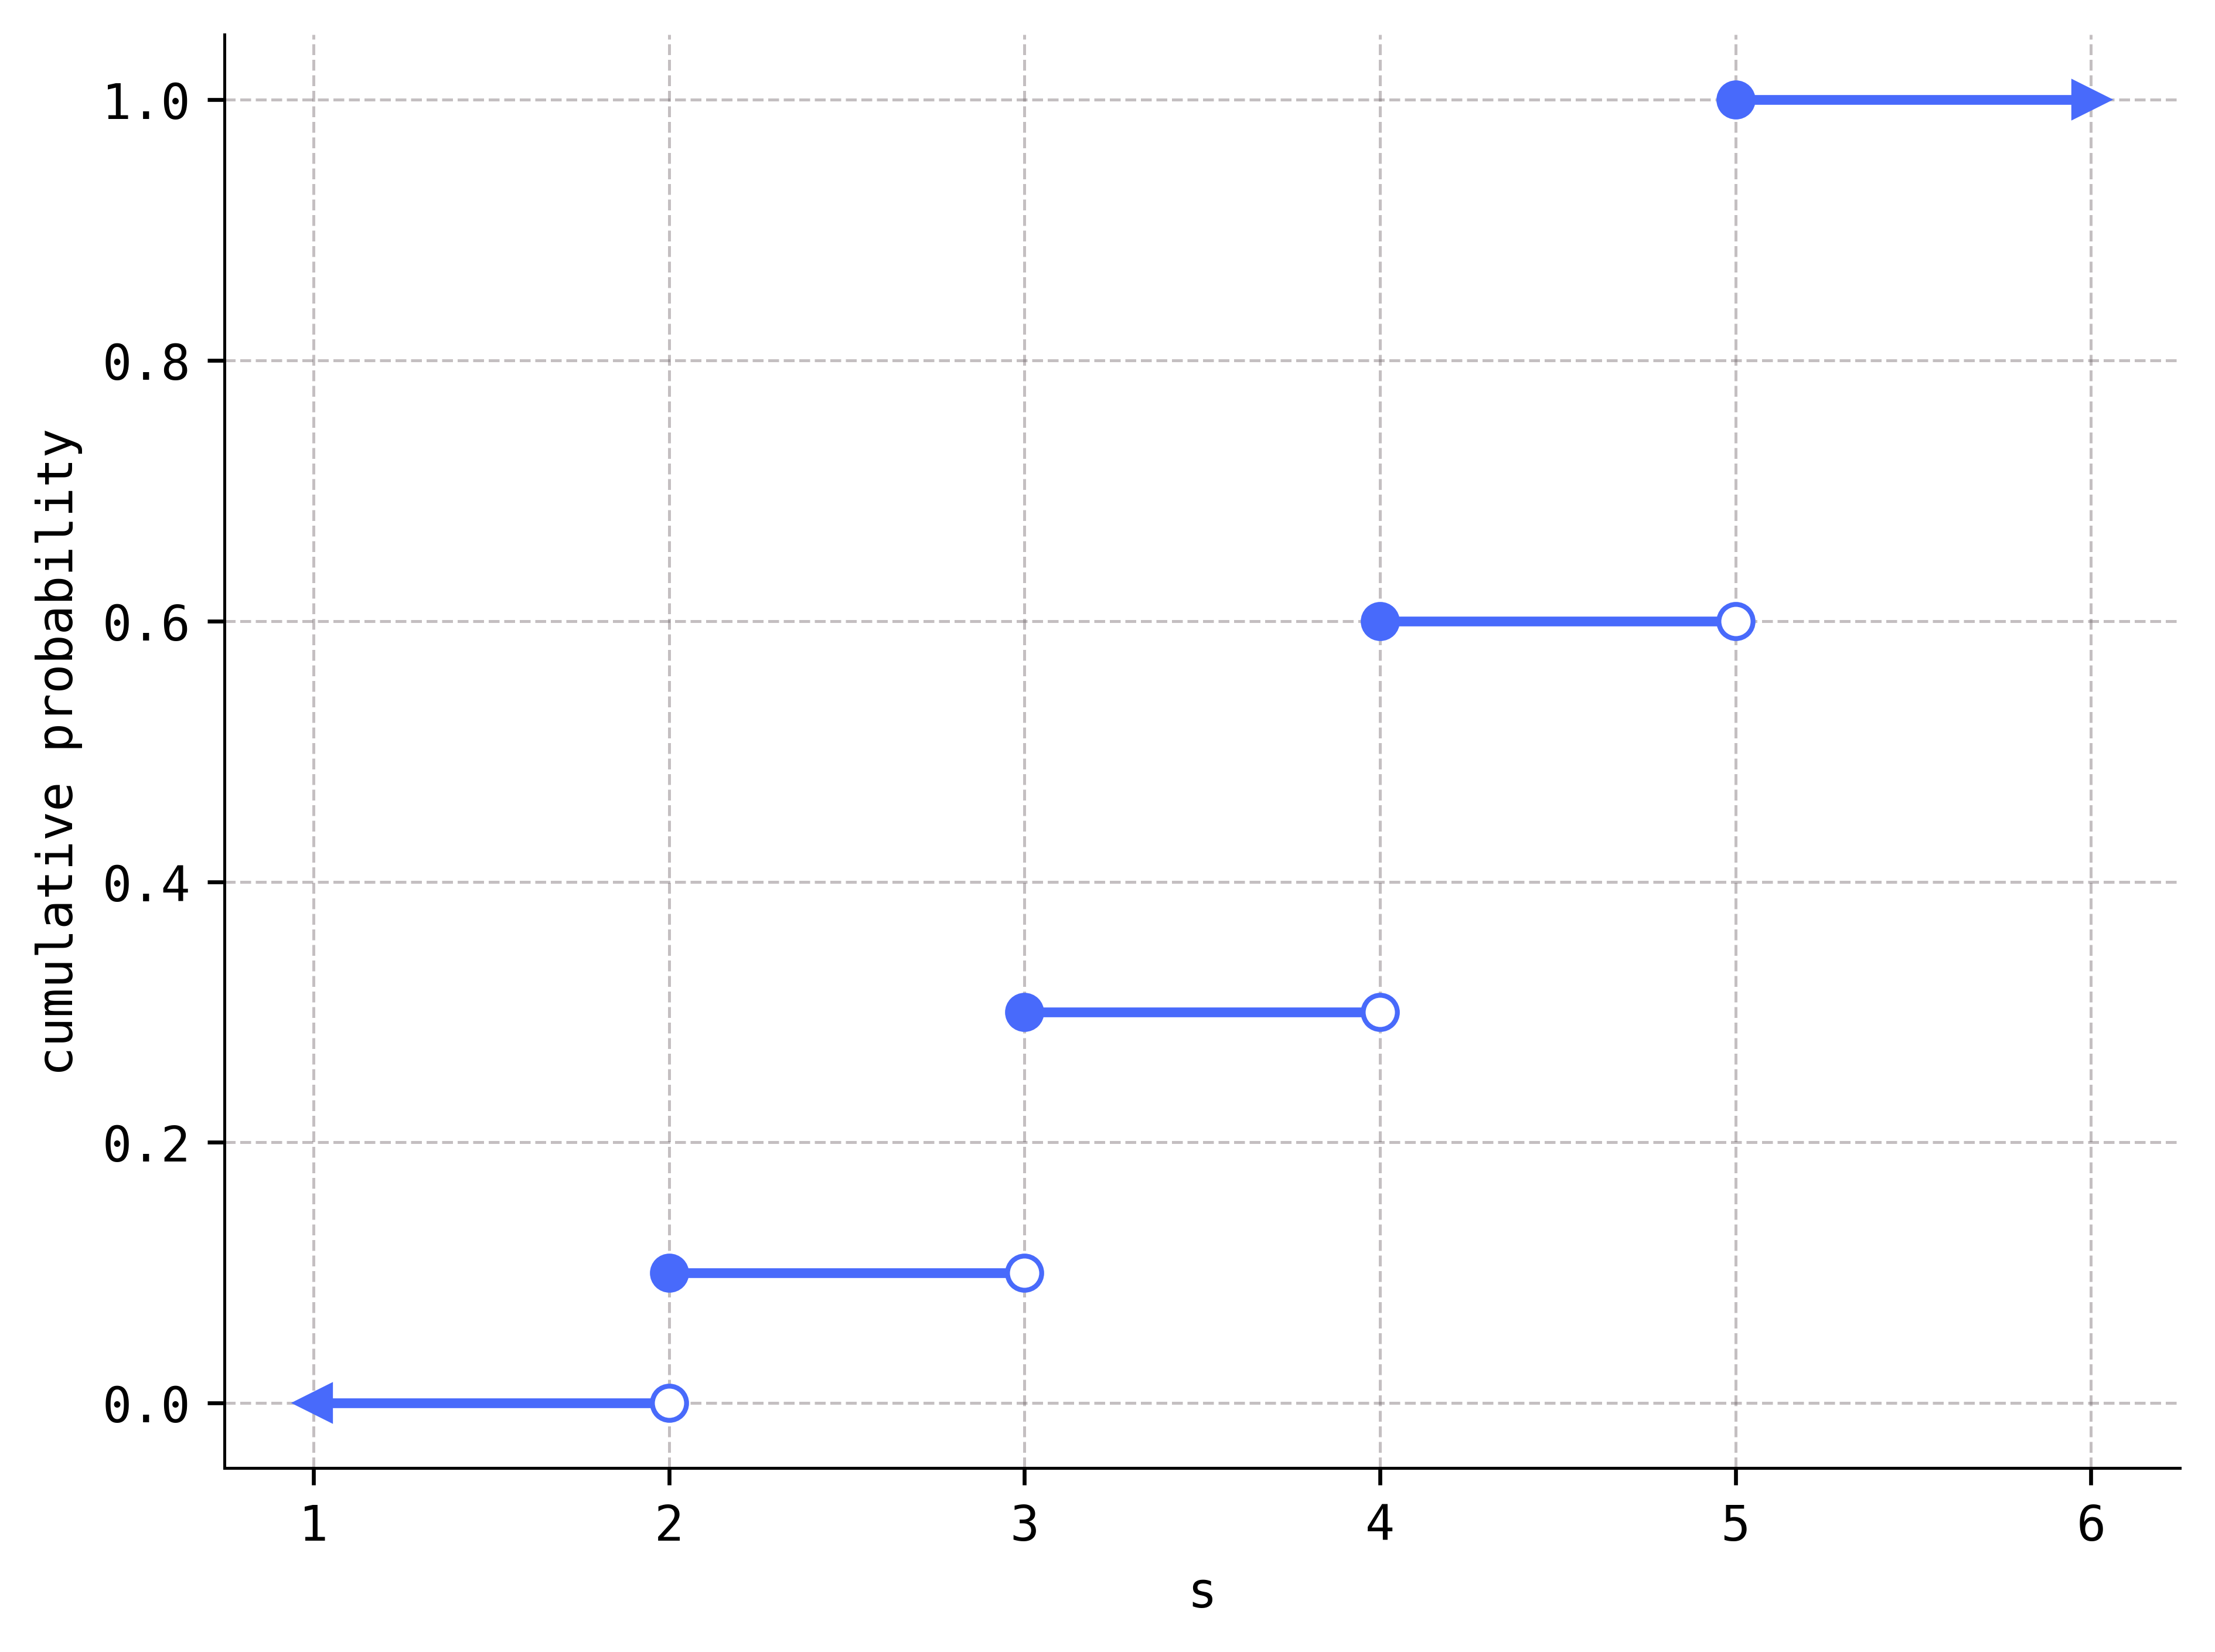

In [10]:
x = []
for i in range(5):
    x.append(np.linspace(i+1, i+2, endpoint=False))

def f(y):
    if (y < 2):
        return 0.0
    elif (2 <= y < 3):
        return 0.1
    elif (3 <= y < 4):
        return 0.3
    elif (4 <= y < 5):
        return 0.6
    else:
        return 1.0

f_vec = np.vectorize(f)

y = []
for i in range(5):
    y.append(f_vec(x[i]))

for i in range(5):
    plt.plot(x[i], y[i], color='#486AFB')

plt.plot(2, 0, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')
plt.plot(2, 0.1, marker='o', color='#486AFB', markersize=7)
plt.plot(3, 0.1, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')
plt.plot(3, 0.3, marker='o', color='#486AFB', markersize=7)
plt.plot(4, 0.3, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')
plt.plot(4, 0.6, marker='o', color='#486AFB', markersize=7)
plt.plot(5, 0.6, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')
plt.plot(5, 1, marker='o', color='#486AFB', markersize=7)

plt.plot(1, 0, marker='<', color='#486AFB', markersize=7)
plt.plot(6, 1, marker='>', color='#486AFB', markersize=7)

plt.xlabel('s')
plt.ylabel('cumulative probability')
plt.tight_layout()

Do you see now why $F(s)$ is sometimes called a _cumulative_ distribution function? According to the dictionary definition, the word 'cumulative' means 'increasing or increased in quantity, degree, or force by successive additions.' It is the last part---_successive additions_---which is the reason why $F(s)$ is called a cumulative distribution function.

Step functions are _characteristic_ of the distribution functions of discrete probability measures---I will state this formally below. On the other hand, suppose now we turn toward a continuous probability measure $P$, like the one we studied in the previous section with density

$$f(s) = \begin{cases} \displaystyle \frac{1}{s^2} & : s\geq 1, \\ 0 & : \text{otherwise}.\end{cases}$$

For a reminder, here is the graph of $f(s)$:

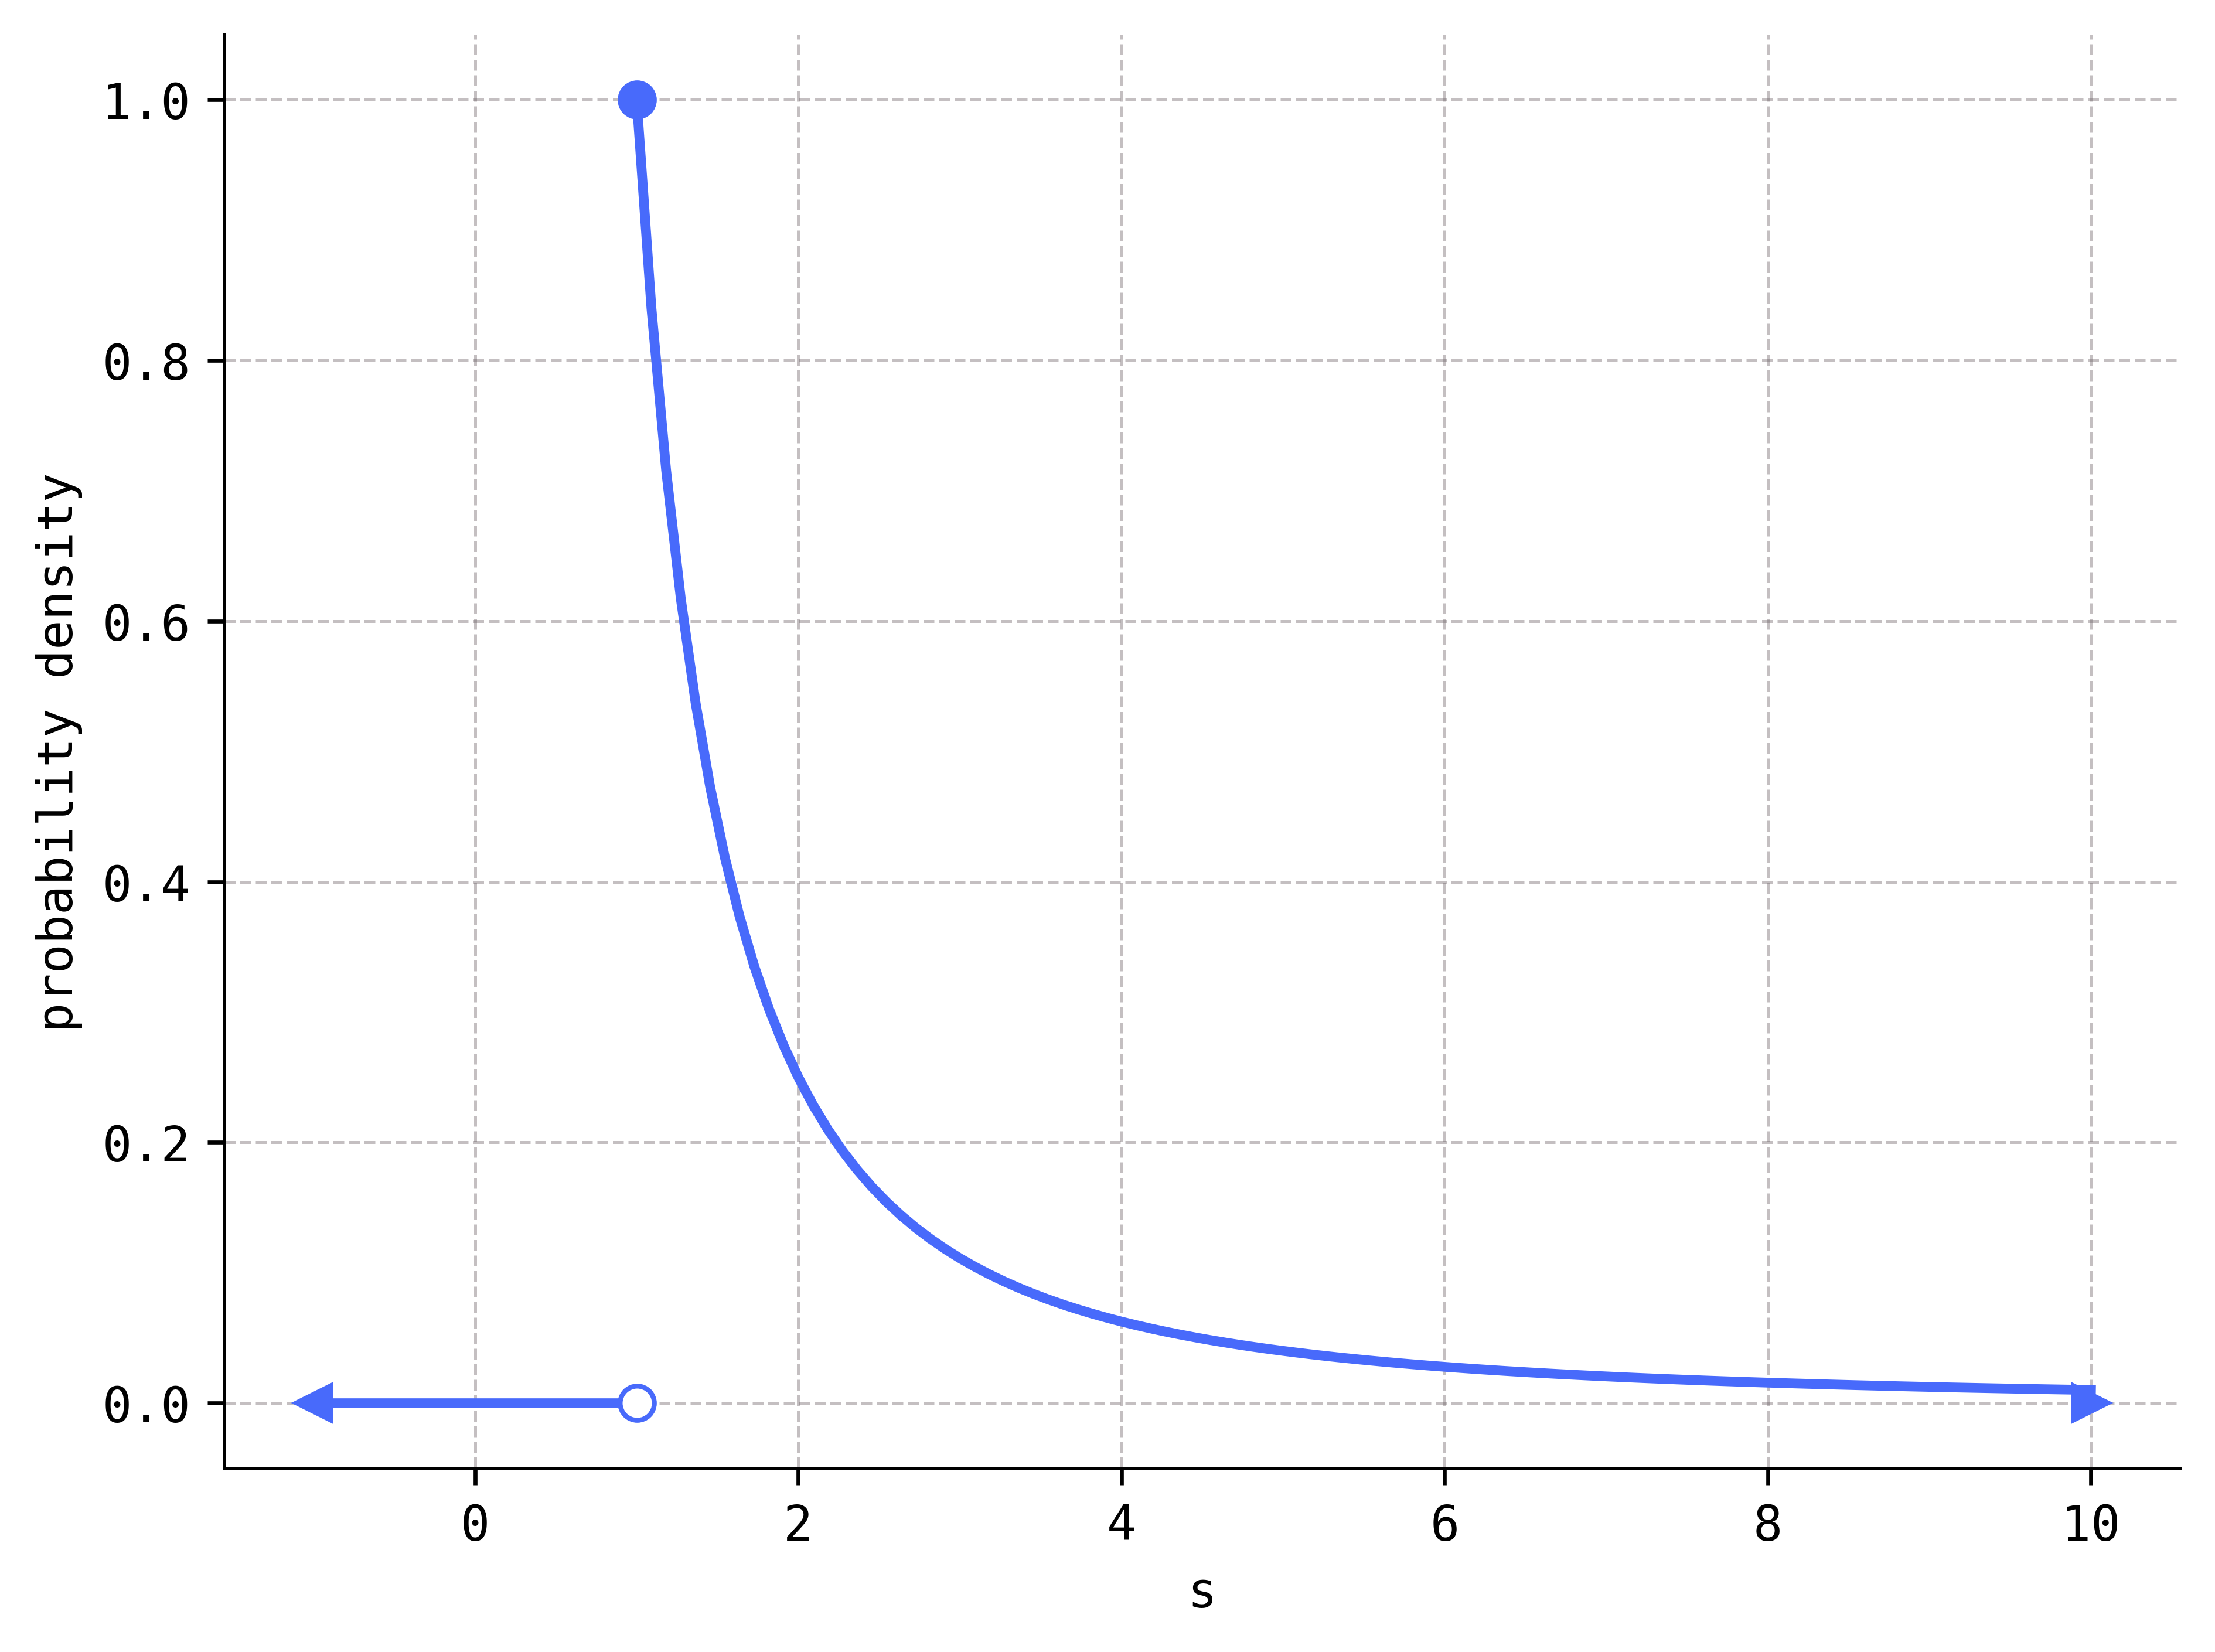

In [11]:
x_left = np.linspace(-1, 0.99, 50)
x_right = np.linspace(1, 10, 100)

def f(s):
    if (s >= 1):
        return 1 / (s ** 2)
    else:
        return 0.0

f_vec = np.vectorize(f)    
y_left = f_vec(x_left)
y_right = f_vec(x_right)

plt.plot(x_left, y_left)
plt.plot(x_right, y_right, color='#486AFB')

plt.plot(-1, 0, marker='<', color='#486AFB', markersize=7)
plt.plot(10, 0, marker='>', color='#486AFB', markersize=7)
plt.plot(1, 1, marker='o', color='#486AFB', markersize=7)
plt.plot(1, 0, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')

plt.xlabel('s')
plt.ylabel('probability density')
plt.tight_layout()

Then, by definition, we have

$$F(s) = \int_{-\infty}^s f(t) \ \text{d} t = \int_1^s \frac{1}{t^2} \ \text{d} t = - \frac{1}{s} + 1 $$

provided that $s\geq 1$, while $F(s)=0$ if $s<1$. Thus,

$$F(s) = \begin{cases} -\displaystyle\frac{1}{s} + 1 & : s\geq 1, \\ 0 & : s <1 .\end{cases} $$

If we graph $F(s)$, we get:

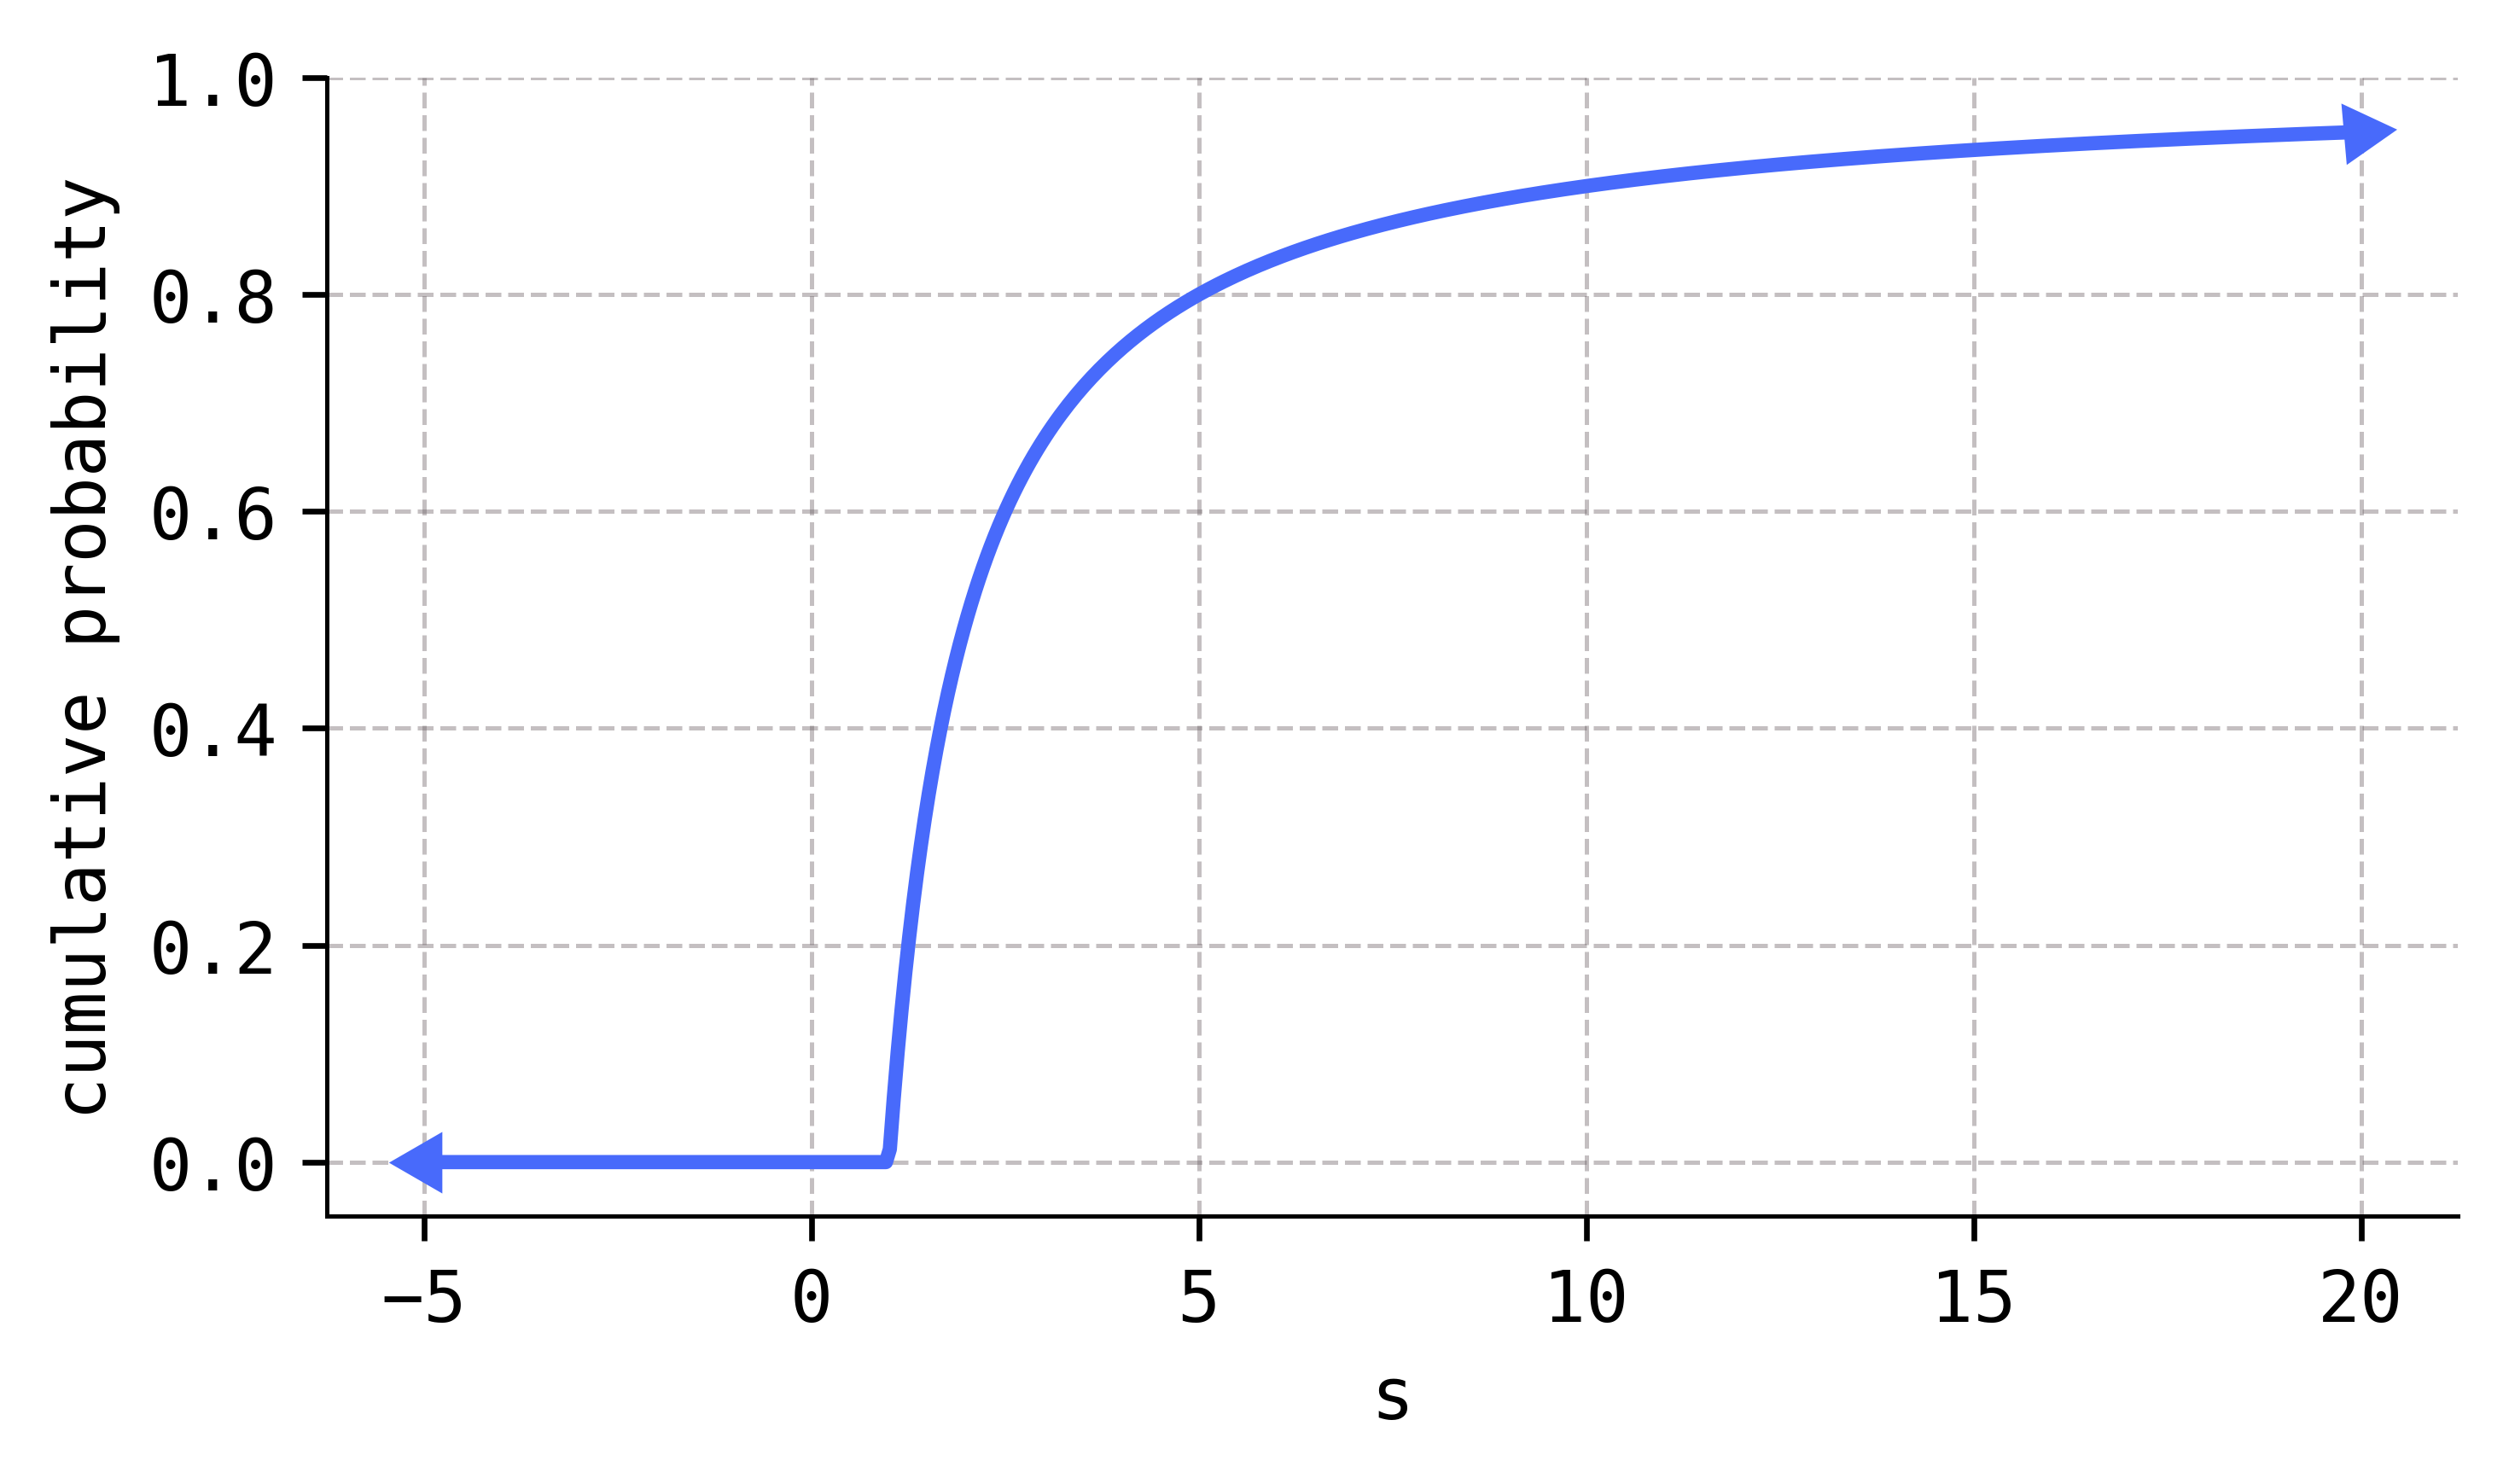

In [12]:
x = np.linspace(-5, 20, 500)

def f(y):
    if (y >= 1):
        return 1 - 1/y
    else:
        return 0.0

f_vec = np.vectorize(f)    
y = f_vec(x)

plt.plot(x, y)

plt.plot(-5, 0, marker=(3, 0, 90), color='#486AFB', markersize=8)
plt.plot(20, f(20), marker=(3, 0, 35), color='#486AFB', markersize=8)
#plt.axhline(y=1, color='red', linestyle='--')

plt.xlabel('s')
plt.ylabel('cumulative probability')
plt.gcf().set_size_inches(5, 3)
plt.ylim(-0.05, 1)
plt.tight_layout()

In contrast to the distribution function above, notice that this one is _continuous_. So, we have noted that the _discrete_ probability measure above has a distribution function which is a step function, while the _continuous_ probability measure above has a distribution function which is itself continuous. These are _not_ coincidences! In fact:

```{prf:theorem} Properties of Distribution Functions

Let $F(s)$ be the distribution function of a probability measure $P$ on $\mathbb{R}$. Then:

1. We have
  
  $$\lim_{s\to \infty} F(s) = 1 \quad \text{and} \quad \lim_{s\to -\infty} F(s) = 0. $$

2. $F(s)$ is a non-decreasing function, in the sense that
  
  $$
  s\leq t \quad \Rightarrow \quad F(s) \leq F(t).
  $$

3. $F(s)$ is *right-continuous* at every $s\in \mathbb{R}$, in the sense that
  
  $$
  F(s) = \lim_{t\to s^+} F(t).
  $$

4. The probability measure $P$ is discrete if and only if $F(s)$ is a step function.

5. The probability measure $P$ is continuous if and only if $F(s)$ is continuous.
```

Though we won't prove them, I am hoping that the equivalences in (4) and (5) at least seem plausible in light of the examples above. We will actually address one half of the equivalence of (5) again when we state the Fundamental Theorem of Calculus (probability version). 

```{margin} Looking beyond...

This stronger form of continuity is called <a href="https://en.wikipedia.org/wiki/Absolute_continuity#Absolute_continuity_of_functions">*absolute continuity*</a>. In addition to regular continuity of $F(s)$, this form of continuity requires that the derivative $F'(s)$ exists <a href="https://en.wikipedia.org/wiki/Almost_everywhere">*almost everywhere*</a>. This fact will be important below when we relate distribution functions to density functions.
```

Technically, the form of 'continuity' in part (5) that the distribution function $F(s)$ must have is stronger than the usual form we encounter in elementary calculus.

Now:

```{admonition} Problem Prompt
Time for some practice with distribution functions. Do problems 15 and 16 on the worksheet.
```

It turns out that there is a very tight connection between distribution functions of continuous probability measures on $\mathbb{R}$ and density functions. This connection is expressed in:

```{prf:theorem} The Fundamental Theorem of Calculus (probability version)

Let $F(s)$ be the distribution function of a probability measure $P$ on $\mathbb{R}$. If $F(s)$ is continuous, then:

1. The measure $P$ is continuous.

2. Wherever the derivative $F'(s)$ exists, we have
    
    $$
    F'(s) = f(s),
    $$
    
    where $f(s)$ is the density function of $P$.
```

To see why this is _not_ just the standard Fundamental Theorem of Calculus that we learned in elementary calculus, recall that the latter _begins_ with an integrable $f(s)$ and _produces_ the antiderivative $F(s)$ via the formula

$$F(s) = \int_{-\infty}^s f(t) \ \text{d} t.$$

_This_ new version of the Fundamental Theorem, however, goes in the opposite direction: It _begins_ with a continuous distribution function $F(s)$ and _produces_ the density function $f(s)$ as the derivative of $F(s)$.

```{margin} Looking beyond...

This "probability version" of the Fundamental Theorem is actually properly known as the <a href="https://en.wikipedia.org/wiki/Absolute_continuity#Equivalent_definitions">Fundamental Theorem of Calculus for Lebesgue Integrals</a>.
```

Again, the form of 'continuity' of $F(s)$ referred to in this theorem is actually the stronger form called _absolute continuity_ that I mentioned in the margin note above, where I also mentioned that the places where the derivative $F'(s)$ exists happens to be <a href="https://en.wikipedia.org/wiki/Almost_everywhere">*almost everywhere*</a>. You will see how this works in practice in a simple example in:

```{admonition} Problem Prompt
Do problem 17 on the worksheet.
```

Having studied distribution functions, we now study their (almost) inverses:

```{prf:definition}

Let $P$ be a probability measure on $\mathbb{R}$ with distribution function $F:\mathbb{R} \to [0,1]$. The _quantile function_ $Q: [0,1] \to \mathbb{R}$ is defined so that

$$Q(p) = \min\{s\in \mathbb{R} : p\leq F(s)\}.$$

In other words, the value $s=Q(p)$ is the smallest $s\in \mathbb{R}$ such that $p\leq F(s)$.

1. The value $Q(p)$ is called the *$p$-th quantile*.

2. The quantile $Q(0.5)$ is called the *median* of the probability measure $P$.
```

It is helpful to remember that a distribution function $F:\mathbb{R} \to [0,1]$ takes real numbers $s\in \mathbb{R}$ as inputs, and returns probabilities $p\in[0,1]$ as outputs. On the other hand, a quantile function $Q:[0,1]\to \mathbb{R}$ goes in the _opposite_ direction: It takes probabilities as $p\in[0,1]$ as inputs, and returns real numbers $s\in \mathbb{R}$ as outputs. Thus:

$$Q(p) = s \quad \text{and} \quad p = F(s).$$ (inv-eqn)

Be careful in interpreting these two equations _simultaneously_, however, since $F(s)$ might not be an invertible function! (As an extreme example, $F(s)$ could be a step function, as we saw above.)

To illustrate, let's return to the continuous probability measure $P$ from above with density

$$f(s) = \begin{cases} \displaystyle \frac{1}{s^2} & : s\geq 1, \\ 0 & : \text{otherwise}.\end{cases}
$$

The graph of $f(s)$ is:

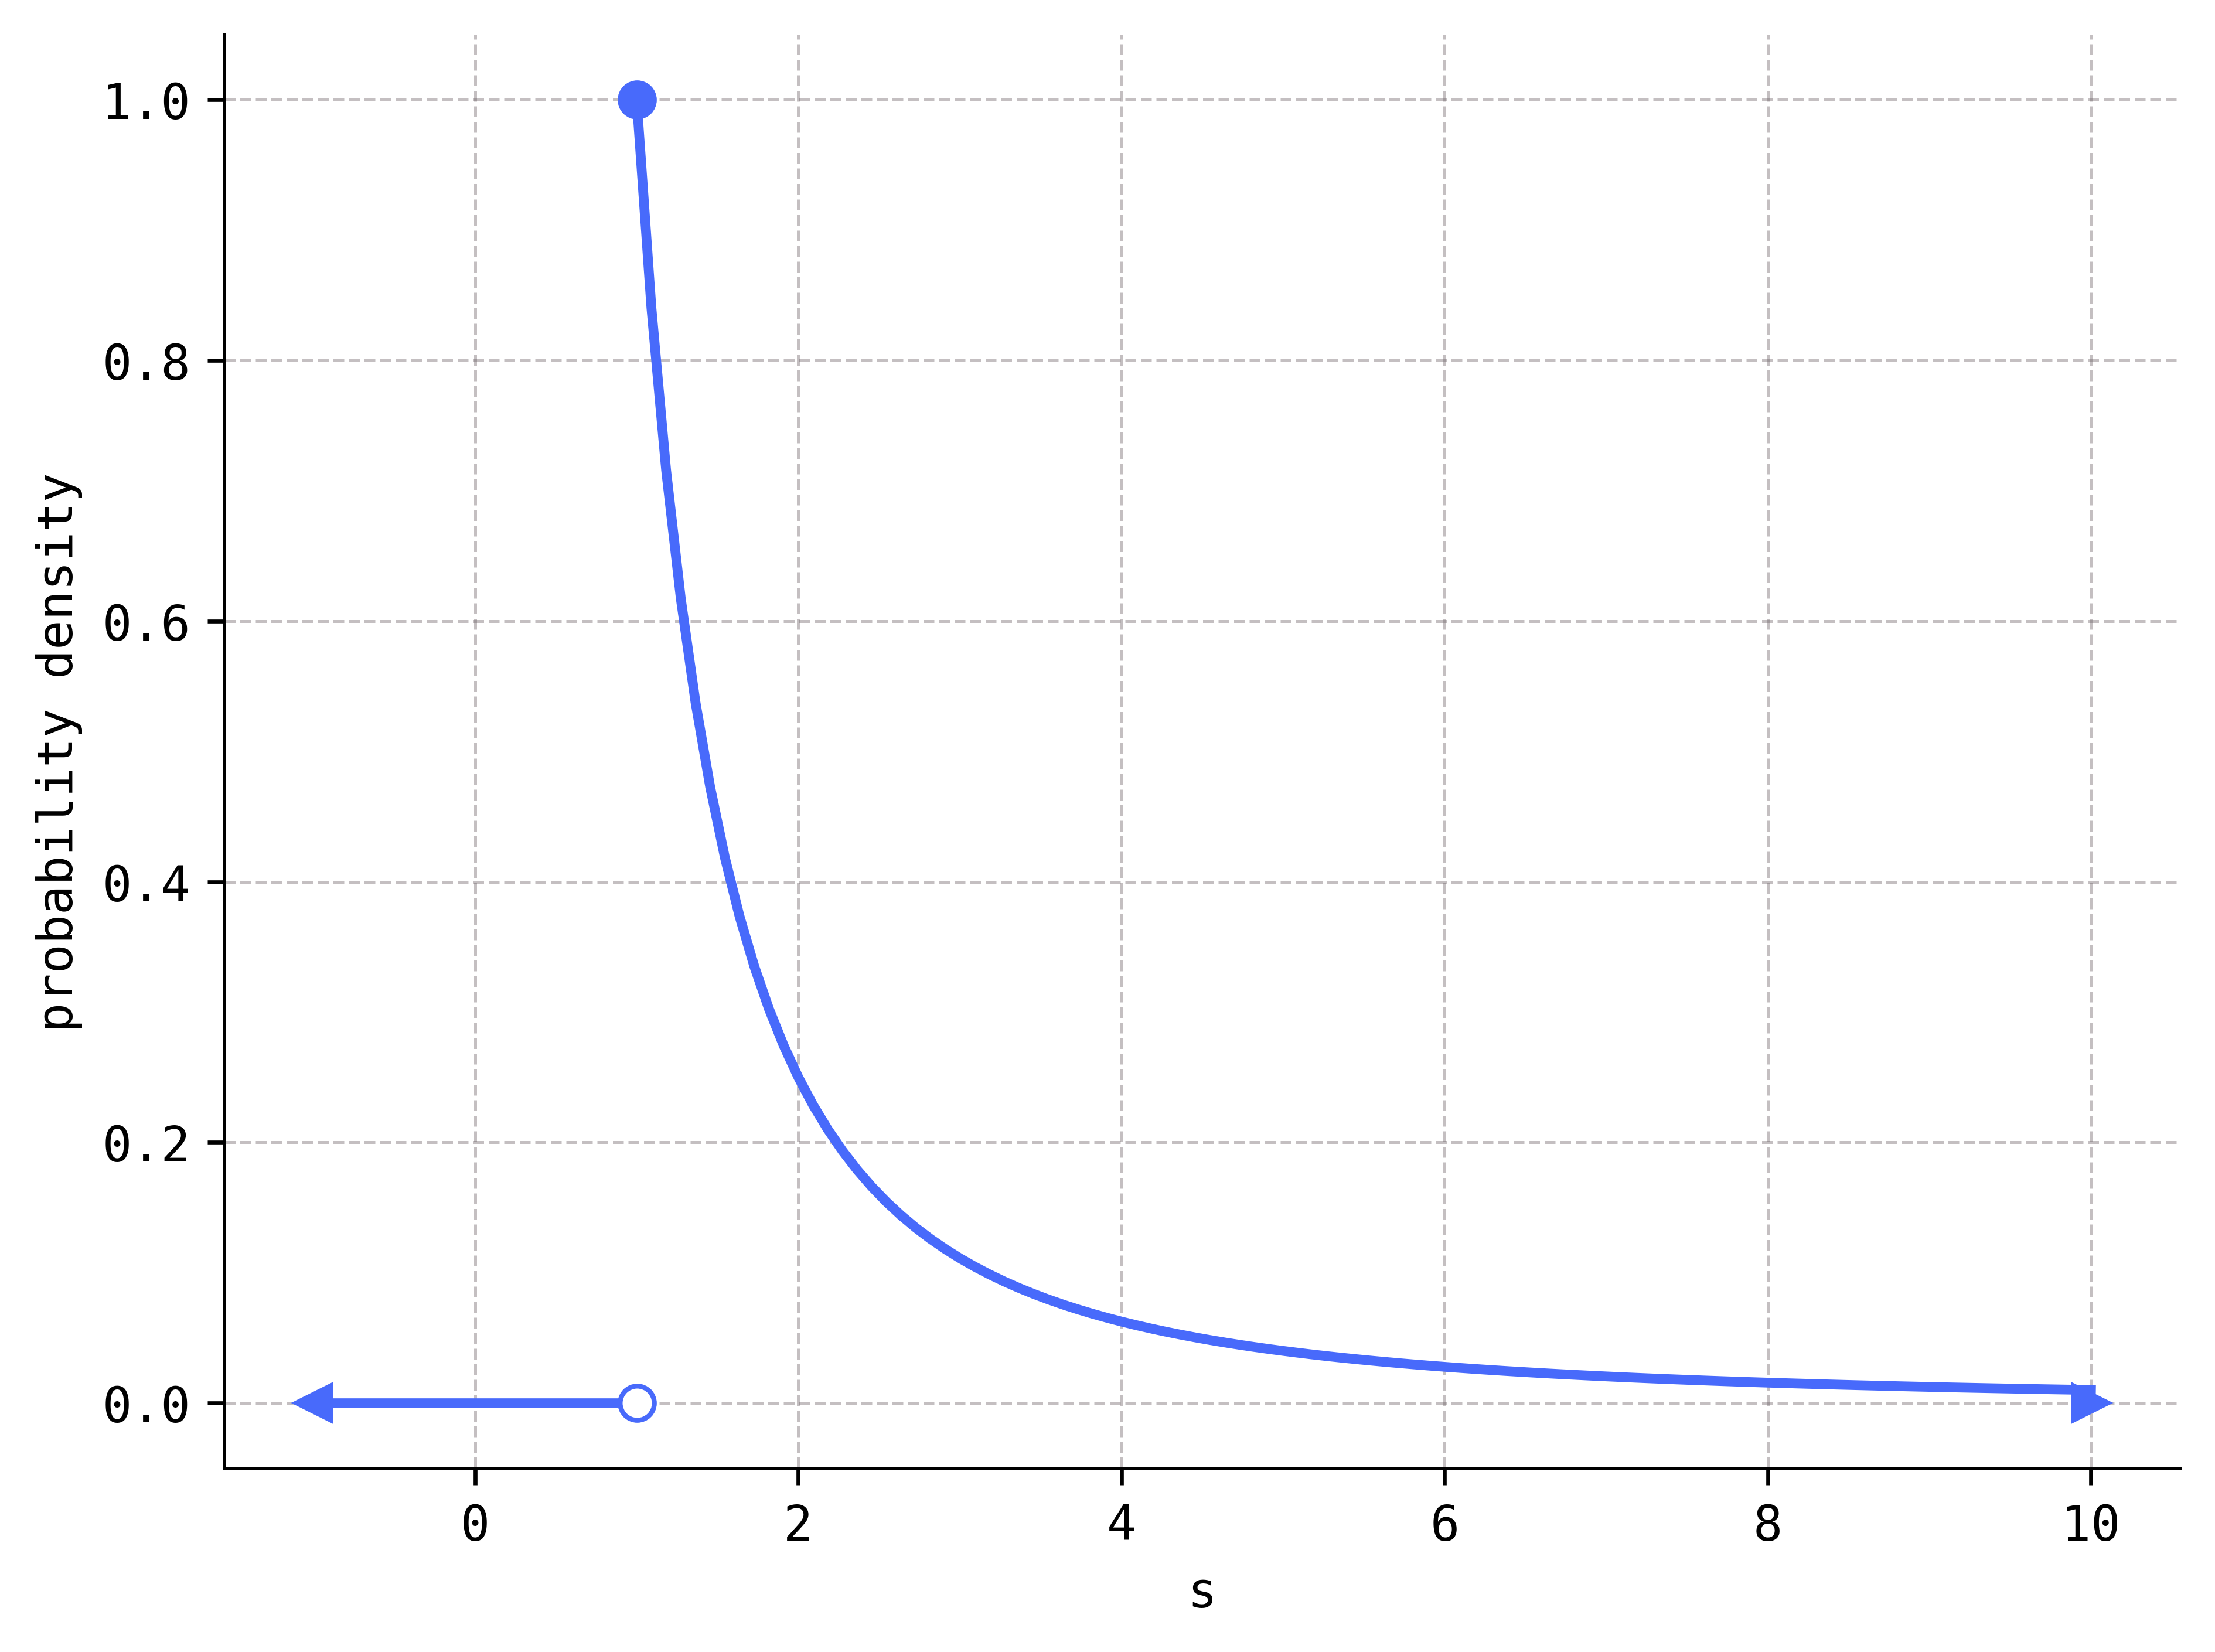

In [13]:
x_left = np.linspace(-1, 0.99, 50)
x_right = np.linspace(1, 10, 100)

def f(s):
    if (s >= 1):
        return 1 / (s ** 2)
    else:
        return 0.0

f_vec = np.vectorize(f)    
y_left = f_vec(x_left)
y_right = f_vec(x_right)

plt.plot(x_left, y_left)
plt.plot(x_right, y_right, color='#486AFB')

plt.plot(-1, 0, marker='<', color='#486AFB', markersize=7)
plt.plot(10, 0, marker='>', color='#486AFB', markersize=7)
plt.plot(1, 1, marker='o', color='#486AFB', markersize=7)
plt.plot(1, 0, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')

plt.xlabel('s')
plt.ylabel('probability density')
plt.tight_layout()

Remember that probabilities are interpreted as areas under the graph of $f(s)$.

The number $s = Q(0.5)$ is the location $s\in \mathbb{R}$ along the horizontal axis where *half* of the probability is to the left:

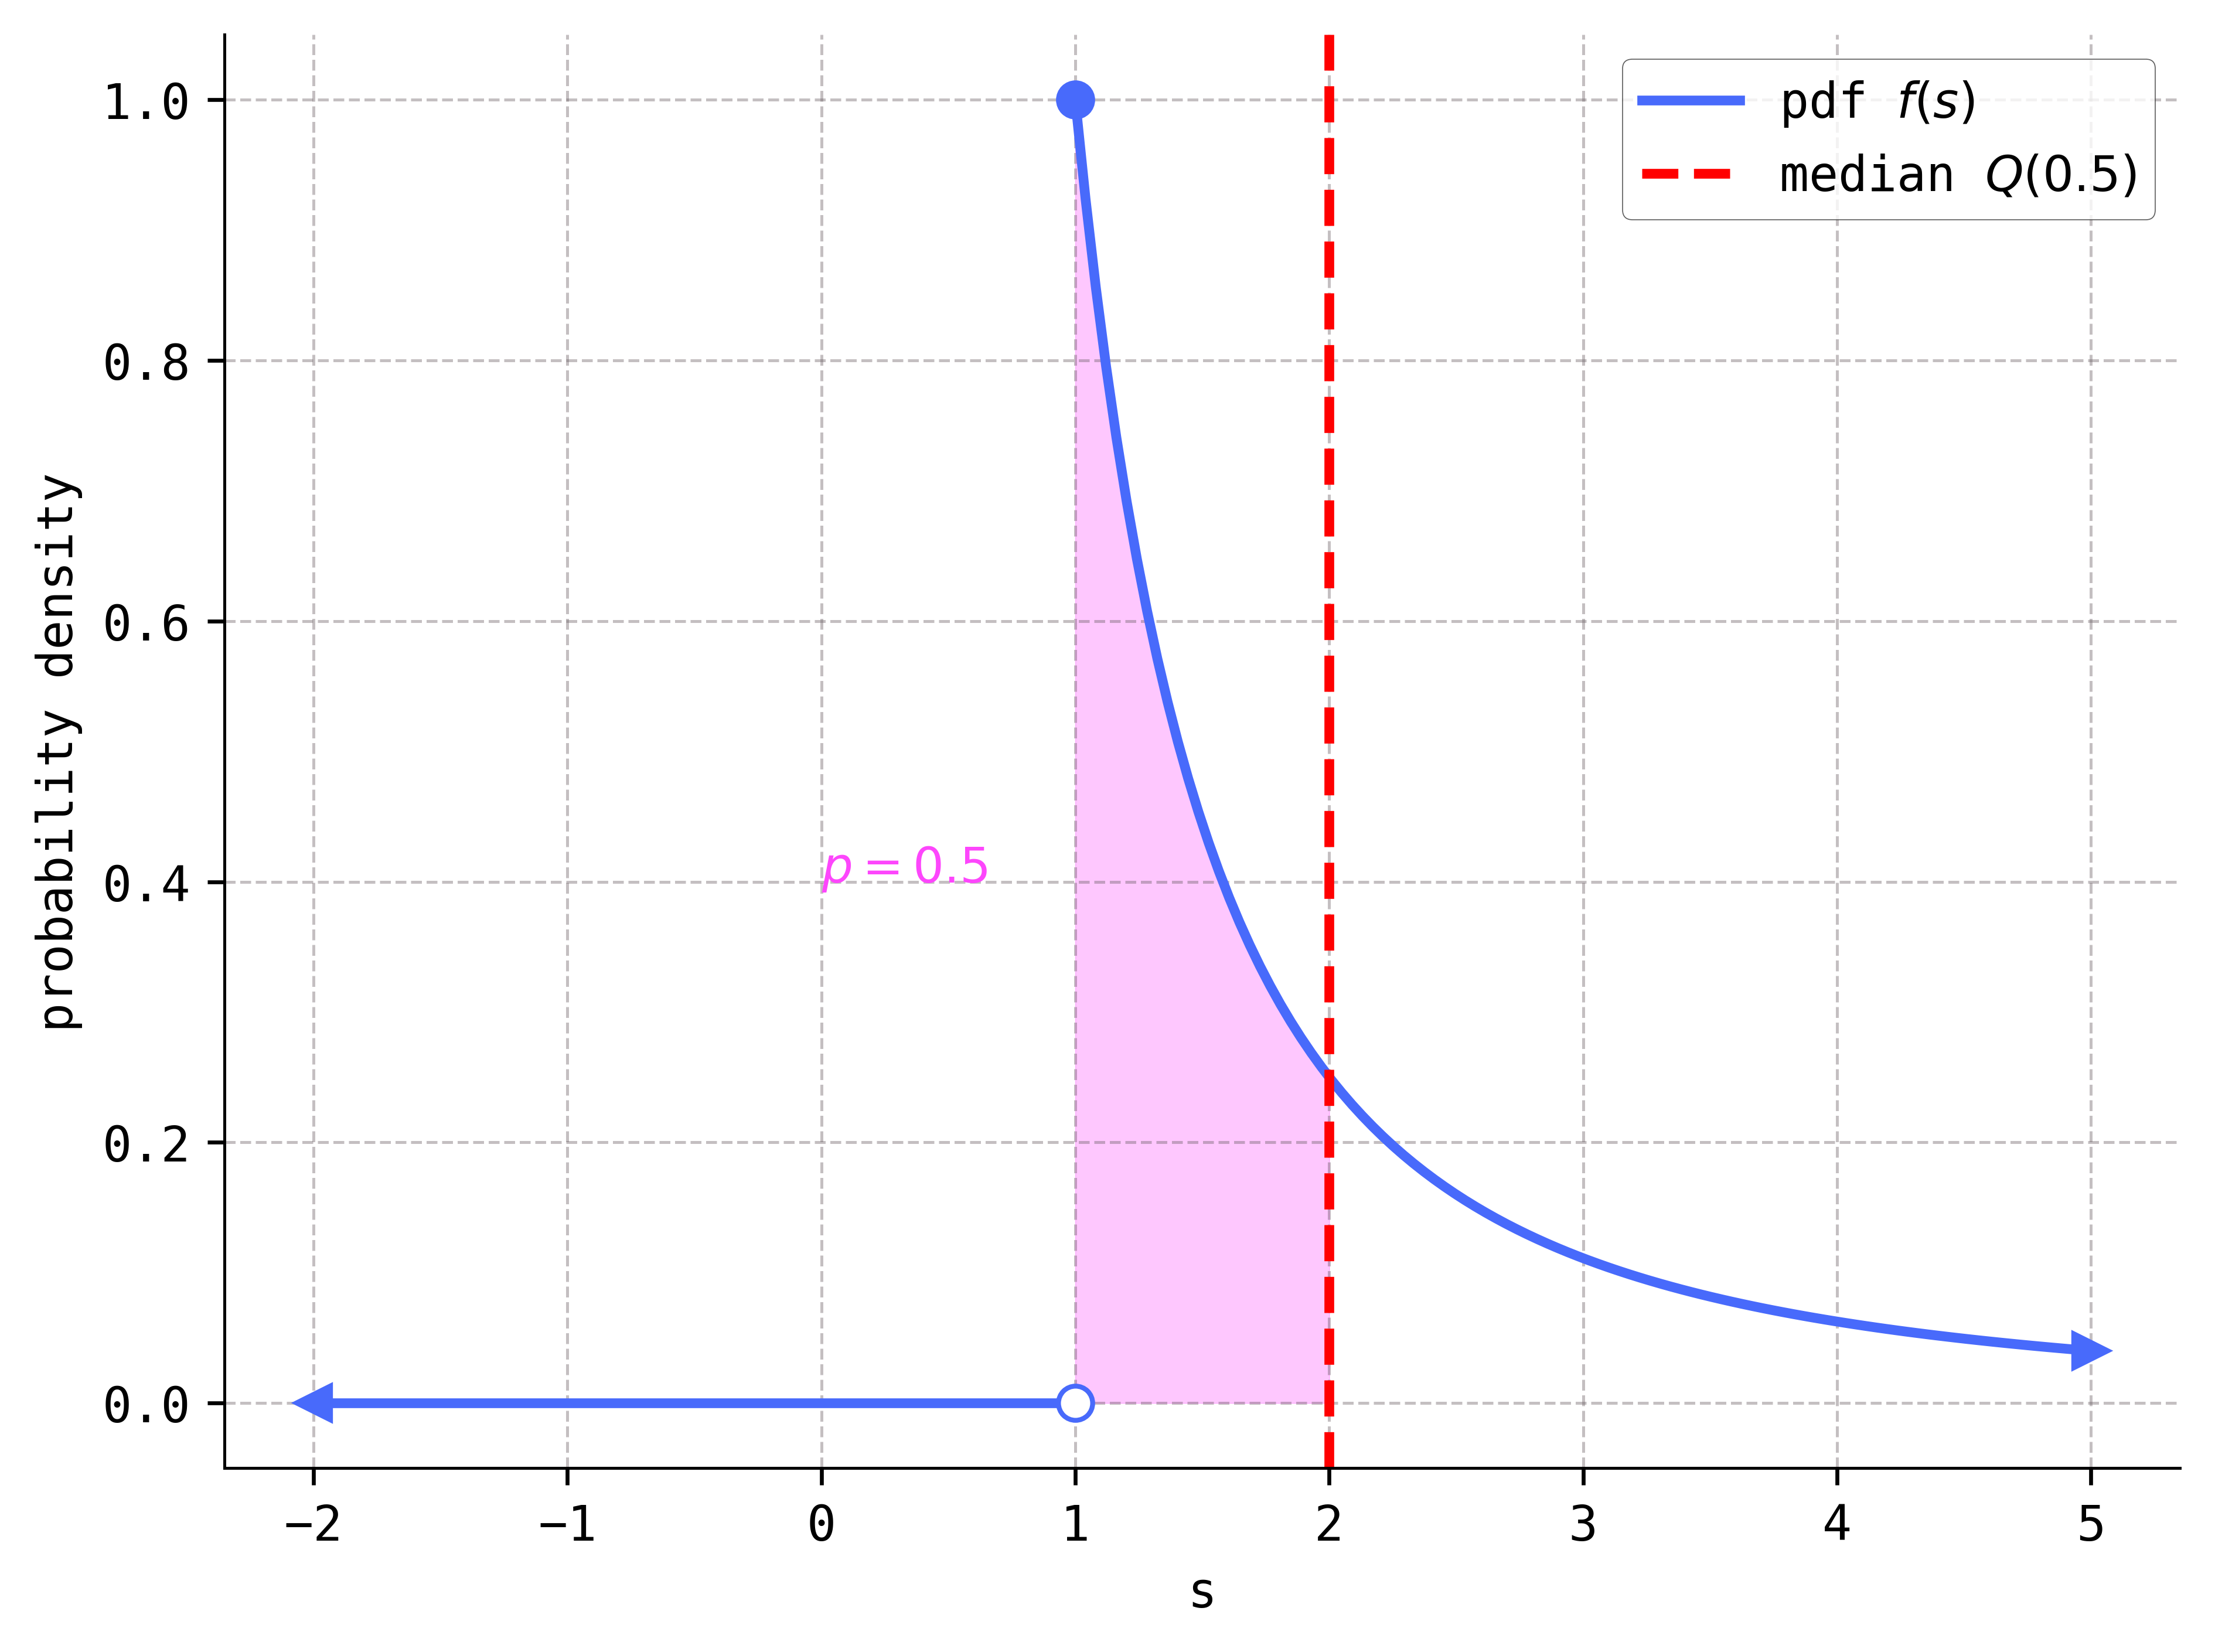

In [14]:
x_left = np.linspace(-2, 1, 50, endpoint=False)
x_right = np.linspace(1, 5, 100)
x_fill = np.linspace(1, 2)

def f(s):
    if (s >= 1):
        return 1 / (s ** 2)
    else:
        return 0.0

f_vec = np.vectorize(f)    
y_left = f_vec(x_left)
y_right = f_vec(x_right)
y_fill = f_vec(x_fill)

plt.plot(x_left, y_left, label=r'pdf $f(s)$')
plt.plot(x_right, y_right, color='#486AFB')
plt.axvline(x=2, color='red', linestyle='--', label=r'median $Q(0.5)$')
plt.fill_between(x_fill, y_fill, color='#FD46FC', alpha=0.3)

plt.plot(-2, 0, marker='<', color='#486AFB', markersize=7)
plt.plot(5, f(5), marker='>', color='#486AFB', markersize=7)
plt.plot(1, 1, marker='o', color='#486AFB', markersize=7)
plt.plot(1, 0, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')
plt.text(0, 0.4, r'$p=0.5$', color='#FD46FC')

plt.xlabel('s')
plt.ylabel('probability density')
plt.legend()
plt.tight_layout()

From the figure, we see that the median is $Q(0.5)=2$.

Likewise, the number $s = Q(0.75)$ is the location $s\in \mathbb{R}$ along the horizontal axis where $75\%$ of the probability is to the left:

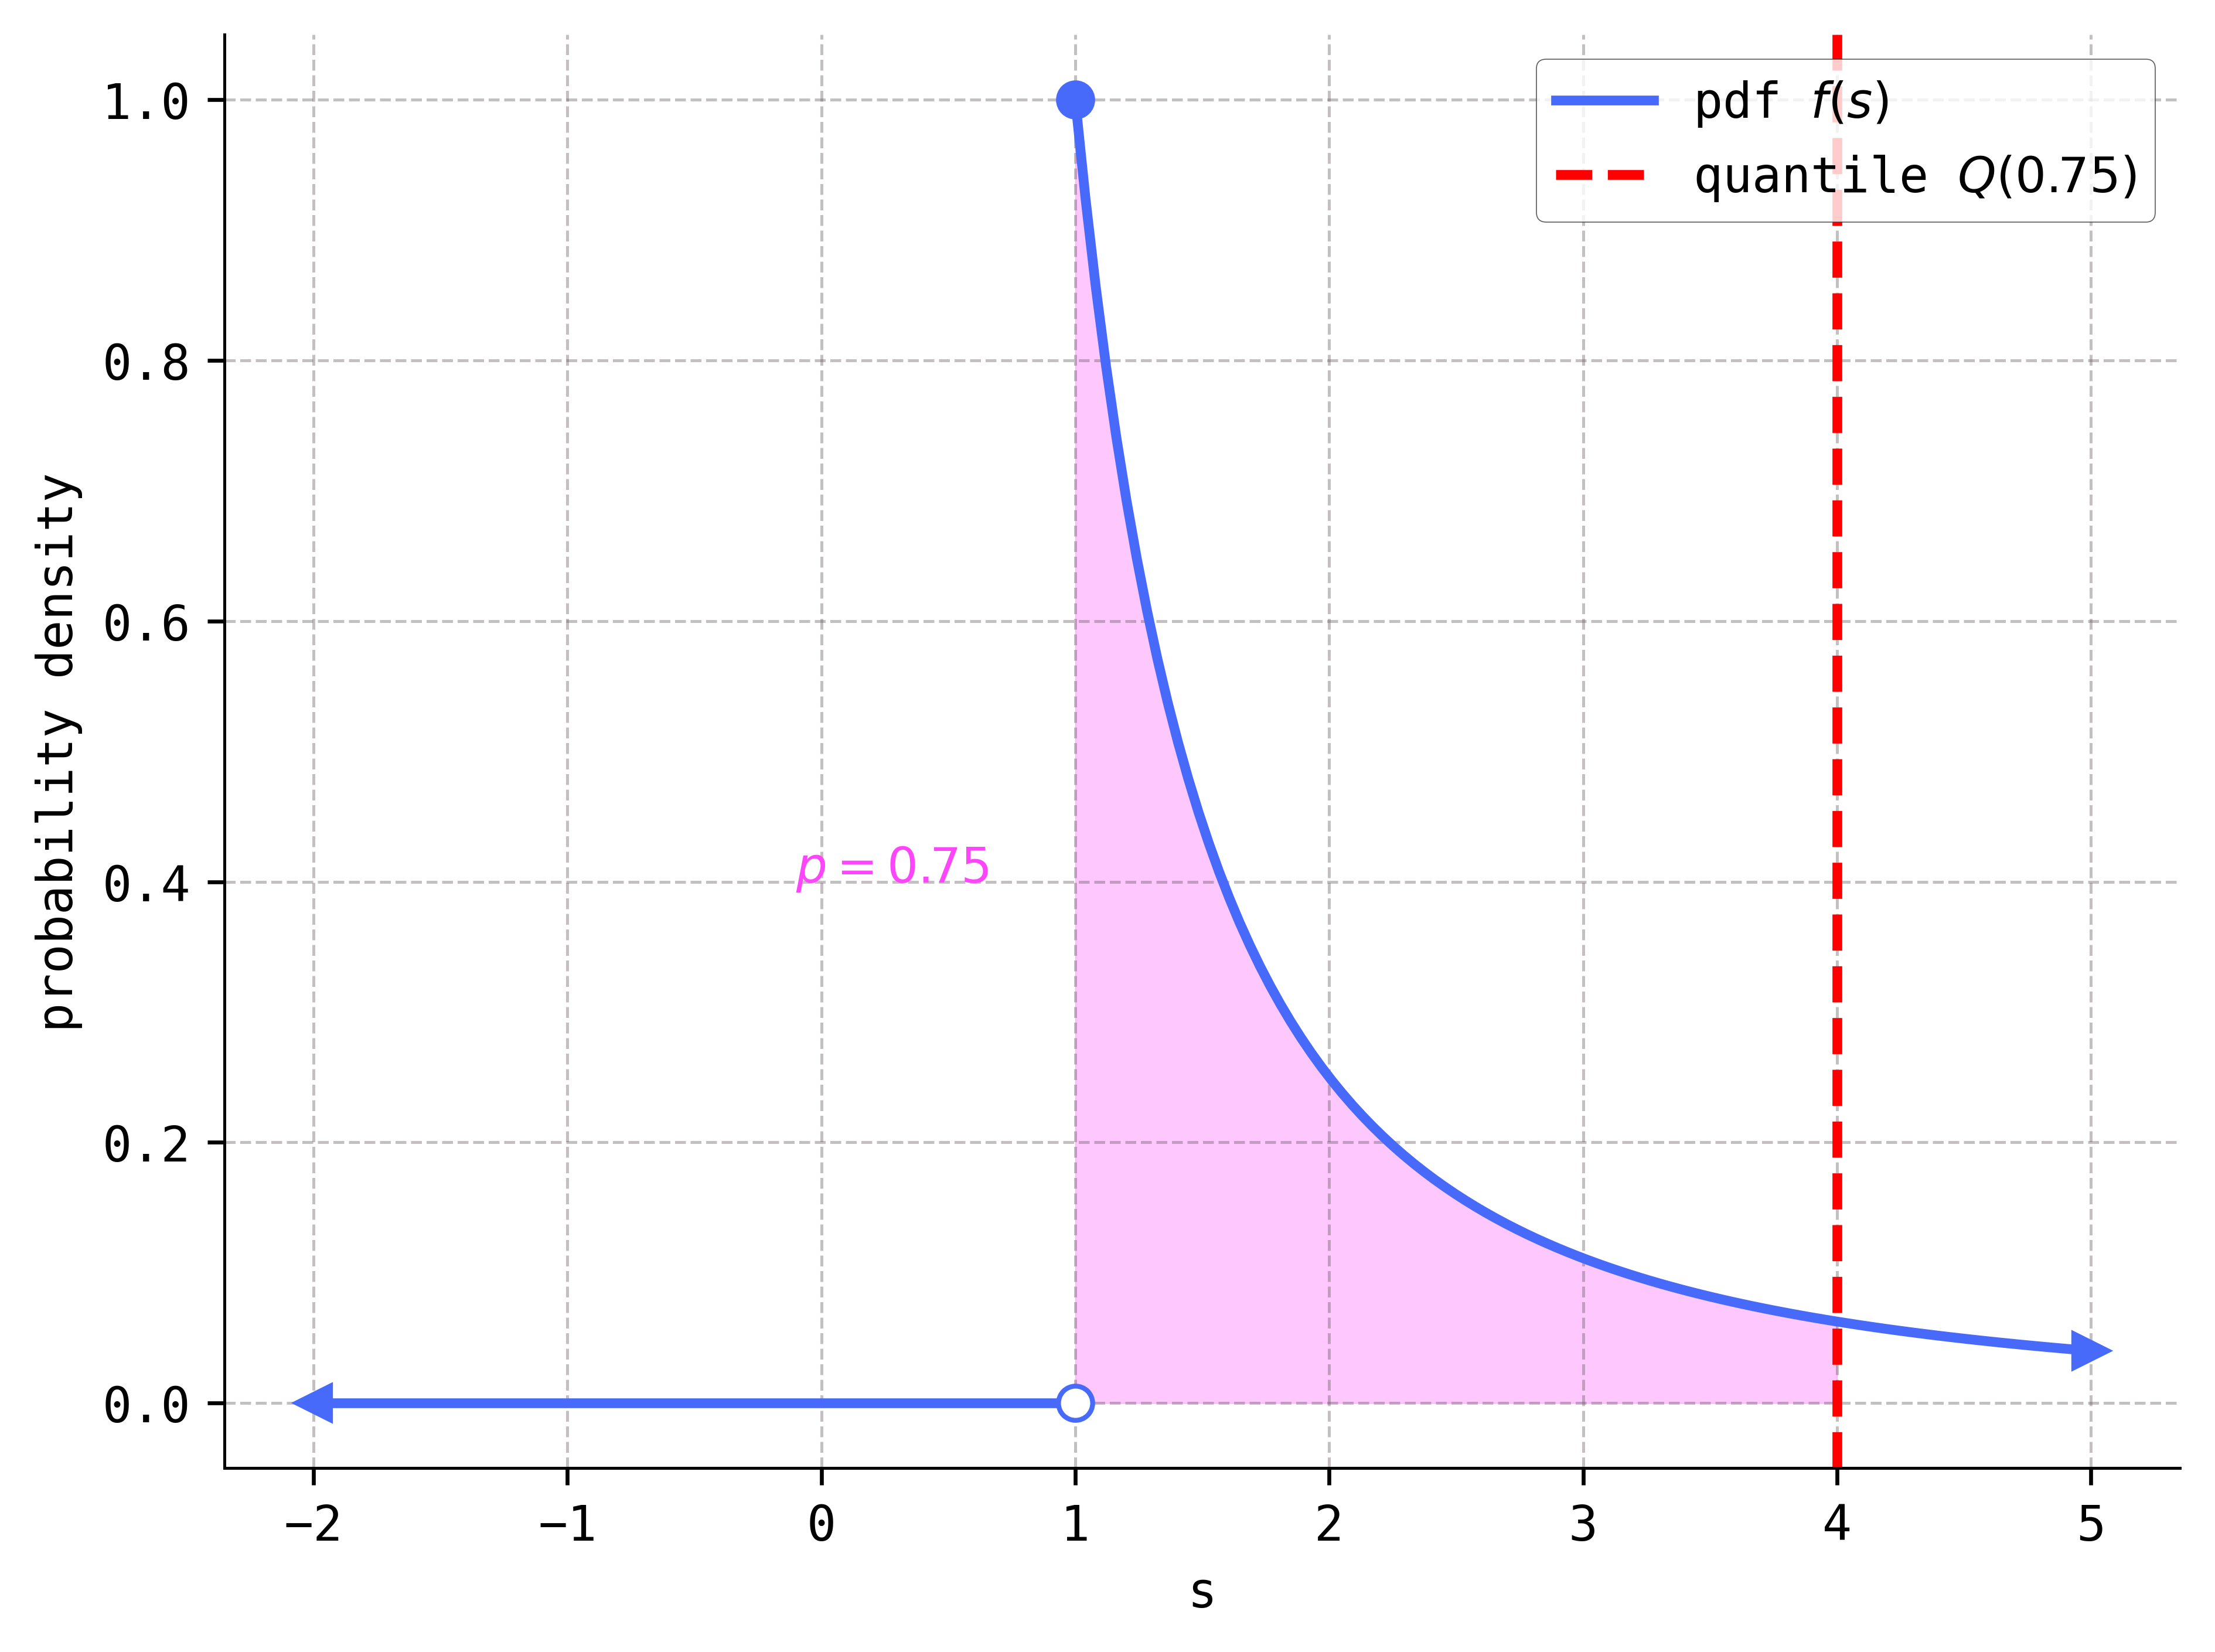

In [15]:
x_left = np.linspace(-2, 1, 50, endpoint=False)
x_right = np.linspace(1, 5, 100)
x_fill = np.linspace(1, 4)

def f(s):
    if (s >= 1):
        return 1 / (s ** 2)
    else:
        return 0.0

f_vec = np.vectorize(f)    
y_left = f_vec(x_left)
y_right = f_vec(x_right)
y_fill = f_vec(x_fill)

plt.plot(x_left, y_left, label=r'pdf $f(s)$')
plt.plot(x_right, y_right, color='#486AFB')
plt.axvline(x=4, color='red', linestyle='--', label=r'quantile $Q(0.75)$')
plt.fill_between(x_fill, y_fill, color='#FD46FC', alpha=0.3)

plt.plot(-2, 0, marker='<', color='#486AFB', markersize=7)
plt.plot(5, f(5), marker='>', color='#486AFB', markersize=7)
plt.plot(1, 1, marker='o', color='#486AFB', markersize=7)
plt.plot(1, 0, marker='o', color='#486AFB', markersize=7, markerfacecolor='w')
plt.text(-0.1, 0.4, r'$p=0.75$', color='#FD46FC')

plt.xlabel('s')
plt.ylabel('probability density')
plt.legend(loc='upper right')
plt.tight_layout()

From this figure, we see that $Q(0.75) = 4$.

We may confirm these numbers by using the formula for the distribution function $F(s)$ that we computed above:

$$F(s) = \begin{cases} -\displaystyle\frac{1}{s} + 1 & : s\geq 1, \\ 0 & : s <1 .\end{cases}$$

To compute $s = Q(0.5)$, we solve:

$$F(s) = 0.5 \quad \Rightarrow\quad -\frac{1}{s} + 1 = 0.5 \quad \Rightarrow \quad s=2.$$

Thus, $Q(0.5)=2$, just like we saw in the figure.

Likewise, to compute $s = Q(0.75)$, we solve:

$$F(s) = 0.75 \quad \Rightarrow \quad -\frac{1}{s} + 1 = 0.75 \quad \Rightarrow \quad s=4.$$

Thus, $Q(0.75)=4$.

Computing quantiles in the continuous case is facilitated by visualizing probabilities as areas under density curves. In the discrete case, however, things can be slightly trickier. You will get practice in:

```{admonition} Problem Prompt
Do problems 18 and 19 on the worksheet.
```







(bivar-cont-prob)=
## Bivariate continuous probability measures

Having studied continuous probability measures on the real line $\mathbb{R}$, it is now not too much of a leap to imagine the definition of a continuous probability measure on the plane $\mathbb{R}^2$. As a matter of terminology, continuous probability measures on $\mathbb{R}$ are called _univariate_ or _single-variable_, while continuous probability measures on $\mathbb{R}^2$ are called _bivariate_ or _two-variable_.

Here's the definition:

```{prf:definition}

Let $P$ be a probability measure on $\mathbb{R}^2$. We shall say $P$ is _continuous_ if there is a function $f:\mathbb{R}^2 \to \mathbb{R}$ such that

$$P\big( C \big) = \iint_C f(s,t) \ \text{d} s \text{d} t$$

for all events $C\subset \mathbb{R}^2$. In this case, the function $f$ is called the _probability density function_ (PDF) of the probability measure $P$, and $\mathbb{R}^2$ is called a _continuous probability space_ (when equipped with $P$).
```

Thus, the major difference between univariate and bivariate continuous probability measures are the number of variables and the number of integrals (one versus two). Essentially all the remarks (or their obvious bivariate analogs) that I made after the definition of univariate continuous probability measures apply also to bivariate continuous probability measures.

```{admonition} Problem Prompt
Do problems 20 and 21 on the worksheet.
```

We have the following list of properties of bivariate density functions. This is now the *third* version of this same list of properties!

```{prf:theorem} Properties of Probability Density Functions (bivariate version)

Let $f(s,t)$ be the probability density function of a continuous probability measure $P$ on $\mathbb{R}^2$. Then:

1. $f(s,t)\geq 0 $ for all $s,t\in \mathbb{R}$, and

2. $\iint_{\mathbb{R}^2} f(s,t) \ \text{d} s \text{d} t =1$.
```

And we also have a *third* version of the Probability Construction Lemma. (Are you detecting the pattern yet...?)

```{prf:theorem} Continuous Probability Construction Lemma (bivariate version)

Let $f:\mathbb{R}^2 \to \mathbb{R}$ be a function such that

1. $f(s,t)\geq 0$ for all $s,t\in \mathbb{R}$, and

2. $\iint_{\mathbb{R}^2} f(s,t) \ \text{d} s \text{d} t =1$.

Then there is a unique continuous probability measure $P$ on $\mathbb{R}^2$ such that

$$P\big( C \big) = \iint_C f(s,t) \ \text{d} s \text{d} t$$

for all events $C\subset \mathbb{R}^2$.
```

Then:

```{admonition} Problem Prompt
Do problem 22 on the worksheet.
```

Having seen the definitions of univariate and bivariate continuous probability measures, I bet you will have no trouble imagining the definition of a general multivariate continuous probability measure. For example, in the three-variable case, all integrals become triple integrals, and so forth.











## Probability density graphs (bivariate versions)

We may visualize bivariate density functions by first imagining the sample space $S=\mathbb{R}^2$ as the horizontal coordinate plane in $3$-dimensional space $\mathbb{R}^3$. Then, we may draw the graph of a density function $f(s,t)$ in $\mathbb{R}^3$, just like we learned in (for example) multivariable calculus. But remember, since $f(s,t)$ is a _two_-variable real-valued function, its graph is not a _curve_, but rather a _surface_. As in the univariate case, these graphs are called _probability density graphs_.

Here's a bivariate density function from the worksheet:

$$f(s,t) = \begin{cases} \frac{1}{8}(s+t) & : 0 \leq s, t\leq 2, \\ 0 & : \text{otherwise}. \end{cases}$$

Over the square $[0,2] \times [0,2]$ in the $st$-plane, I am hoping that you recognize the graph of $f(s,t)$ is a plane through the origin, with a slope of $1/8$ in both the $s$- and $t$-directions. For points $(s,t)$ that are *not* in this square, we have $f(s,t) = 0$. Here's the picture:

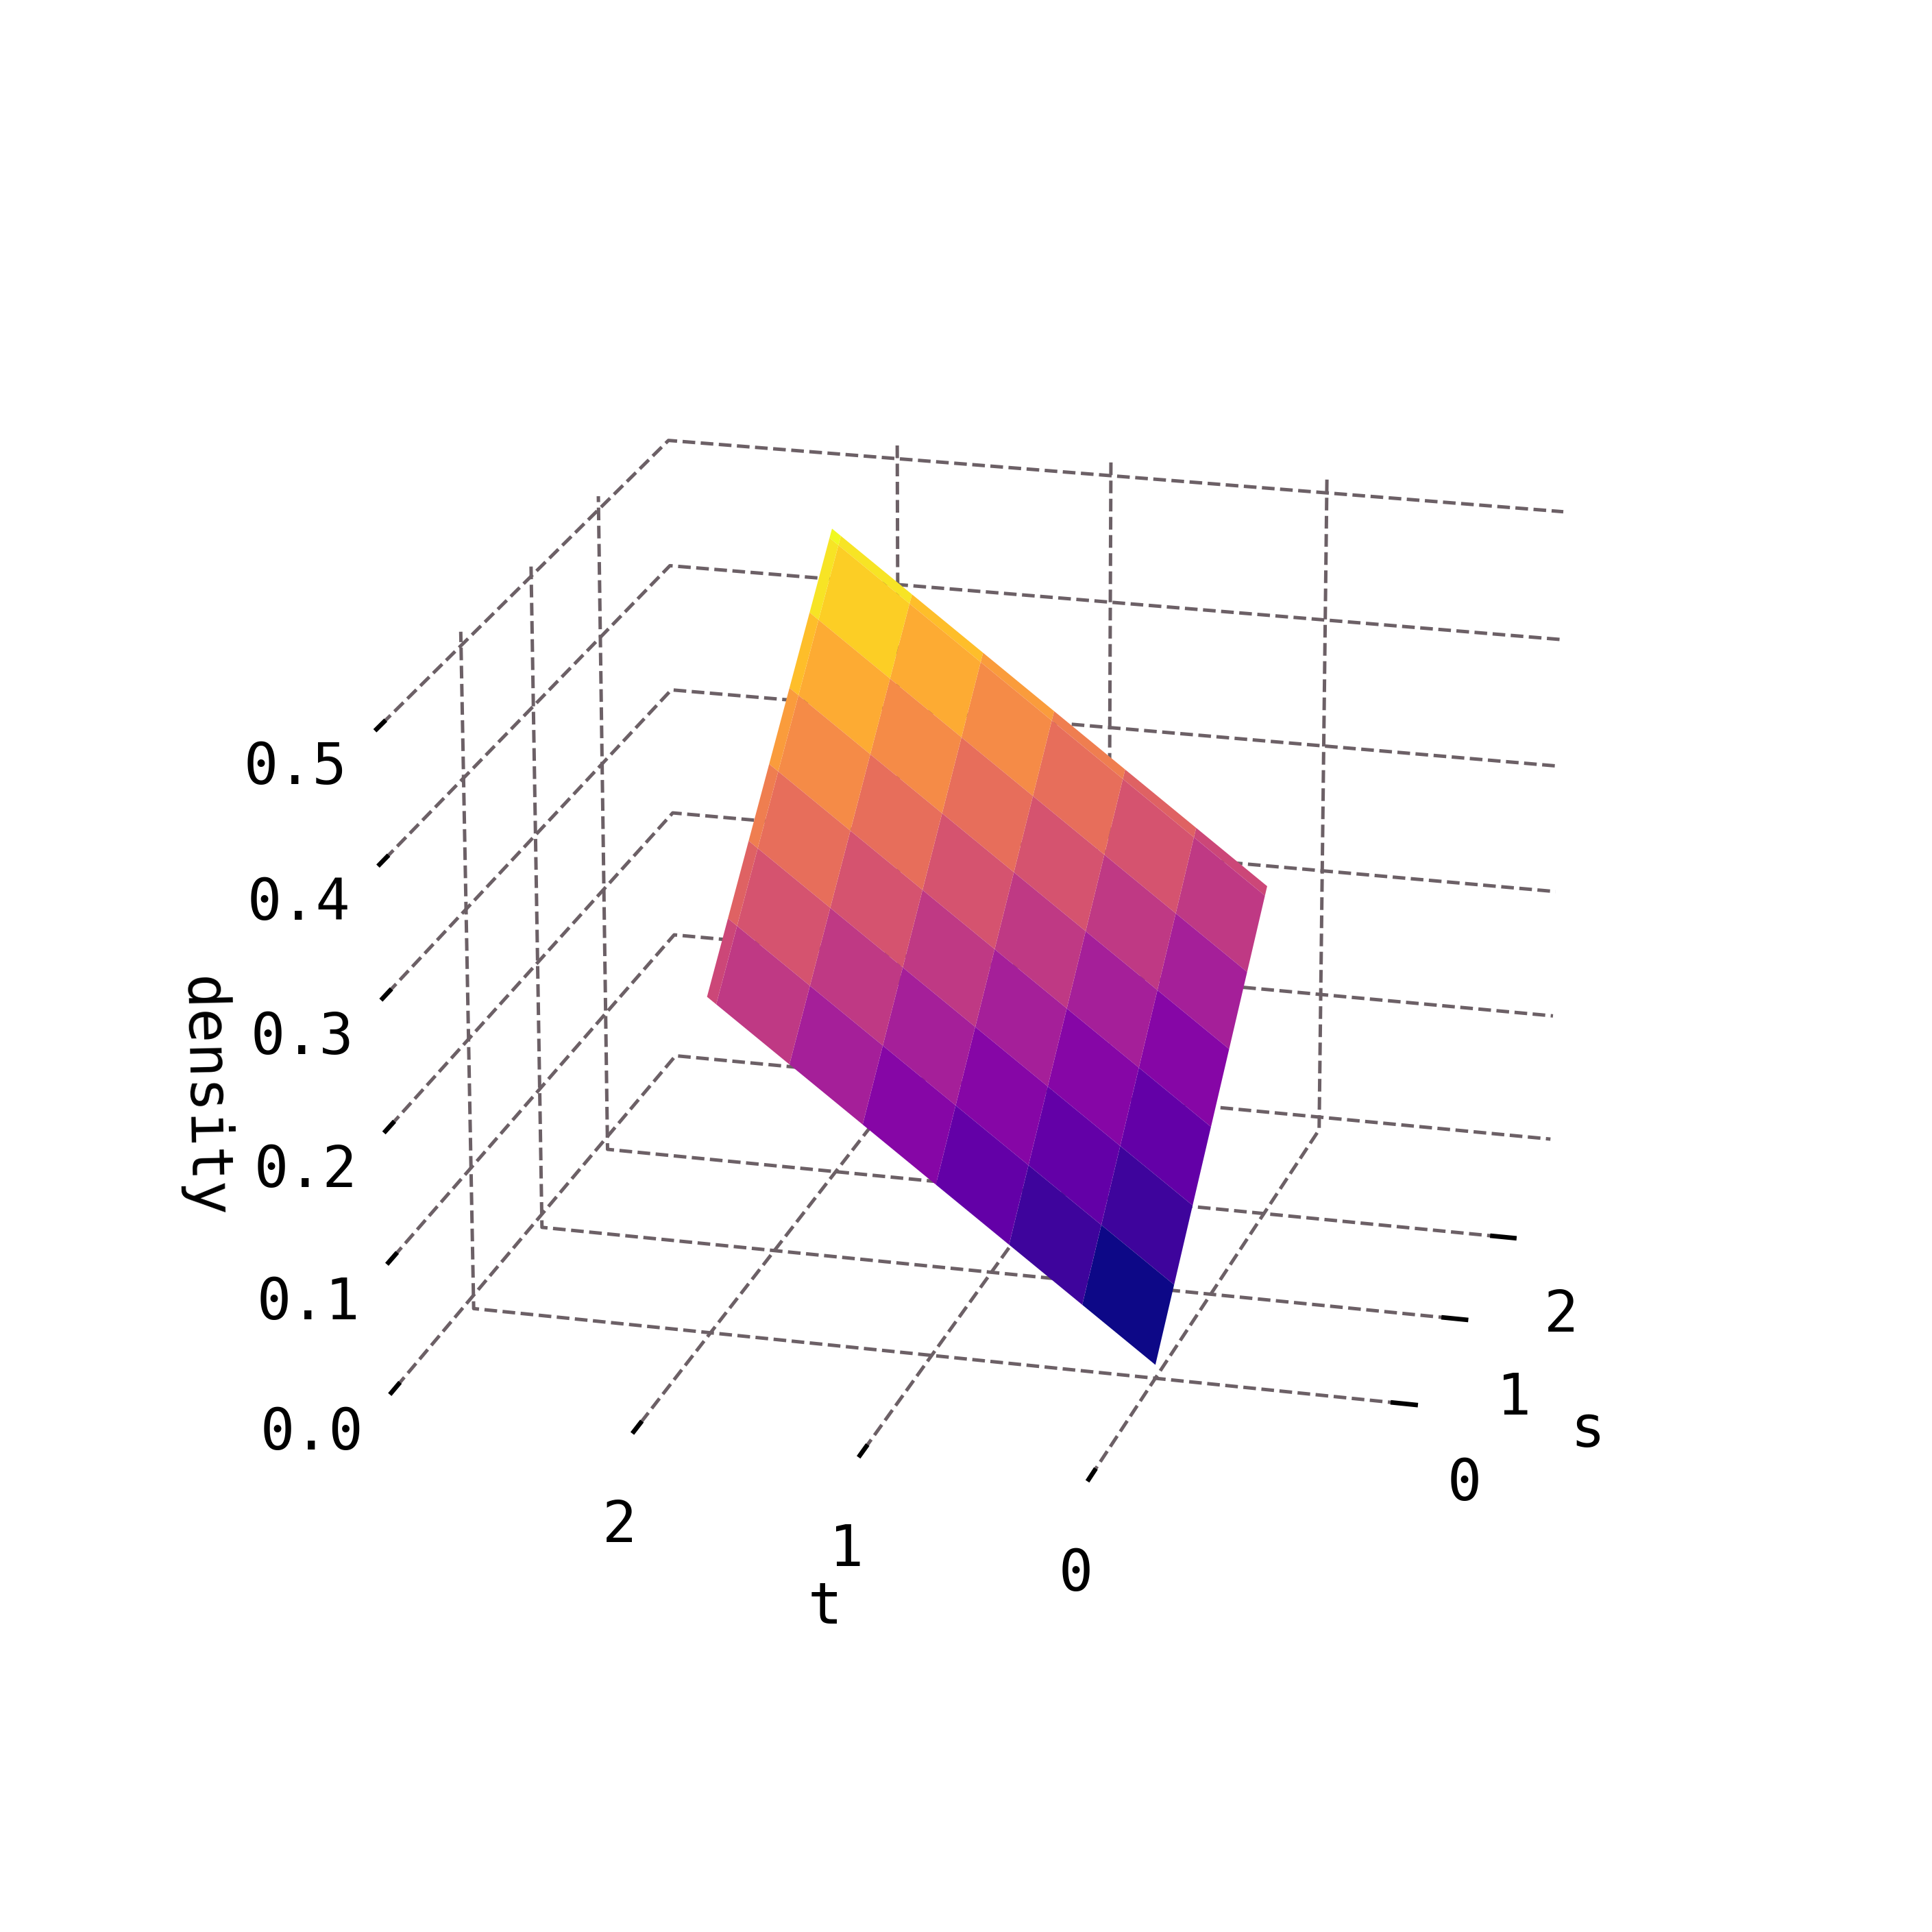

In [16]:
def f(s, t):
    if (0 <= s <= 2) and (0 <= t <= 2):
        return (1/8) * (s + t)
    else:
        return 0.0

f_vec = np.vectorize(f)

x = np.linspace(0, 2)
y = np.linspace(0, 2)
x, y = np.meshgrid(x, y)

z = f_vec(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=8, cstride=8, cmap='plasma')

ax.set_facecolor('w')
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
ax.set_zlim(0, 0.5)
ax.set_xlabel('s')
ax.set_ylabel('t')
ax.set_zlabel('density')

ax.view_init(20, 195)
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.tight_layout()

In this picture, it _appears_ that the graph of $f(s,t)$ _doesn't exist_ for $(s,t)$ outside the square mentioned above, but that's only because I didn't want to clutter the picture. So, you have to imagine that the graph of $f(s,t)$ drops to the $st$-plane for points $(s,t)$ outside the square $[0,2]\times [0,2]$.

Remember in the univariate case that probabilities are understood visually as _areas_ under density curves. Here, in the bivariate case, probabilities are _volumes_ under density surfaces. So, for example, the probability

$$P \big( [0,1] \times [0,1] \big) = \int_0^1 \int_0^1 f(s,t) \ \text{d} s \text{d} t = \frac{1}{8}$$

is the volume under the plane and above the square $[0,1]\times [0,1]$ in the $st$-plane. And again, I must issue the following reminder:

```{warning}
The heights of the density surface are **not** probabilities!
```

For another example, consider the density

$$f(s,t) = \begin{cases} e^{-(s+t)} & : s,t>0, \\ 0 & : \text{otherwise}, \end{cases}$$

which is also from the worksheet. The density graph is:

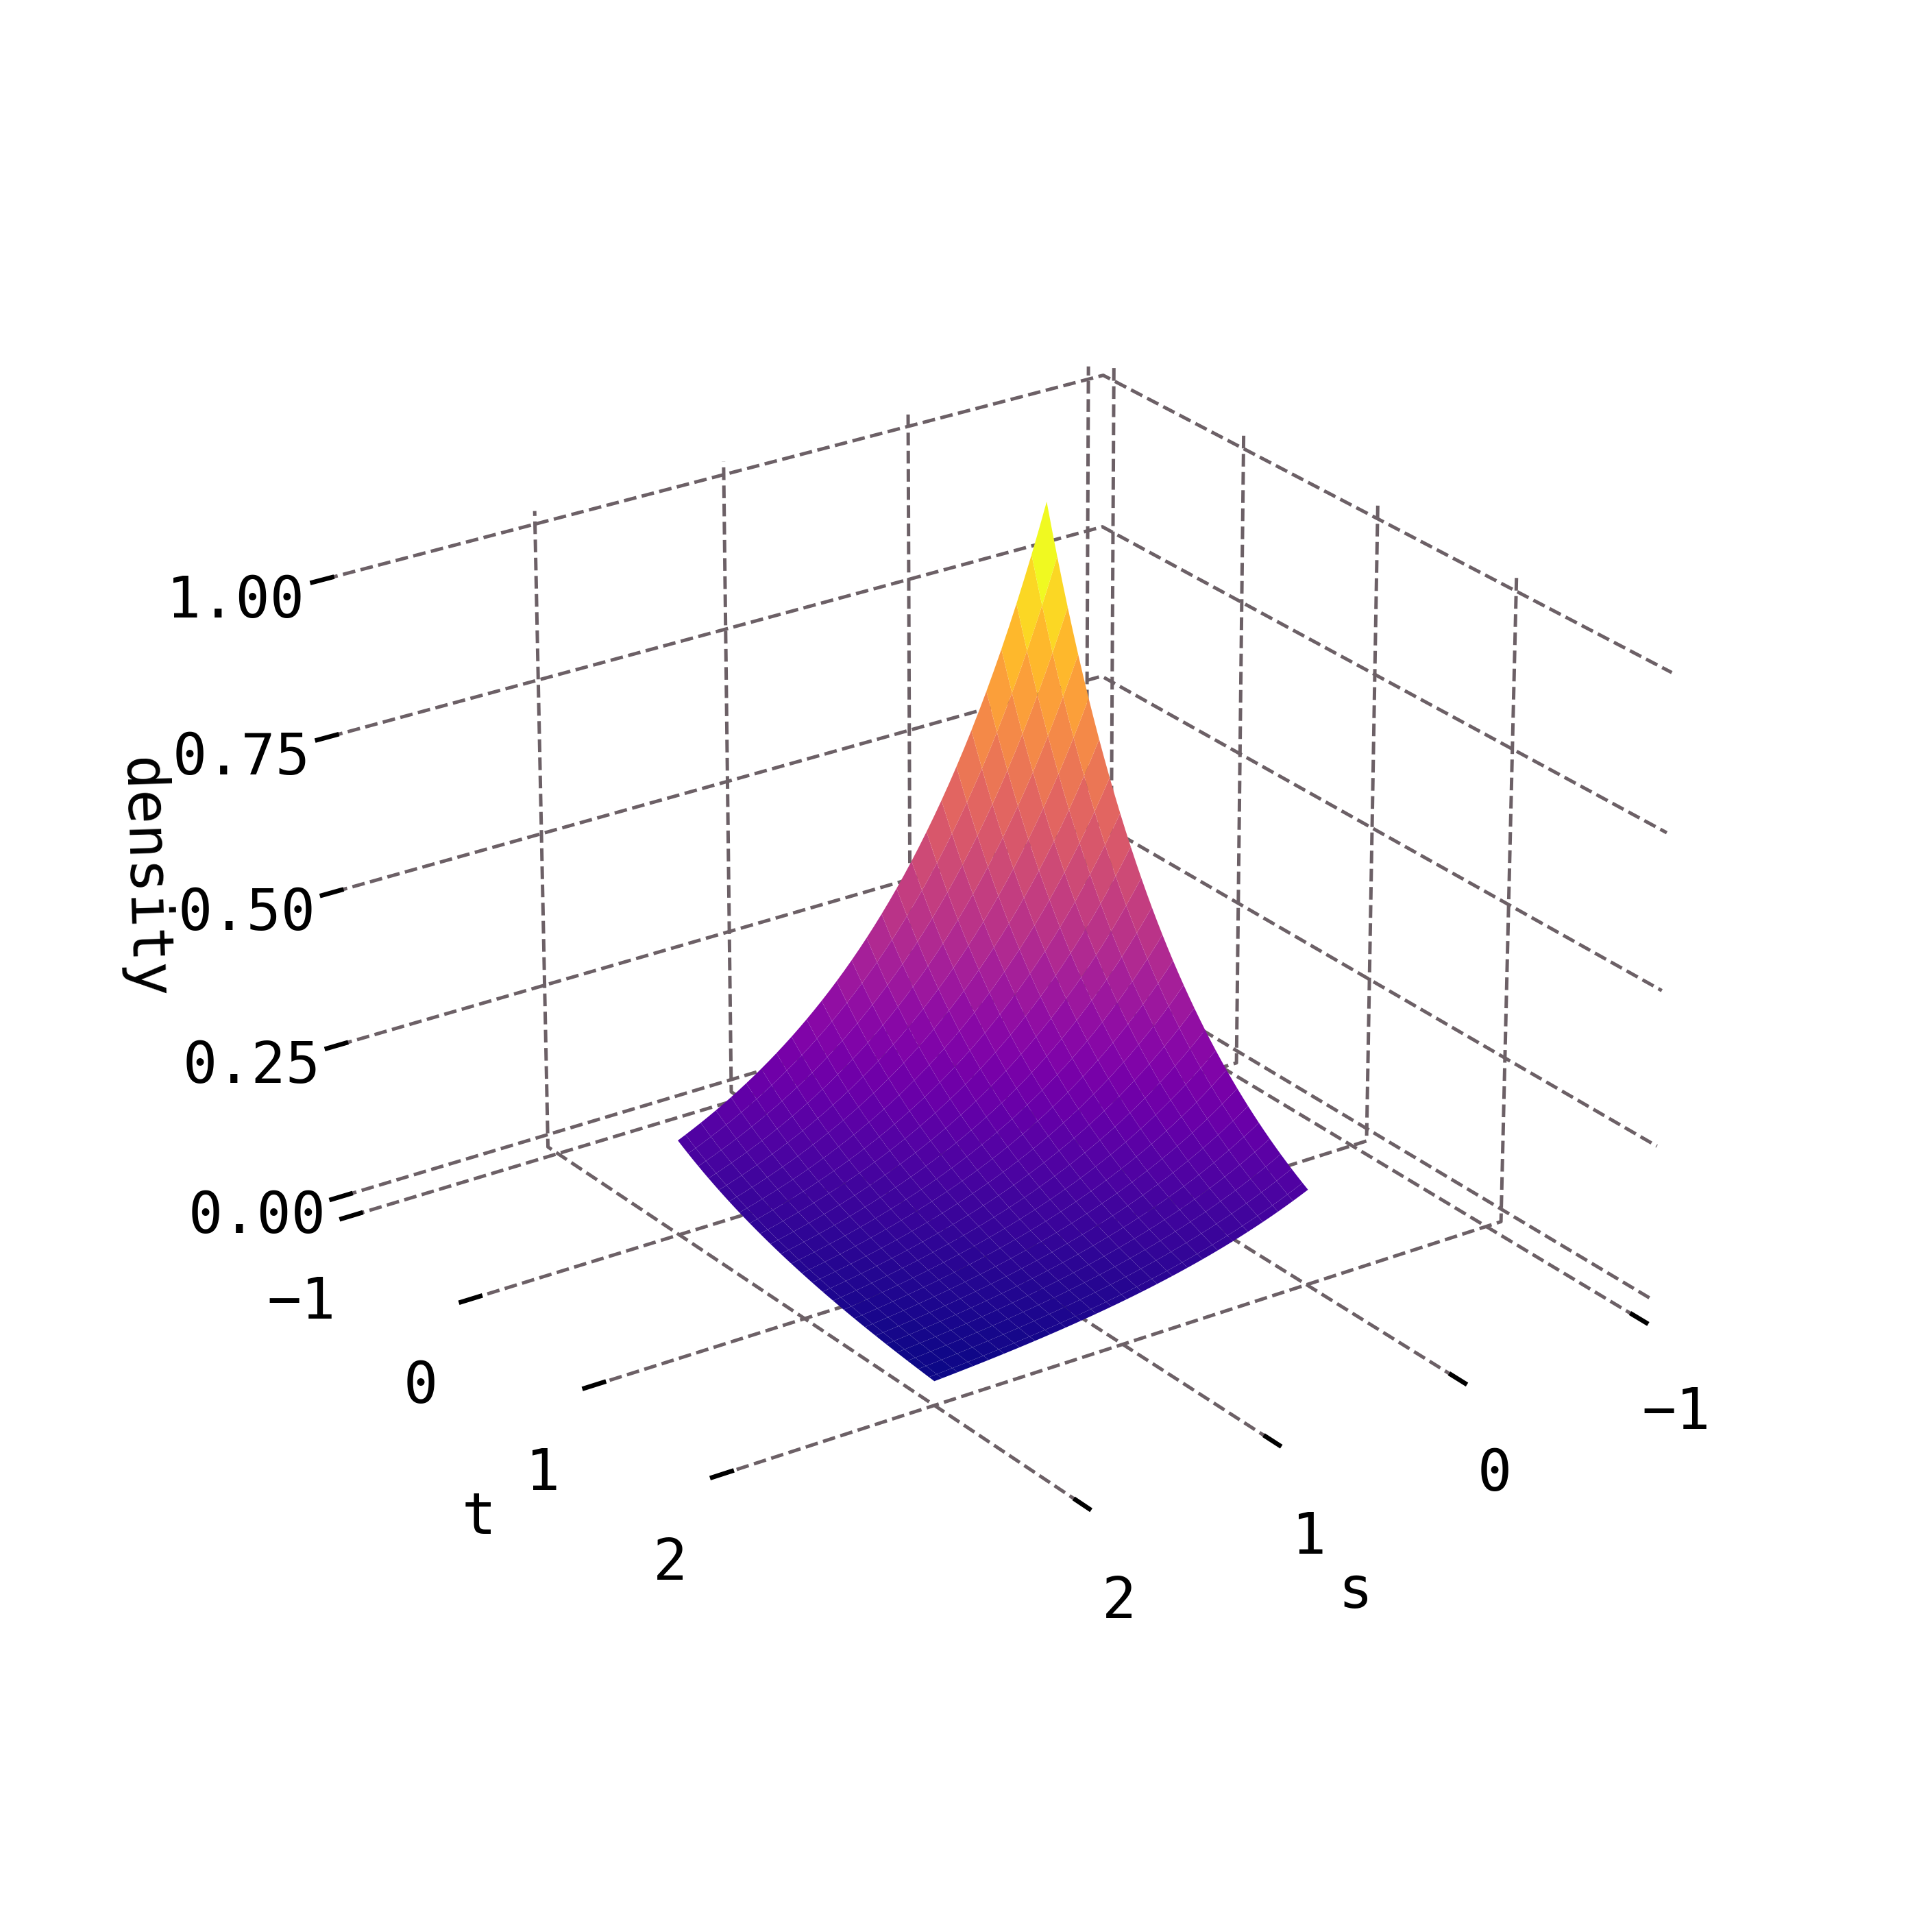

In [17]:
def f(s, t):
    return np.exp(- s - t)

x = np.linspace(0, 2)
y = np.linspace(0, 2)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap='plasma')

ax.set_facecolor('w')
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xticks(np.arange(-2, 3))
ax.set_yticks(np.arange(-2, 3))
ax.set_zticks(np.linspace(0, 2, 9))
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
ax.set_zlim(0, 1)
ax.set_xlabel('s')
ax.set_ylabel('t')
ax.set_zlabel('density')

ax.view_init(25, 55)
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.tight_layout()

As with _any_ continuous probability measure on $\mathbb{R}^2$, we showed that $P(\mathbb{R}^2)=1$. This means that the total volume underneath the graph of this surface is equal to $1$.